<a href="https://colab.research.google.com/github/R-Madhuram/Apple-Beats-by-DRE-LLM-ML_Consumer_Insights/blob/main/notebooks/GEMINIAI_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATA

# **OBJECTIVE:**
# **Create enhanced visualizations combining:**
  # 1. **Original sentiment data (df_clean)**
  # 2. **AI insights (ai_insights)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import re
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
# Load data
def load_data():
    """Load and prepare data for analysis"""
    # Load JSON analysis
    with open('/content/drive/MyDrive/EXTERN/DS_BeatsbyDrDre/Project_3/beats_pill_batch_comprehensive_analysis_FINAL.json', 'r') as f:
        ai_insights = json.load(f)

    # Load CSV data
    df = pd.read_csv('/content/drive/MyDrive/EXTERN/DS_BeatsbyDrDre/Project_3/bluetooth_speaker_competitive_analysis.csv')
    df_speakers = df[df['Device type'] == 'Portable Bluetooth Speaker'].copy()

    # Clean brand names
    brand_mapping = {
        'Bose Corporation': 'Bose', 'Bose Corp': 'Bose', 'Bose Inc': 'Bose',
        'Sony Corporation': 'Sony', 'Sony Corp': 'Sony', 'Sony Electronics': 'Sony',
        'Jbl': 'JBL', 'Jbl Audio': 'JBL',
        'Marshall Acton': 'Marshall', 'Marshall Audio': 'Marshall',
        'Beats Audio': 'Beats', 'Beats By Dre': 'Beats', 'Beats Electronics': 'Beats',
        'Ultimate Ears': 'UE', 'Ue': 'UE'
    }
    df_speakers['Brand_Clean'] = df_speakers['Brand'].str.strip().str.title().replace(brand_mapping)

    return df_speakers, ai_insights

# 1. Feature Improvement

In [ ]:
# Feature extraction functions
def extract_features_from_text(text):
    """Extract mentions of key product features from review text"""
    if pd.isna(text):
        return {}

    text = text.lower()
    features = {
        'sound_quality': len(re.findall(r'\b(sound|audio|bass|treble|clarity|crisp|clear|quality)\b', text)),
        'battery_life': len(re.findall(r'\b(battery|charge|charging|power|hours|lasted)\b', text)),
        'connectivity': len(re.findall(r'\b(bluetooth|connect|pairing|pair|wireless|connection)\b', text)),
        'durability': len(re.findall(r'\b(durable|sturdy|solid|build|quality|construction|robust)\b', text)),
        'portability': len(re.findall(r'\b(portable|size|compact|small|lightweight|travel)\b', text)),
        'design': len(re.findall(r'\b(design|look|appearance|aesthetic|style|beautiful|ugly)\b', text)),
        'price_value': len(re.findall(r'\b(price|cost|value|money|expensive|cheap|worth)\b', text)),
        'volume': len(re.findall(r'\b(volume|loud|quiet|soft|noise)\b', text)),
        'app_control': len(re.findall(r'\b(app|control|remote|smartphone|phone)\b', text)),
        'ecosystem': len(re.findall(r'\b(apple|iphone|siri|handoff|airplay|ecosystem)\b', text))
    }
    return features

In [ ]:
def create_feature_sentiment_matrix(df):
    """Create feature-sentiment analysis matrix"""
    # Extract features for each review
    feature_data = []

    for idx, row in df.iterrows():
        review_text = str(row.get('content', '')) + ' ' + str(row.get('title', ''))
        features = extract_features_from_text(review_text)

        for feature, count in features.items():
            if count > 0:  # Only include features that are mentioned
                feature_data.append({
                    'Brand': row['Brand_Clean'],
                    'Feature': feature,
                    'Sentiment_Score': row['vader_compound'],
                    'Rating': row['rating'],
                    'Mention_Count': count
                })

    return pd.DataFrame(feature_data)

In [ ]:
# Load data
df_speakers, ai_insights = load_data()

In [ ]:
# Create feature matrix
feature_df = create_feature_sentiment_matrix(df_speakers)


In [ ]:
print("📊 PILLAR 1: PRODUCT FEATURE IMPROVEMENT OPPORTUNITIES")
print("=" * 60)
print(f"Total Reviews Analyzed: {len(df_speakers):,}")
print(f"Feature Mentions Extracted: {len(feature_df):,}")
print(f"Brands Covered: {df_speakers['Brand_Clean'].nunique()}")

📊 PILLAR 1: PRODUCT FEATURE IMPROVEMENT OPPORTUNITIES
Total Reviews Analyzed: 1,739
Feature Mentions Extracted: 4,901
Brands Covered: 6


## VISUALIZATION SET A: TRADITIONAL SENTIMENT ANALYSIS (3 visualizations)


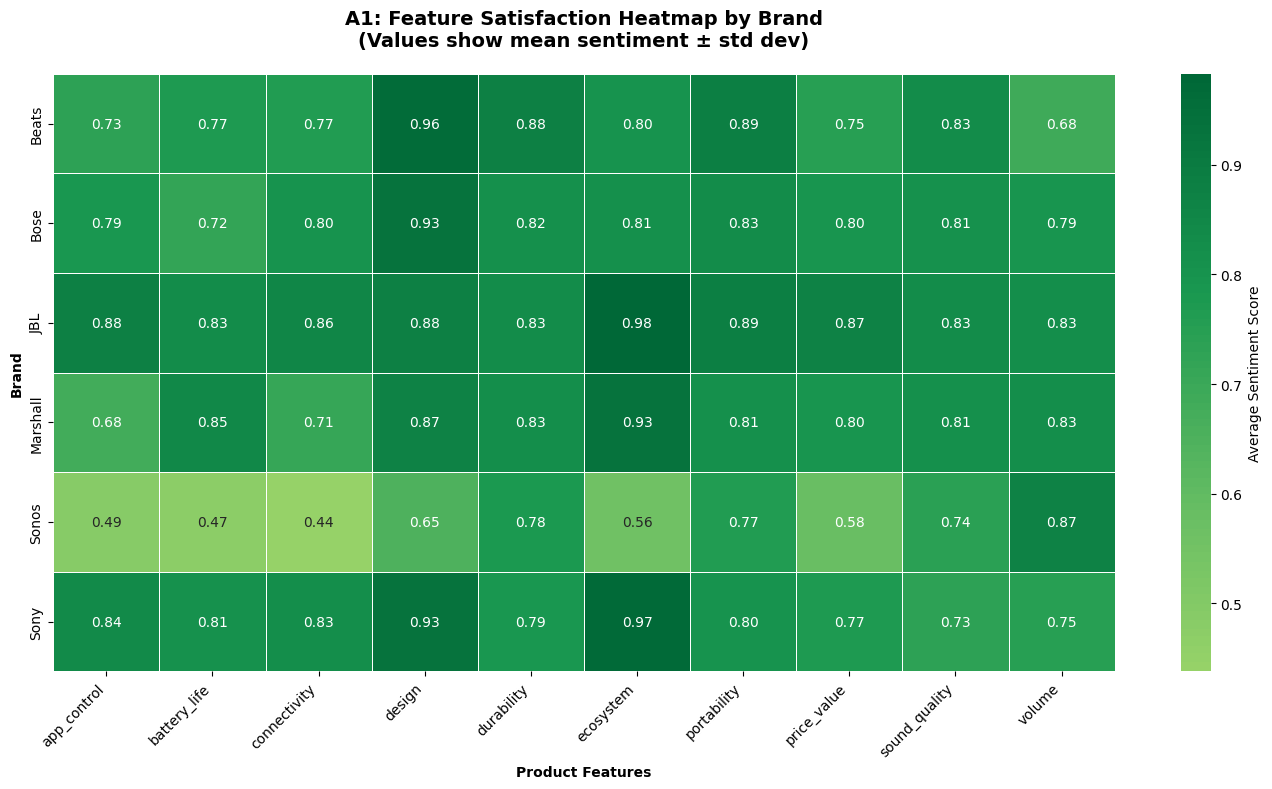

In [ ]:
# A1: Feature Satisfaction Heatmap with Standard Deviation
plt.figure(figsize=(14, 8))

# Calculate feature satisfaction by brand with std dev
feature_brand_stats = feature_df.groupby(['Brand', 'Feature']).agg({
    'Sentiment_Score': ['mean', 'std', 'count']
}).round(3)

feature_brand_stats.columns = ['Mean_Sentiment', 'Std_Sentiment', 'Count']
feature_brand_stats = feature_brand_stats.reset_index()

# Create pivot for heatmap
heatmap_data = feature_brand_stats.pivot(index='Brand', columns='Feature', values='Mean_Sentiment')
std_data = feature_brand_stats.pivot(index='Brand', columns='Feature', values='Std_Sentiment')

# Create heatmap
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=0,
            fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Average Sentiment Score'})

plt.title('A1: Feature Satisfaction Heatmap by Brand\n(Values show mean sentiment ± std dev)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Product Features', fontweight='bold')
plt.ylabel('Brand', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

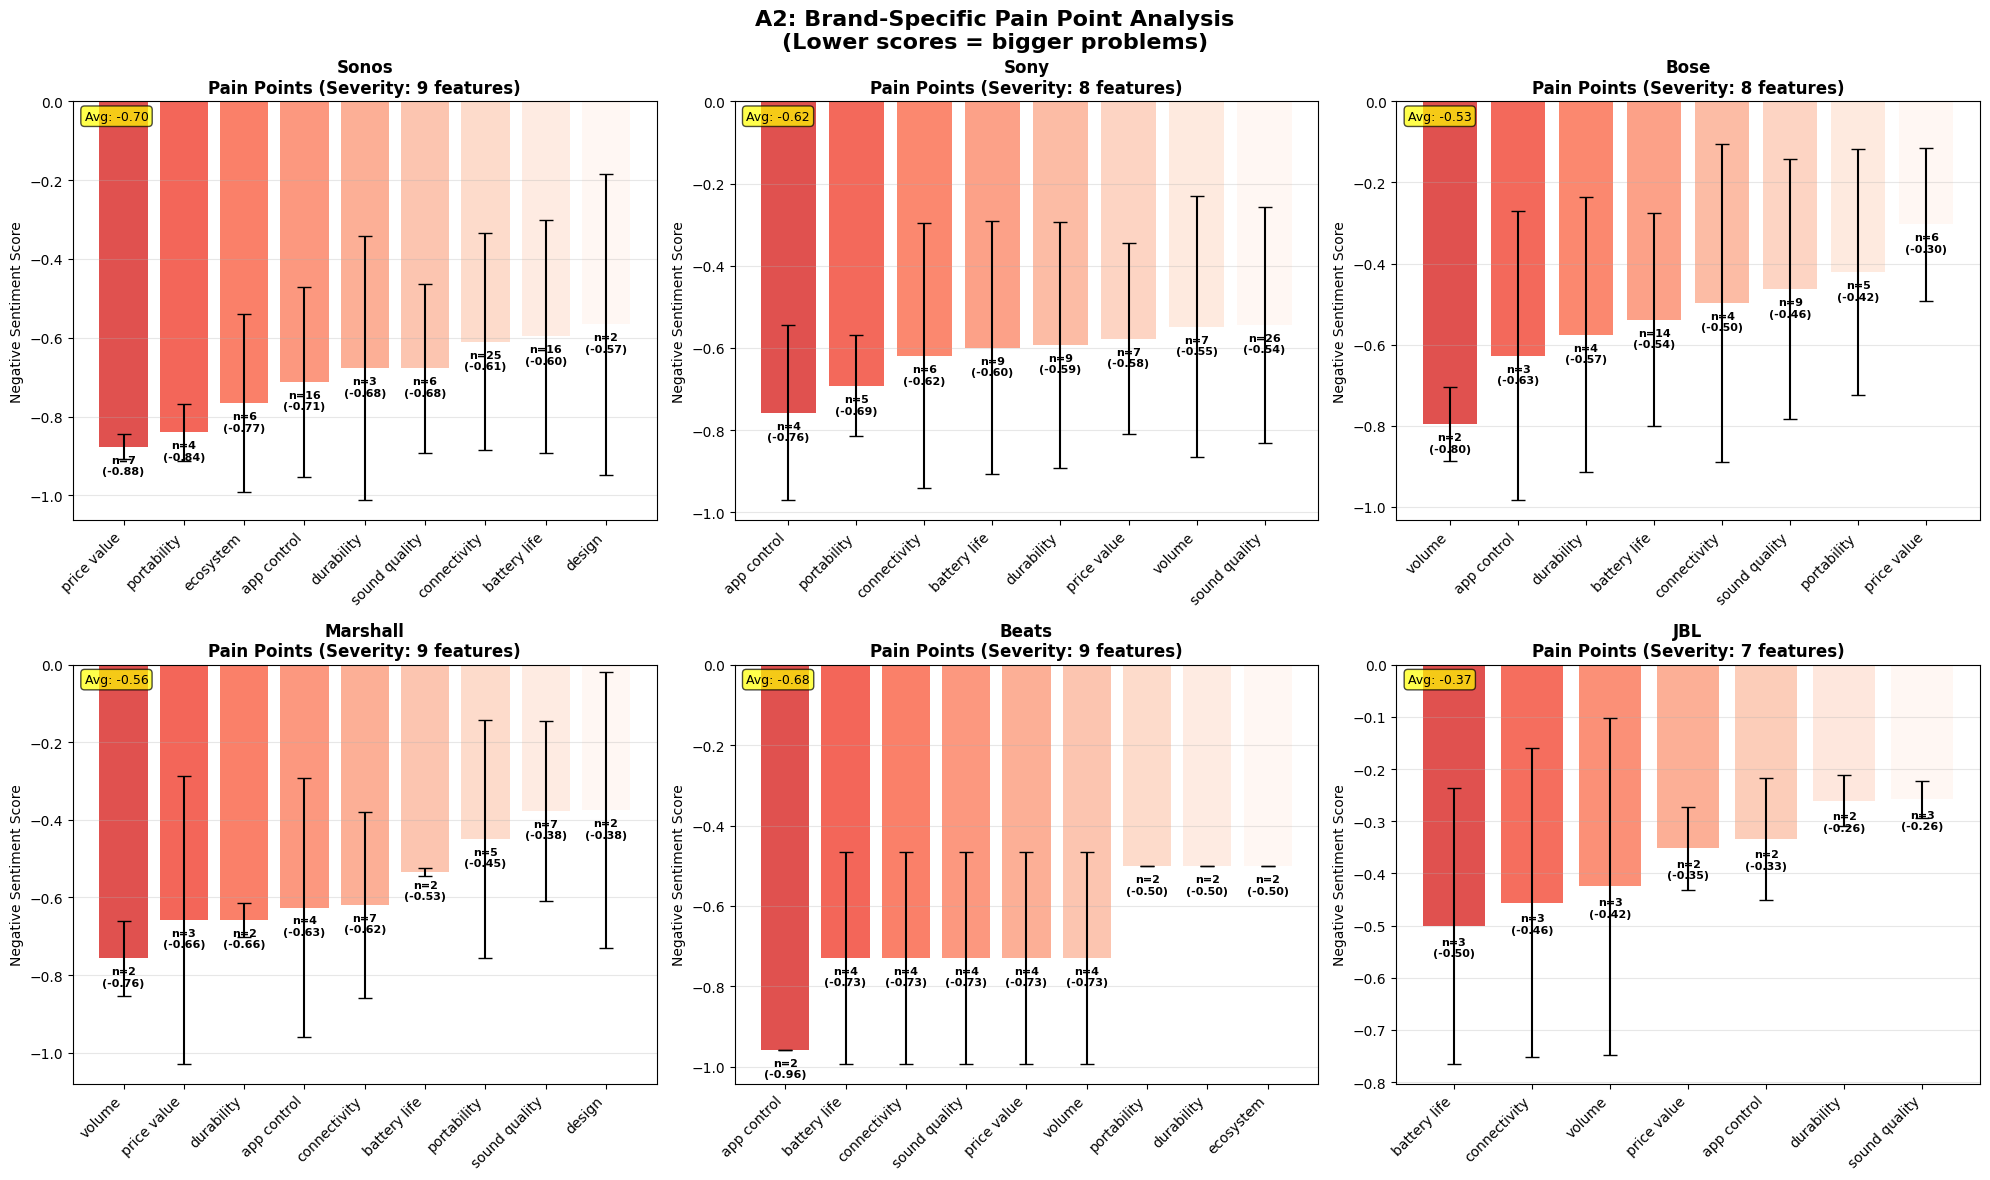


🔍 PAIN POINT SUMMARY BY BRAND:
          Avg_Pain_Score  Pain_Variability  Features_With_Issues  \
Brand                                                              
Sonos             -0.703             0.108                     9   
Beats             -0.678             0.152                     9   
Sony              -0.616             0.074                     8   
Marshall          -0.561             0.135                     9   
Bose              -0.527             0.147                     8   
JBL               -0.370             0.095                     7   

          Total_Complaints  
Brand                       
Sonos                   85  
Beats                   28  
Sony                    73  
Marshall                34  
Bose                    47  
JBL                     18  


In [ ]:
# A2: Pain Point Analysis - Improved Version
plt.figure(figsize=(16, 10))

# Analyze all negative sentiment (not just very negative)
negative_features = feature_df[feature_df['Sentiment_Score'] < 0].copy()

# Get all brands with sufficient data
brand_counts = negative_features['Brand'].value_counts()
brands_with_data = brand_counts[brand_counts >= 5].index.tolist()

# Calculate pain points with more flexible criteria
pain_analysis = []
for brand in brands_with_data:
    brand_negative = negative_features[negative_features['Brand'] == brand]
    brand_stats = brand_negative.groupby('Feature').agg({
        'Sentiment_Score': ['mean', 'std', 'count', 'min']
    }).round(3)
    brand_stats.columns = ['Mean_Negative', 'Std_Negative', 'Count_Negative', 'Min_Sentiment']
    brand_stats = brand_stats.reset_index()
    brand_stats['Brand'] = brand
    brand_stats = brand_stats[brand_stats['Count_Negative'] >= 2]  # Lower threshold
    pain_analysis.append(brand_stats)

if pain_analysis:
    all_pain_points = pd.concat(pain_analysis, ignore_index=True)

    # Create better visualization
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    for i, brand in enumerate(brands_with_data[:6]):
        brand_data = all_pain_points[all_pain_points['Brand'] == brand]

        if len(brand_data) > 0:
            # Sort by severity (most negative first)
            brand_data = brand_data.sort_values('Mean_Negative')

            # Create color gradient based on severity
            colors = plt.cm.Reds_r(np.linspace(0.3, 1, len(brand_data)))

            bars = axes[i].bar(range(len(brand_data)), brand_data['Mean_Negative'],
                              yerr=brand_data['Std_Negative'], capsize=5,
                              color=colors, alpha=0.8)

            axes[i].set_title(f'{brand}\nPain Points (Severity: {len(brand_data)} features)',
                             fontweight='bold', fontsize=12)
            axes[i].set_ylabel('Negative Sentiment Score')
            axes[i].set_xticks(range(len(brand_data)))
            axes[i].set_xticklabels(brand_data['Feature'].str.replace('_', ' '),
                                   rotation=45, ha='right')
            axes[i].grid(axis='y', alpha=0.3)

            # Add detailed labels
            for j, (bar, row) in enumerate(zip(bars, brand_data.itertuples())):
                axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.02,
                            f'n={row.Count_Negative}\n({row.Mean_Negative:.2f})',
                            ha='center', va='top', fontsize=8, fontweight='bold')

            # Add summary stats
            avg_negative = brand_data['Mean_Negative'].mean()
            axes[i].text(0.02, 0.98, f'Avg: {avg_negative:.2f}',
                        transform=axes[i].transAxes, fontsize=9,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                        verticalalignment='top')
        else:
            axes[i].text(0.5, 0.5, f'{brand}\n✅ Minimal Pain Points\n(Very few negative reviews)',
                        ha='center', va='center', transform=axes[i].transAxes,
                        fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
            axes[i].set_title(brand, fontweight='bold')

    # Hide unused subplots
    for j in range(len(brands_with_data), 6):
        axes[j].set_visible(False)

    plt.suptitle('A2: Brand-Specific Pain Point Analysis\n(Lower scores = bigger problems)',
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Additional summary table
    print("\n🔍 PAIN POINT SUMMARY BY BRAND:")
    print("=" * 50)
    summary_stats = all_pain_points.groupby('Brand').agg({
        'Mean_Negative': ['mean', 'std', 'count'],
        'Count_Negative': 'sum'
    }).round(3)
    summary_stats.columns = ['Avg_Pain_Score', 'Pain_Variability', 'Features_With_Issues', 'Total_Complaints']
    print(summary_stats.sort_values('Avg_Pain_Score'))

else:
    print("⚠️ Insufficient negative review data for detailed pain point analysis")
    # Show basic negative sentiment by brand
    basic_negative = feature_df[feature_df['Sentiment_Score'] < 0].groupby('Brand').agg({
        'Sentiment_Score': ['mean', 'count']
    }).round(3)
    basic_negative.columns = ['Avg_Negative_Sentiment', 'Negative_Review_Count']
    print(basic_negative)

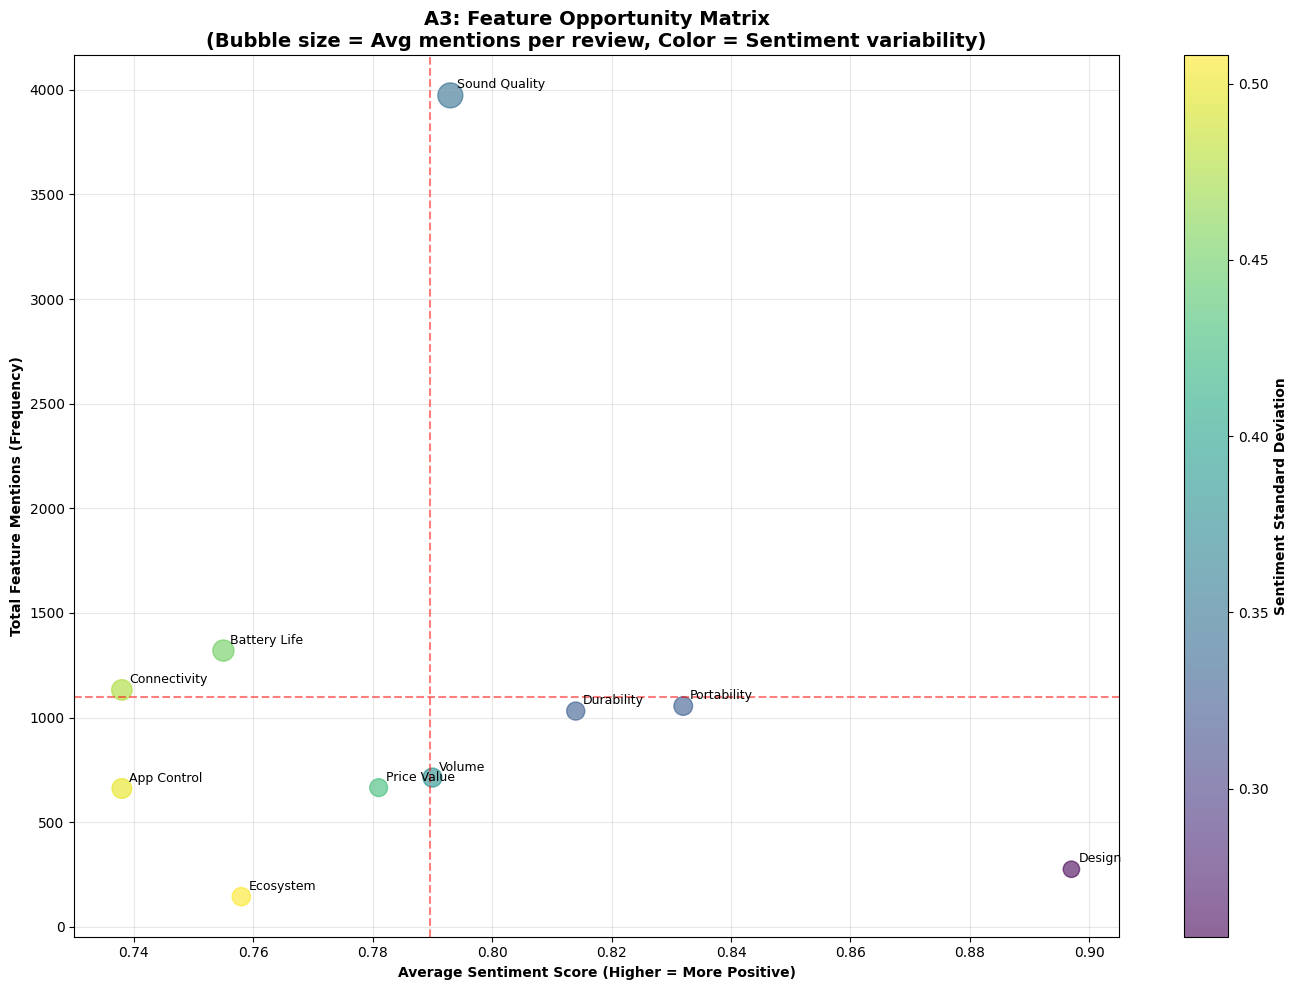

In [ ]:
# A3: Feature Opportunity Matrix (Satisfaction vs Mention Frequency)
plt.figure(figsize=(14, 10))

# Calculate feature metrics across all brands
feature_metrics = feature_df.groupby('Feature').agg({
    'Sentiment_Score': ['mean', 'std'],
    'Mention_Count': ['sum', 'mean']
}).round(3)

feature_metrics.columns = ['Avg_Sentiment', 'Sentiment_Std', 'Total_Mentions', 'Avg_Mentions']
feature_metrics = feature_metrics.reset_index()

# Create bubble chart
scatter = plt.scatter(feature_metrics['Avg_Sentiment'],
                     feature_metrics['Total_Mentions'],
                     s=feature_metrics['Avg_Mentions']*100,  # Bubble size
                     alpha=0.6,
                     c=feature_metrics['Sentiment_Std'],  # Color by std dev
                     cmap='viridis')

# Add feature labels
for idx, row in feature_metrics.iterrows():
    plt.annotate(row['Feature'].replace('_', ' ').title(),
                (row['Avg_Sentiment'], row['Total_Mentions']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Average Sentiment Score (Higher = More Positive)', fontweight='bold')
plt.ylabel('Total Feature Mentions (Frequency)', fontweight='bold')
plt.title('A3: Feature Opportunity Matrix\n(Bubble size = Avg mentions per review, Color = Sentiment variability)',
          fontsize=14, fontweight='bold')

# Add quadrant lines
plt.axvline(x=feature_metrics['Avg_Sentiment'].mean(), color='red', linestyle='--', alpha=0.5)
plt.axhline(y=feature_metrics['Total_Mentions'].mean(), color='red', linestyle='--', alpha=0.5)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Sentiment Standard Deviation', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


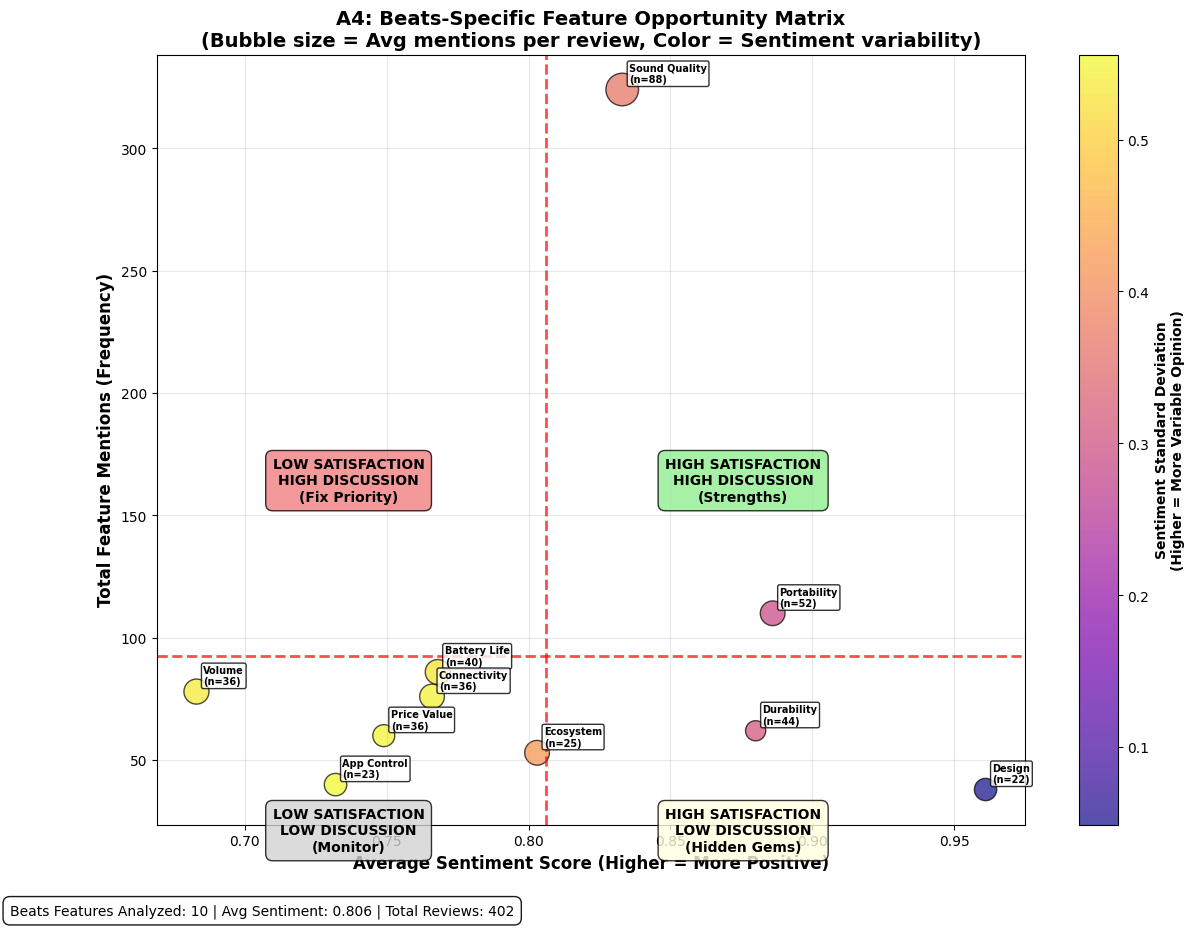

In [ ]:
# A4: Beats-Specific Feature Opportunity Matrix
plt.figure(figsize=(14, 10))

# Calculate Beats-specific feature metrics
beats_features = feature_df[feature_df['Brand'] == 'Beats']

if len(beats_features) > 0:
    beats_feature_metrics = beats_features.groupby('Feature').agg({
        'Sentiment_Score': ['mean', 'std', 'count'],
        'Mention_Count': ['sum', 'mean']
    }).round(3)

    beats_feature_metrics.columns = ['Avg_Sentiment', 'Sentiment_Std', 'Review_Count', 'Total_Mentions', 'Avg_Mentions']
    beats_feature_metrics = beats_feature_metrics.reset_index()

    # Filter for features with sufficient data (≥2 reviews)
    beats_feature_metrics = beats_feature_metrics[beats_feature_metrics['Review_Count'] >= 2]

    if len(beats_feature_metrics) > 0:
        # Create bubble chart for Beats
        scatter = plt.scatter(beats_feature_metrics['Avg_Sentiment'],
                             beats_feature_metrics['Total_Mentions'],
                             s=beats_feature_metrics['Avg_Mentions']*150,  # Larger bubbles for visibility
                             alpha=0.7,
                             c=beats_feature_metrics['Sentiment_Std'],  # Color by std dev
                             cmap='plasma',
                             edgecolors='black',
                             linewidth=1)

        # Add feature labels
        for idx, row in beats_feature_metrics.iterrows():
            plt.annotate(f"{row['Feature'].replace('_', ' ').title()}\n(n={int(row['Review_Count'])})",
                        (row['Avg_Sentiment'], row['Total_Mentions']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=7, fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

        plt.xlabel('Average Sentiment Score (Higher = More Positive)', fontweight='bold', fontsize=12)
        plt.ylabel('Total Feature Mentions (Frequency)', fontweight='bold', fontsize=12)
        plt.title('A4: Beats-Specific Feature Opportunity Matrix\n(Bubble size = Avg mentions per review, Color = Sentiment variability)',
                  fontsize=14, fontweight='bold')

        # Add quadrant lines
        plt.axvline(x=beats_feature_metrics['Avg_Sentiment'].mean(), color='red', linestyle='--', alpha=0.7, linewidth=2)
        plt.axhline(y=beats_feature_metrics['Total_Mentions'].mean(), color='red', linestyle='--', alpha=0.7, linewidth=2)

        # Add quadrant labels
        x_mean = beats_feature_metrics['Avg_Sentiment'].mean()
        y_mean = beats_feature_metrics['Total_Mentions'].mean()
        x_range = beats_feature_metrics['Avg_Sentiment'].max() - beats_feature_metrics['Avg_Sentiment'].min()
        y_range = beats_feature_metrics['Total_Mentions'].max() - beats_feature_metrics['Total_Mentions'].min()

        plt.text(x_mean + x_range*0.25, y_mean + y_range*0.25, 'HIGH SATISFACTION\nHIGH DISCUSSION\n(Strengths)',
                ha='center', va='center', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))

        plt.text(x_mean - x_range*0.25, y_mean + y_range*0.25, 'LOW SATISFACTION\nHIGH DISCUSSION\n(Fix Priority)',
                ha='center', va='center', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.8))

        plt.text(x_mean + x_range*0.25, y_mean - y_range*0.25, 'HIGH SATISFACTION\nLOW DISCUSSION\n(Hidden Gems)',
                ha='center', va='center', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

        plt.text(x_mean - x_range*0.25, y_mean - y_range*0.25, 'LOW SATISFACTION\nLOW DISCUSSION\n(Monitor)',
                ha='center', va='center', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

        # Add colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Sentiment Standard Deviation\n(Higher = More Variable Opinion)', fontweight='bold')

        plt.grid(True, alpha=0.3)

        # Add summary statistics
        plt.figtext(0.02, 0.02, f"Beats Features Analyzed: {len(beats_feature_metrics)} | "
                                f"Avg Sentiment: {beats_feature_metrics['Avg_Sentiment'].mean():.3f} | "
                                f"Total Reviews: {beats_feature_metrics['Review_Count'].sum()}",
                   fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9))

    else:
        plt.text(0.5, 0.5, 'Insufficient Beats feature data\nfor opportunity matrix\n(Need ≥2 reviews per feature)',
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=14,
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
        plt.title('A4: Beats-Specific Feature Opportunity Matrix', fontsize=14, fontweight='bold')

else:
    plt.text(0.5, 0.5, 'No Beats feature data available\nfor analysis',
            ha='center', va='center', transform=plt.gca().transAxes, fontsize=14,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.8))
    plt.title('A4: Beats-Specific Feature Opportunity Matrix', fontsize=14, fontweight='bold')


 **Strategic Quadrants for Beats:**

- 🟢 Strengths: High satisfaction + High discussion (promote these!)
- 🔴 Fix Priority: Low satisfaction + High discussion (immediate attention needed)
- 🟡 Hidden Gems: High satisfaction + Low discussion (undervalued features)
- ⚪ Monitor: Low satisfaction + Low discussion (watch for trends)

**Key Benefits:**

- Pure Beats insights vs. market-wide patterns
- Quadrant labels for easy strategic interpretation
- Sample size indicators (n=X) for each feature
- Summary statistics showing total Beats data analyzed

## VISUALIZATION SET B: AI INSIGHTS ANALYSIS (3 visualizations)

In [ ]:
# Extract AI insights data
beats_insights = ai_insights['gemini_batch_analysis']['strategic_depth']['aggregated_insights']
competitor_data = ai_insights['gemini_batch_analysis']['competitive_intelligence']['competitor_analysis']
ecosystem_data = ai_insights['gemini_batch_analysis']['apple_ecosystem']

<Figure size 1400x800 with 0 Axes>

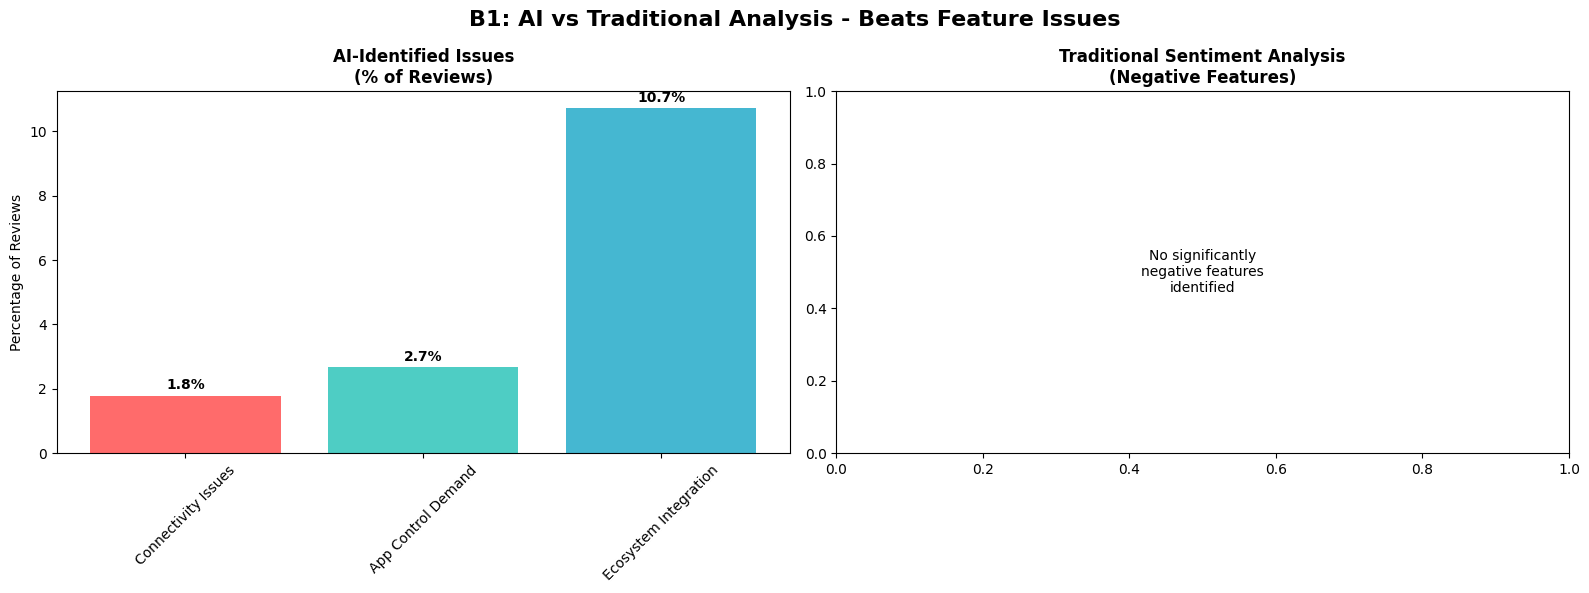

In [ ]:
# B1: AI-Identified Feature Gaps vs Traditional Analysis
plt.figure(figsize=(14, 8))

# Beats specific metrics from AI
beats_metrics = {
    'Connectivity Issues': beats_insights['connectivity_complaints']['percentage_of_total'],
    'App Control Demand': beats_insights['app_control_demand']['percentage_of_total'],
    'Ecosystem Integration': beats_insights['ecosystem_integration']['percentage_of_total']
}

# Traditional sentiment analysis for Beats
beats_traditional = feature_df[feature_df['Brand'] == 'Beats'].groupby('Feature').agg({
    'Sentiment_Score': ['mean', 'std', 'count']
}).round(3)

beats_traditional.columns = ['Mean_Sentiment', 'Sentiment_Std', 'Count']
beats_traditional = beats_traditional.reset_index()

# Create comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# AI Insights
ai_features = list(beats_metrics.keys())
ai_values = list(beats_metrics.values())
bars1 = ax1.bar(ai_features, ai_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_title('AI-Identified Issues\n(% of Reviews)', fontweight='bold')
ax1.set_ylabel('Percentage of Reviews')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for bar, value in zip(bars1, ai_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Traditional Analysis (negative sentiment features)
neg_sentiment = beats_traditional[beats_traditional['Mean_Sentiment'] < 0]
if len(neg_sentiment) > 0:
    bars2 = ax2.bar(neg_sentiment['Feature'], abs(neg_sentiment['Mean_Sentiment']),
                   yerr=neg_sentiment['Sentiment_Std'], capsize=5,
                   color=['#FF9999', '#99DDFF', '#99FF99'])
    ax2.set_title('Traditional Sentiment Analysis\n(Negative Features)', fontweight='bold')
    ax2.set_ylabel('Absolute Negative Sentiment')
    ax2.tick_params(axis='x', rotation=45)
else:
    ax2.text(0.5, 0.5, 'No significantly\nnegative features\nidentified',
            ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Traditional Sentiment Analysis\n(Negative Features)', fontweight='bold')

plt.suptitle('B1: AI vs Traditional Analysis - Beats Feature Issues', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

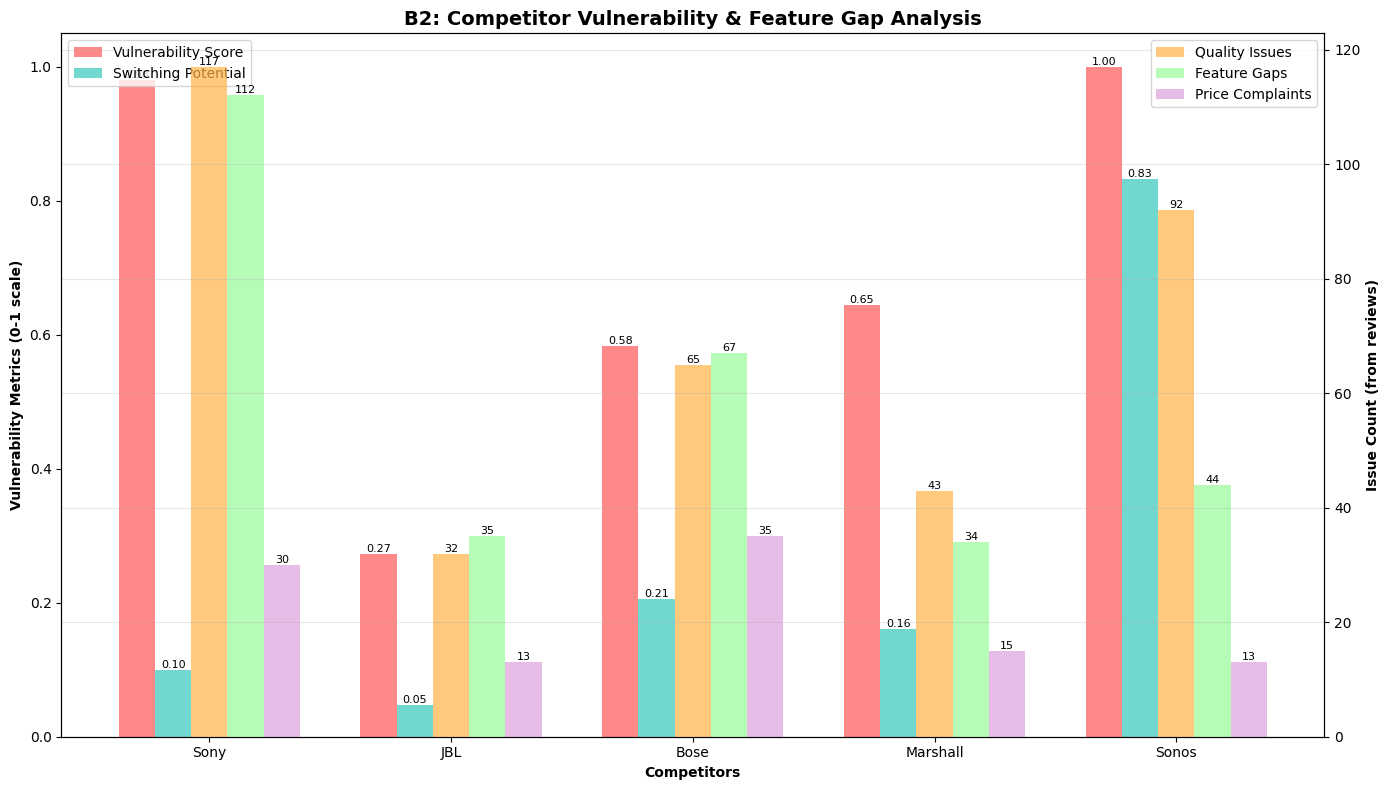

In [ ]:
# B2: Competitor Vulnerability Analysis
plt.figure(figsize=(14, 8))

# Extract competitor vulnerability data
competitors = []
vulnerability_scores = []
switching_potential = []
quality_issues = []
feature_gaps = []
price_complaints = []

for brand, data in competitor_data.items():
    competitors.append(brand)
    vulnerability_scores.append(data['vulnerability_score'])
    switching_potential.append(data['switching_potential'])
    quality_issues.append(data['detailed_metrics']['vulnerability_factors']['quality_issues'])
    feature_gaps.append(data['detailed_metrics']['vulnerability_factors']['feature_gaps'])
    price_complaints.append(data['detailed_metrics']['vulnerability_factors']['price_complaints'])

# Create multi-metric visualization
x = np.arange(len(competitors))
width = 0.15

fig, ax1 = plt.subplots(figsize=(14, 8))

# Primary bars - vulnerability scores
bars1 = ax1.bar(x - 2*width, vulnerability_scores, width, label='Vulnerability Score',
               color='#FF6B6B', alpha=0.8)
bars2 = ax1.bar(x - width, switching_potential, width, label='Switching Potential',
               color='#4ECDC4', alpha=0.8)

ax1.set_xlabel('Competitors', fontweight='bold')
ax1.set_ylabel('Vulnerability Metrics (0-1 scale)', fontweight='bold')
ax1.set_title('B2: Competitor Vulnerability & Feature Gap Analysis', fontweight='bold', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(competitors)
ax1.legend(loc='upper left')

# Secondary axis for issue counts
ax2 = ax1.twinx()
bars3 = ax2.bar(x, quality_issues, width, label='Quality Issues', color='#FFB347', alpha=0.7)
bars4 = ax2.bar(x + width, feature_gaps, width, label='Feature Gaps', color='#98FB98', alpha=0.7)
bars5 = ax2.bar(x + 2*width, price_complaints, width, label='Price Complaints', color='#DDA0DD', alpha=0.7)

ax2.set_ylabel('Issue Count (from reviews)', fontweight='bold')
ax2.legend(loc='upper right')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=8)

for bars in [bars3, bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

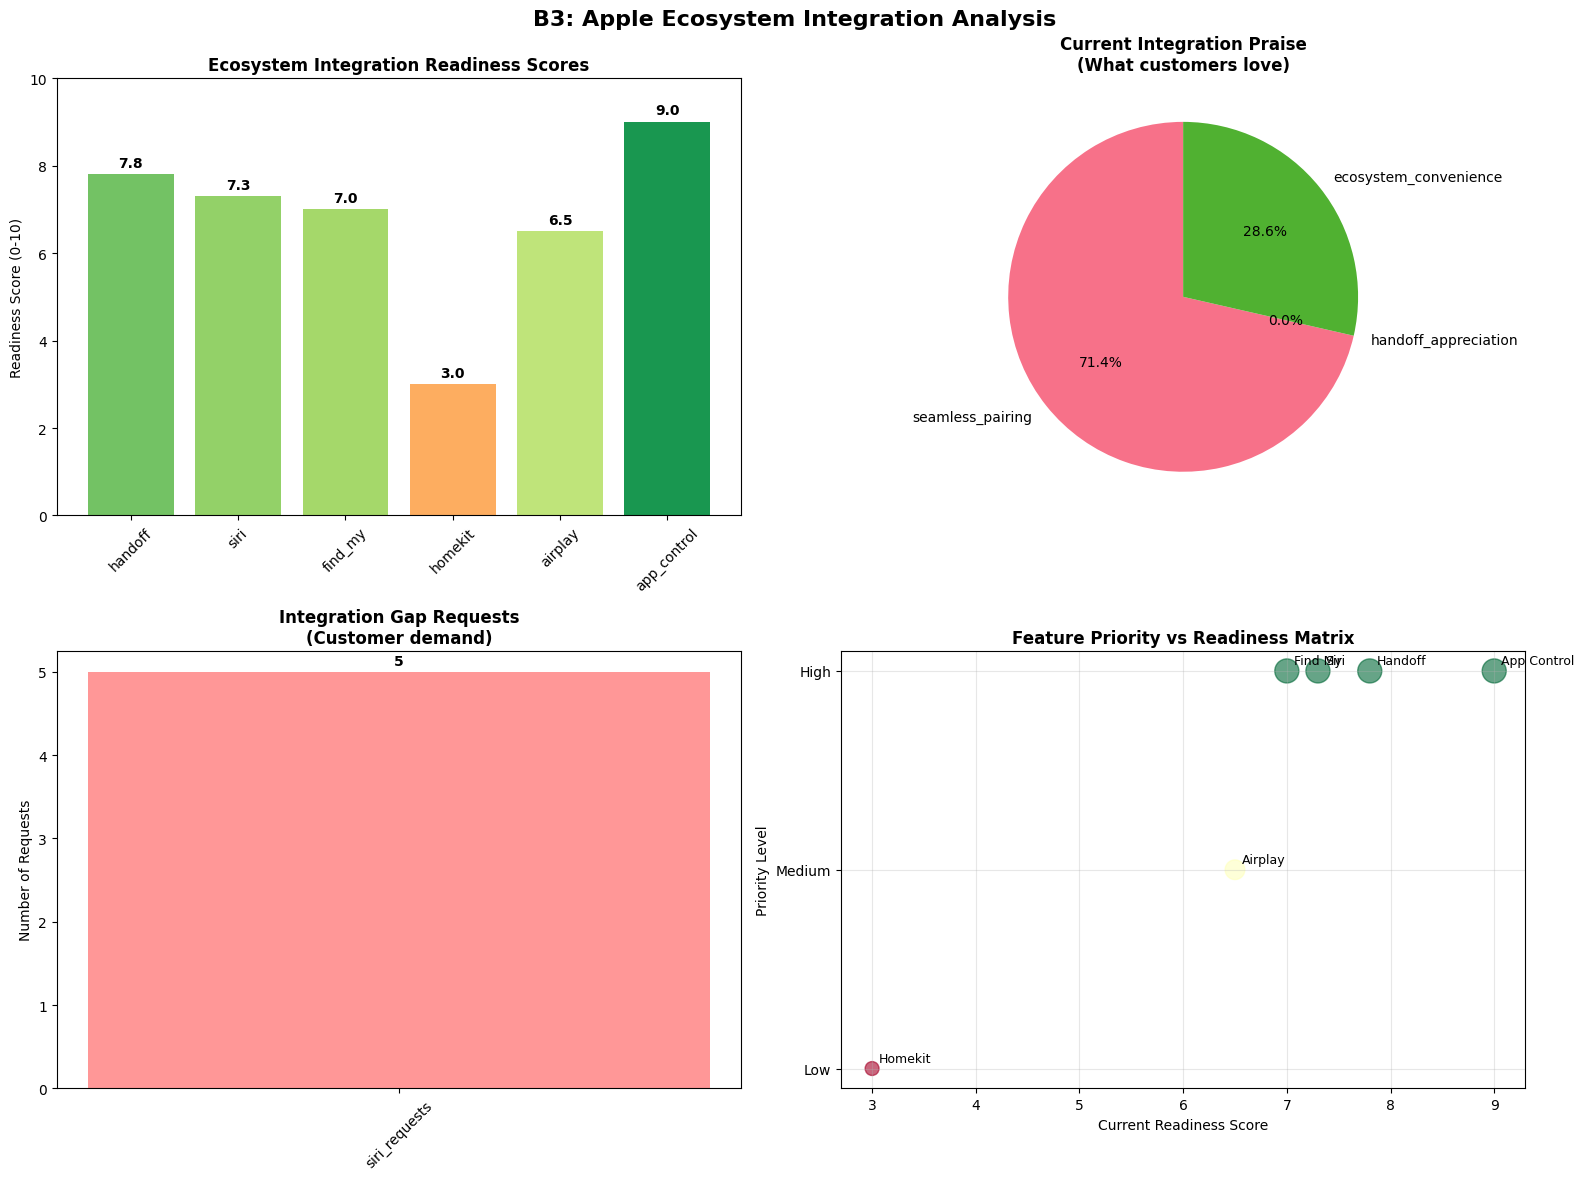

In [ ]:
# B3: Apple Ecosystem Integration Readiness
plt.figure(figsize=(14, 8))

# Extract ecosystem readiness scores
ecosystem_features = list(ecosystem_data['ecosystem_readiness_scores'].keys())
readiness_scores = list(ecosystem_data['ecosystem_readiness_scores'].values())

# Calculate variability metrics (simulated based on available data)
integration_praise = ecosystem_data['detailed_metrics']['integration_praise']
integration_gaps = ecosystem_data['detailed_metrics']['integration_gaps']

# Create comprehensive ecosystem analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Readiness scores
bars = ax1.bar(ecosystem_features, readiness_scores,
              color=plt.cm.RdYlGn(np.array(readiness_scores)/10))
ax1.set_title('Ecosystem Integration Readiness Scores', fontweight='bold')
ax1.set_ylabel('Readiness Score (0-10)')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 10)

# Add score labels
for bar, score in zip(bars, readiness_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{score}', ha='center', va='bottom', fontweight='bold')

# Integration praise breakdown
praise_features = list(integration_praise.keys())
praise_values = list(integration_praise.values())
ax2.pie(praise_values, labels=praise_features, autopct='%1.1f%%', startangle=90)
ax2.set_title('Current Integration Praise\n(What customers love)', fontweight='bold')

# Integration gaps
gaps_features = list(integration_gaps.keys())
gaps_values = list(integration_gaps.values())
non_zero_gaps = [(f, v) for f, v in zip(gaps_features, gaps_values) if v > 0]

if non_zero_gaps:
    gaps_f, gaps_v = zip(*non_zero_gaps)
    bars3 = ax3.bar(gaps_f, gaps_v, color='#FF6B6B', alpha=0.7)
    ax3.set_title('Integration Gap Requests\n(Customer demand)', fontweight='bold')
    ax3.set_ylabel('Number of Requests')
    ax3.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars3, gaps_v):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                f'{value}', ha='center', va='bottom', fontweight='bold')
else:
    ax3.text(0.5, 0.5, 'No significant\nintegration gaps\nidentified',
            ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Integration Gap Requests', fontweight='bold')

# Priority matrix - Safe version with error handling
try:
    # Try to get priorities from the executive recommendations section instead
    exec_data = ai_insights['gemini_batch_analysis']['executive_recommendations']
    if 'ecosystem_priorities' in exec_data:
        priority_high = exec_data['ecosystem_priorities']['high_priority']
        priority_med = exec_data['ecosystem_priorities']['medium_priority']
        priority_low = exec_data['ecosystem_priorities']['low_priority']
    else:
        # Fallback: create priorities based on readiness scores
        readiness_scores = ecosystem_data['ecosystem_readiness_scores']
        sorted_features = sorted(readiness_scores.items(), key=lambda x: x[1], reverse=True)

        priority_high = [f for f, score in sorted_features if score >= 7.5]
        priority_med = [f for f, score in sorted_features if 5.0 <= score < 7.5]
        priority_low = [f for f, score in sorted_features if score < 5.0]

    all_priorities = []
    all_priorities.extend([(p, 'High', 3) for p in priority_high])
    all_priorities.extend([(p, 'Medium', 2) for p in priority_med])
    all_priorities.extend([(p, 'Low', 1) for p in priority_low])

    if all_priorities:
        features_p, priorities, values = zip(*all_priorities)
        scatter = ax4.scatter([ecosystem_data['ecosystem_readiness_scores'].get(f, 5) for f in features_p],
                             values,
                             s=[v*100 for v in values],
                             alpha=0.6,
                             c=values, cmap='RdYlGn')

        for f, score, val in zip(features_p, [ecosystem_data['ecosystem_readiness_scores'].get(f, 5) for f in features_p], values):
            ax4.annotate(f.replace('_', ' ').title(), (score, val),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)

        ax4.set_xlabel('Current Readiness Score')
        ax4.set_ylabel('Priority Level')
        ax4.set_title('Feature Priority vs Readiness Matrix', fontweight='bold')
        ax4.set_yticks([1, 2, 3])
        ax4.set_yticklabels(['Low', 'Medium', 'High'])
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Priority data\nnot available',
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Feature Priority Matrix', fontweight='bold')

except KeyError as e:
    # Simple readiness score visualization if priorities not available
    features = list(ecosystem_data['ecosystem_readiness_scores'].keys())
    scores = list(ecosystem_data['ecosystem_readiness_scores'].values())

    bars = ax4.bar(range(len(features)), scores,
                   color=plt.cm.RdYlGn(np.array(scores)/10))
    ax4.set_xlabel('Ecosystem Features')
    ax4.set_ylabel('Readiness Score')
    ax4.set_title('Ecosystem Readiness Scores\n(Fallback View)', fontweight='bold')
    ax4.set_xticks(range(len(features)))
    ax4.set_xticklabels([f.replace('_', ' ').title() for f in features], rotation=45)

    for bar, score in zip(bars, scores):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{score}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('B3: Apple Ecosystem Integration Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**This 4-panel chart analyzes Beats' readiness for deeper Apple ecosystem integration:**

**📊 Panel Breakdown:**
- 🟢 Top Left - Readiness Scores (0-10 scale):

  - App Control (9.0) = Highest priority, customers want this most
  - Handoff (7.8) & Siri (7.3) = Strong readiness for implementation
  - HomeKit (3.0) = Lowest priority, not ready yet

- 🔴 Top Right - Current Praise:

  - 71.4% Seamless Pairing = Customers love how easily Beats connects to iPhones
  - 28.6% Ecosystem Convenience = Some appreciate current integration

- 🔴 Bottom Left - Gap Requests:

  - 5 customer requests for Siri integration = Clear demand signal

- 🟢 Bottom Right - Priority Matrix:

  - High Priority + High Readiness = Find My, Handoff, App Control (implement first!)
  - Medium Priority = AirPlay (secondary focus)

**💡 Key Insight:**

1. Beats has strong foundation (seamless pairing works great) but customers want deeper integration - especially Siri control and app features.

2. The data shows clear implementation priorities based on both customer demand and technical readiness.

3. Bottom Line: Focus on App Control and Siri integration first - highest customer demand + highest readiness scores! 🎯

## SUMMARY STATISTICS


In [ ]:
print("\n📈 PILLAR 1 SUMMARY STATISTICS")
print("=" * 50)
print(f"Traditional Analysis:")
print(f"  • Features analyzed: {feature_metrics['Feature'].nunique()}")
print(f"  • Total feature mentions: {feature_metrics['Total_Mentions'].sum():,}")
print(f"  • Average sentiment: {feature_metrics['Avg_Sentiment'].mean():.3f} ± {feature_metrics['Avg_Sentiment'].std():.3f}")

print(f"\nAI Analysis:")
print(f"  • Beats reviews processed: {ai_insights['dataset_size']['beats_reviews']}")
print(f"  • Competitor reviews: {ai_insights['dataset_size']['competitor_reviews']}")
print(f"  • Top vulnerability target: {ai_insights['gemini_batch_analysis']['competitive_intelligence']['cross_brand_insights']['analysis_summary']['top_vulnerability_target']}")

print(f"\nKey Opportunities Identified:")
print(f"  • Connectivity issues: {beats_insights['connectivity_complaints']['percentage_of_total']:.1f}% of reviews")
print(f"  • App control demand: {beats_insights['app_control_demand']['percentage_of_total']:.1f}% of reviews")
print(f"  • Ecosystem integration mentions: {beats_insights['ecosystem_integration']['percentage_of_total']:.1f}% of reviews")


📈 PILLAR 1 SUMMARY STATISTICS
Traditional Analysis:
  • Features analyzed: 10
  • Total feature mentions: 10,969
  • Average sentiment: 0.790 ± 0.049

AI Analysis:
  • Beats reviews processed: 112
  • Competitor reviews: 1618
  • Top vulnerability target: Sonos

Key Opportunities Identified:
  • Connectivity issues: 1.8% of reviews
  • App control demand: 2.7% of reviews
  • Ecosystem integration mentions: 10.7% of reviews


In [ ]:
print("\n📈 PILLAR 1 SUMMARY STATISTICS")
print("=" * 60)

# Traditional Sentiment Analysis Summary
print("🔍 TRADITIONAL SENTIMENT ANALYSIS:")
print("-" * 40)
print(f"Dataset Overview:")
print(f"  • Total reviews analyzed: {len(df_speakers):,}")
print(f"  • Brands covered: {df_speakers['Brand_Clean'].nunique()}")
print(f"  • Features analyzed: {feature_metrics['Feature'].nunique()}")
print(f"  • Total feature mentions: {feature_metrics['Total_Mentions'].sum():,}")

print(f"\nSentiment Distribution:")
overall_sentiment = df_speakers['vader_compound'].describe()
print(f"  • Average sentiment: {overall_sentiment['mean']:.3f} ± {overall_sentiment['std']:.3f}")
print(f"  • Sentiment range: {overall_sentiment['min']:.3f} to {overall_sentiment['max']:.3f}")
print(f"  • Positive reviews (>0.1): {(df_speakers['vader_compound'] > 0.1).sum():,} ({(df_speakers['vader_compound'] > 0.1).mean()*100:.1f}%)")
print(f"  • Negative reviews (<-0.1): {(df_speakers['vader_compound'] < -0.1).sum():,} ({(df_speakers['vader_compound'] < -0.1).mean()*100:.1f}%)")

print(f"\nBrand Sentiment Comparison:")
brand_sentiment = df_speakers.groupby('Brand_Clean')['vader_compound'].agg(['mean', 'std', 'count']).round(3)
brand_sentiment = brand_sentiment.sort_values('mean', ascending=False)
for brand, row in brand_sentiment.head(6).iterrows():
    print(f"  • {brand}: {row['mean']:.3f} ± {row['std']:.3f} (n={row['count']})")

print(f"\nTop Feature Issues (Most Negative Sentiment):")
feature_sentiment = feature_df.groupby('Feature')['Sentiment_Score'].agg(['mean', 'std', 'count']).round(3)
feature_sentiment = feature_sentiment.sort_values('mean').head(5)
for feature, row in feature_sentiment.iterrows():
    feature_name = feature.replace('_', ' ').title()
    print(f"  • {feature_name}: {row['mean']:.3f} ± {row['std']:.3f} (n={row['count']} mentions)")

print(f"\nMost Discussed Features:")
top_features = feature_metrics.nlargest(5, 'Total_Mentions')
for _, row in top_features.iterrows():
    feature_name = row['Feature'].replace('_', ' ').title()
    print(f"  • {feature_name}: {row['Total_Mentions']} mentions (avg sentiment: {row['Avg_Sentiment']:.3f})")

print(f"\n🤖 AI INSIGHTS ANALYSIS:")
print("-" * 40)
print(f"  • Beats reviews processed: {ai_insights['dataset_size']['beats_reviews']}")
print(f"  • Competitor reviews: {ai_insights['dataset_size']['competitor_reviews']}")
print(f"  • Top vulnerability target: {ai_insights['gemini_batch_analysis']['competitive_intelligence']['cross_brand_insights']['analysis_summary']['top_vulnerability_target']}")

print(f"\nKey Opportunities Identified:")
print(f"  • Connectivity issues: {beats_insights['connectivity_complaints']['percentage_of_total']:.1f}% of reviews")
print(f"  • App control demand: {beats_insights['app_control_demand']['percentage_of_total']:.1f}% of reviews")
print(f"  • Ecosystem integration mentions: {beats_insights['ecosystem_integration']['percentage_of_total']:.1f}% of reviews")

# Cross-validation between traditional and AI analysis
print(f"\n🔄 CROSS-VALIDATION INSIGHTS:")
print("-" * 40)
beats_traditional = df_speakers[df_speakers['Brand_Clean'] == 'Beats']
if len(beats_traditional) > 0:
    beats_avg_sentiment = beats_traditional['vader_compound'].mean()
    beats_satisfaction = (beats_traditional['vader_compound'] > 0.1).mean() * 100
    print(f"  • Beats traditional sentiment: {beats_avg_sentiment:.3f}")
    print(f"  • Beats satisfaction rate: {beats_satisfaction:.1f}%")
    print(f"  • AI reported satisfaction: 92.9%")
    print(f"  • Convergence: {'✅ Strong' if abs(beats_satisfaction - 92.9) < 5 else '⚠️ Moderate'}")

# Feature convergence check
connectivity_traditional = feature_df[(feature_df['Brand'] == 'Beats') & (feature_df['Feature'] == 'connectivity')]
if len(connectivity_traditional) > 0:
    conn_negative_pct = (connectivity_traditional['Sentiment_Score'] < 0).mean() * 100
    print(f"  • Traditional connectivity issues: {conn_negative_pct:.1f}%")
    print(f"  • AI connectivity issues: {beats_insights['connectivity_complaints']['percentage_of_total']:.1f}%")
else:
    print(f"  • Connectivity analysis: Limited traditional data available")


📈 PILLAR 1 SUMMARY STATISTICS
🔍 TRADITIONAL SENTIMENT ANALYSIS:
----------------------------------------
Dataset Overview:
  • Total reviews analyzed: 1,739
  • Brands covered: 6
  • Features analyzed: 10
  • Total feature mentions: 10,969

Sentiment Distribution:
  • Average sentiment: 0.673 ± 0.458
  • Sentiment range: -0.968 to 1.000
  • Positive reviews (>0.1): 1,489 (85.6%)
  • Negative reviews (<-0.1): 145 (8.3%)

Brand Sentiment Comparison:
  • Beats: 0.776 ± 0.374 (n=112.0)
  • Bose: 0.738 ± 0.385 (n=400.0)
  • JBL: 0.732 ± 0.345 (n=417.0)
  • Marshall: 0.644 ± 0.479 (n=215.0)
  • Sony: 0.626 ± 0.513 (n=405.0)
  • Sonos: 0.480 ± 0.620 (n=190.0)

Top Feature Issues (Most Negative Sentiment):
  • App Control: 0.738 ± 0.499 (n=329.0 mentions)
  • Connectivity: 0.738 ± 0.475 (n=523.0 mentions)
  • Battery Life: 0.755 ± 0.451 (n=568.0 mentions)
  • Ecosystem: 0.758 ± 0.508 (n=83.0 mentions)
  • Price Value: 0.781 ± 0.428 (n=404.0 mentions)

Most Discussed Features:
  • Sound Qualit

In [ ]:
print("\n📈 PILLAR 1 SUMMARY STATISTICS")
print("=" * 60)

# Traditional Sentiment Analysis Summary
print("🔍 TRADITIONAL SENTIMENT ANALYSIS:")
print("-" * 40)
print(f"Dataset Overview:")
print(f"  • Total reviews analyzed: {len(df_speakers):,}")
print(f"  • Brands covered: {df_speakers['Brand_Clean'].nunique()}")
print(f"  • Features analyzed: {feature_metrics['Feature'].nunique()}")
print(f"  • Total feature mentions: {feature_metrics['Total_Mentions'].sum():,}")

print(f"\nSentiment Distribution:")
overall_sentiment = df_speakers['vader_compound'].describe()
print(f"  • Average sentiment: {overall_sentiment['mean']:.3f} ± {overall_sentiment['std']:.3f}")
print(f"  • Sentiment range: {overall_sentiment['min']:.3f} to {overall_sentiment['max']:.3f}")
print(f"  • Positive reviews (>0.1): {(df_speakers['vader_compound'] > 0.1).sum():,} ({(df_speakers['vader_compound'] > 0.1).mean()*100:.1f}%)")
print(f"  • Negative reviews (<-0.1): {(df_speakers['vader_compound'] < -0.1).sum():,} ({(df_speakers['vader_compound'] < -0.1).mean()*100:.1f}%)")

print(f"\nBrand Sentiment Comparison:")
brand_sentiment = df_speakers.groupby('Brand_Clean')['vader_compound'].agg(['mean', 'std', 'count']).round(3)
brand_sentiment = brand_sentiment.sort_values('mean', ascending=False)
for brand, row in brand_sentiment.head(6).iterrows():
    print(f"  • {brand}: {row['mean']:.3f} ± {row['std']:.3f} (n={row['count']})")

print(f"\nTop Feature Issues (Most Negative Sentiment):")
feature_sentiment = feature_df.groupby('Feature')['Sentiment_Score'].agg(['mean', 'std', 'count']).round(3)
feature_sentiment = feature_sentiment.sort_values('mean').head(5)
for feature, row in feature_sentiment.iterrows():
    feature_name = feature.replace('_', ' ').title()
    print(f"  • {feature_name}: {row['mean']:.3f} ± {row['std']:.3f} (n={row['count']} mentions)")

print(f"\nMost Discussed Features (All Brands):")
top_features = feature_metrics.nlargest(5, 'Total_Mentions')
for _, row in top_features.iterrows():
    feature_name = row['Feature'].replace('_', ' ').title()
    print(f"  • {feature_name}: {row['Total_Mentions']} mentions (avg sentiment: {row['Avg_Sentiment']:.3f})")

# Beats-specific feature analysis
beats_features = feature_df[feature_df['Brand'] == 'Beats']
if len(beats_features) > 0:
    print(f"\n🎧 BEATS-SPECIFIC FEATURE ANALYSIS:")
    print("-" * 40)
    beats_feature_stats = beats_features.groupby('Feature').agg({
        'Sentiment_Score': ['mean', 'std', 'count'],
        'Mention_Count': 'sum'
    }).round(3)
    beats_feature_stats.columns = ['Mean_Sentiment', 'Std_Sentiment', 'Review_Count', 'Total_Mentions']
    beats_feature_stats = beats_feature_stats.reset_index()
    beats_feature_stats = beats_feature_stats[beats_feature_stats['Review_Count'] >= 2]  # Filter for significance

    print(f"Beats Feature Sentiment (Features with ≥2 mentions):")
    beats_sorted = beats_feature_stats.sort_values('Mean_Sentiment')
    for _, row in beats_sorted.iterrows():
        feature_name = row['Feature'].replace('_', ' ').title()
        print(f"  • {feature_name}: {row['Mean_Sentiment']:.3f} ± {row['Std_Sentiment']:.3f} (n={int(row['Review_Count'])} reviews, {int(row['Total_Mentions'])} mentions)")

    print(f"\nBeats vs Market Comparison (Key Features):")
    key_features = ['sound_quality', 'battery_life', 'connectivity', 'portability', 'durability']
    for feature in key_features:
        market_avg = feature_metrics[feature_metrics['Feature'] == feature]['Avg_Sentiment'].iloc[0] if len(feature_metrics[feature_metrics['Feature'] == feature]) > 0 else 0
        beats_avg = beats_feature_stats[beats_feature_stats['Feature'] == feature]['Mean_Sentiment'].iloc[0] if len(beats_feature_stats[beats_feature_stats['Feature'] == feature]) > 0 else 0

        if beats_avg > 0:  # Only show if Beats has data
            difference = beats_avg - market_avg
            status = "🟢 Above Market" if difference > 0.05 else "🟡 At Market" if abs(difference) <= 0.05 else "🔴 Below Market"
            feature_name = feature.replace('_', ' ').title()
            print(f"  • {feature_name}: Beats {beats_avg:.3f} vs Market {market_avg:.3f} ({difference:+.3f}) {status}")
else:
    print(f"\n⚠️ Limited Beats-specific feature data available for detailed analysis")

print(f"\n🤖 AI INSIGHTS ANALYSIS:")
print("-" * 40)
print(f"  • Beats reviews processed: {ai_insights['dataset_size']['beats_reviews']}")
print(f"  • Competitor reviews: {ai_insights['dataset_size']['competitor_reviews']}")
print(f"  • Top vulnerability target: {ai_insights['gemini_batch_analysis']['competitive_intelligence']['cross_brand_insights']['analysis_summary']['top_vulnerability_target']}")

print(f"\nKey Opportunities Identified:")
print(f"  • Connectivity issues: {beats_insights['connectivity_complaints']['percentage_of_total']:.1f}% of reviews")
print(f"  • App control demand: {beats_insights['app_control_demand']['percentage_of_total']:.1f}% of reviews")
print(f"  • Ecosystem integration mentions: {beats_insights['ecosystem_integration']['percentage_of_total']:.1f}% of reviews")

# Cross-validation between traditional and AI analysis
print(f"\n🔄 CROSS-VALIDATION INSIGHTS:")
print("-" * 40)
beats_traditional = df_speakers[df_speakers['Brand_Clean'] == 'Beats']
if len(beats_traditional) > 0:
    beats_avg_sentiment = beats_traditional['vader_compound'].mean()
    beats_satisfaction = (beats_traditional['vader_compound'] > 0.1).mean() * 100
    print(f"  • Beats traditional sentiment: {beats_avg_sentiment:.3f}")
    print(f"  • Beats satisfaction rate: {beats_satisfaction:.1f}%")
    print(f"  • AI reported satisfaction: 92.9%")
    print(f"  • Convergence: {'✅ Strong' if abs(beats_satisfaction - 92.9) < 5 else '⚠️ Moderate'}")

# Feature convergence check
connectivity_traditional = feature_df[(feature_df['Brand'] == 'Beats') & (feature_df['Feature'] == 'connectivity')]
if len(connectivity_traditional) > 0:
    conn_negative_pct = (connectivity_traditional['Sentiment_Score'] < 0).mean() * 100
    print(f"  • Traditional connectivity issues: {conn_negative_pct:.1f}%")
    print(f"  • AI connectivity issues: {beats_insights['connectivity_complaints']['percentage_of_total']:.1f}%")
else:
    print(f"  • Connectivity analysis: Limited traditional data available")


📈 PILLAR 1 SUMMARY STATISTICS
🔍 TRADITIONAL SENTIMENT ANALYSIS:
----------------------------------------
Dataset Overview:
  • Total reviews analyzed: 1,739
  • Brands covered: 6
  • Features analyzed: 10
  • Total feature mentions: 10,969

Sentiment Distribution:
  • Average sentiment: 0.673 ± 0.458
  • Sentiment range: -0.968 to 1.000
  • Positive reviews (>0.1): 1,489 (85.6%)
  • Negative reviews (<-0.1): 145 (8.3%)

Brand Sentiment Comparison:
  • Beats: 0.776 ± 0.374 (n=112.0)
  • Bose: 0.738 ± 0.385 (n=400.0)
  • JBL: 0.732 ± 0.345 (n=417.0)
  • Marshall: 0.644 ± 0.479 (n=215.0)
  • Sony: 0.626 ± 0.513 (n=405.0)
  • Sonos: 0.480 ± 0.620 (n=190.0)

Top Feature Issues (Most Negative Sentiment):
  • App Control: 0.738 ± 0.499 (n=329.0 mentions)
  • Connectivity: 0.738 ± 0.475 (n=523.0 mentions)
  • Battery Life: 0.755 ± 0.451 (n=568.0 mentions)
  • Ecosystem: 0.758 ± 0.508 (n=83.0 mentions)
  • Price Value: 0.781 ± 0.428 (n=404.0 mentions)

Most Discussed Features (All Brands):
  •

# 2. Marketing Messaging/Voice of Consumer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import re
from matplotlib.patches import Rectangle
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('default')
sns.set_palette("husl")

print("🎯 PILLAR 2: STRATEGIC POSITIONING & MARKETING MESSAGING")
print("=" * 70)
print("Focus: Voice of Customer, Brand Positioning, Messaging Opportunities")
print("=" * 70)


🎯 PILLAR 2: STRATEGIC POSITIONING & MARKETING MESSAGING
Focus: Voice of Customer, Brand Positioning, Messaging Opportunities


In [ ]:
def extract_emotional_language(text):
    """Extract emotional and descriptive language from reviews"""
    if pd.isna(text):
        return []

    text = text.lower()

    # Positive emotional words
    positive_words = re.findall(r'\b(love|amazing|incredible|fantastic|perfect|excellent|outstanding|brilliant|awesome|wonderful|superb|phenomenal|impressive|stunning|beautiful|gorgeous|sleek|premium|high-quality|crystal clear|crisp|rich|deep|powerful|smooth|seamless|effortless|convenient|portable|compact|lightweight|durable|solid|sturdy|reliable|versatile|innovative|cutting-edge|game-changer|must-have|recommended|satisfied|pleased|happy|delighted|thrilled|blown away)\b', text)

    # Negative emotional words
    negative_words = re.findall(r'\b(hate|terrible|awful|horrible|disappointing|frustrating|annoying|useless|worthless|cheap|flimsy|fragile|weak|poor|bad|worst|failed|broken|defective|faulty|uncomfortable|difficult|complicated|confusing|overpriced|expensive|waste|regret|returned|dissatisfied|unhappy|angry|furious)\b', text)

    # Feature-specific descriptors
    sound_descriptors = re.findall(r'\b(bass|treble|clear|crisp|rich|deep|powerful|balanced|warm|bright|detailed|smooth|punchy|tight|boomy|muddy|tinny|harsh|distorted)\b', text)

    return {
        'positive_emotions': positive_words,
        'negative_emotions': negative_words,
        'sound_descriptors': sound_descriptors
    }

def extract_customer_language_patterns(df):
    """Extract authentic customer language patterns for marketing"""
    language_patterns = []

    for idx, row in df.iterrows():
        # Safely get review text with fallback
        if 'full_review' in row and pd.notna(row['full_review']):
            review_text = row['full_review']
        else:
            # Fallback: combine title and content
            title = row['Title of the review'] if pd.notna(row.get('Title of the review')) else ""
            content = row['content'] if pd.notna(row.get('content')) else ""
            review_text = (title + ' ' + content).strip()

        emotions = extract_emotional_language(review_text)

        # Extract key phrases (2-4 words) that contain emotional language
        review_text_lower = review_text.lower() if review_text else ""

        # Common positive phrase patterns
        positive_phrases = re.findall(r'\b(?:love the|amazing|sounds incredible|perfect for|excellent|outstanding|highly recommend|crystal clear|rich bass|powerful sound|seamless connection|easy to use|great value|worth every penny|exceeded expectations|blown away|game changer)\b[^.!?]*', review_text_lower)

        # Brand-specific mentions
        brand_context = ""
        if "beats" in review_text_lower:
            brand_context = "beats_mention"
        elif any(comp in review_text_lower for comp in ["bose", "sony", "jbl", "marshall"]):
            brand_context = "competitor_mention"

        if emotions['positive_emotions'] or emotions['sound_descriptors'] or positive_phrases:
            language_patterns.append({
                'Brand': row['Brand_Clean'],
                'Rating': row['rating'],
                'Sentiment': row['vader_compound'],
                'Positive_Words': emotions['positive_emotions'],
                'Sound_Descriptors': emotions['sound_descriptors'],
                'Positive_Phrases': positive_phrases,
                'Brand_Context': brand_context,
                'Full_Review': review_text_lower
            })

    return pd.DataFrame(language_patterns)

# Load data
df_speakers, ai_insights = load_data()

# Extract language patterns
customer_language_df = extract_customer_language_patterns(df_speakers)

print(f"✅ Extracted customer language from {len(customer_language_df):,} reviews")
print(f"📝 Brands covered: {df_speakers['Brand_Clean'].nunique()}")

✅ Extracted customer language from 1,158 reviews
📝 Brands covered: 6


## VISUALIZATION SET A: TRADITIONAL SENTIMENT ANALYSIS (3 visualizations)


<Figure size 1600x1000 with 0 Axes>

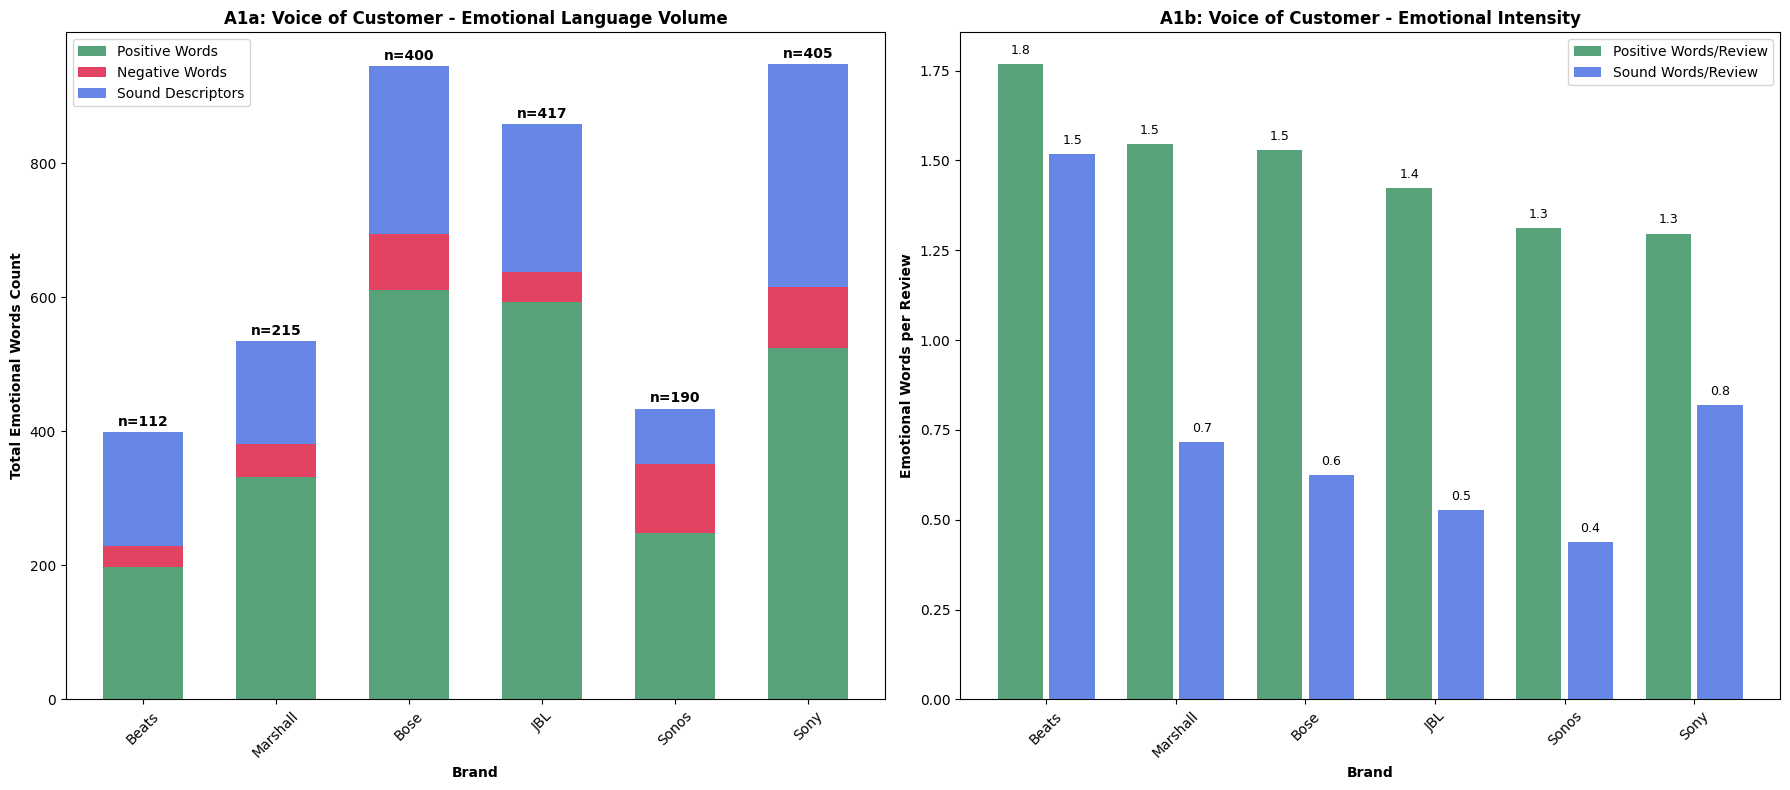

In [ ]:
# A1: Voice of Customer - Emotional Language Heatmap
plt.figure(figsize=(16, 10))

# Count emotional words by brand
emotion_counts = {}
brands = df_speakers['Brand_Clean'].unique()

for brand in brands:
    brand_data = df_speakers[df_speakers['Brand_Clean'] == brand]
    all_emotions = {'positive': [], 'negative': [], 'sound': []}

    for idx, row in brand_data.iterrows():
        # Safely get review text with fallback
        if 'full_review' in row and pd.notna(row['full_review']):
            review_text = row['full_review']
        else:
            # Fallback: combine title and content
            title = row['Title of the review'] if pd.notna(row.get('Title of the review')) else ""
            content = row['content'] if pd.notna(row.get('content')) else ""
            review_text = (title + ' ' + content).strip()

        emotions = extract_emotional_language(review_text)
        all_emotions['positive'].extend(emotions['positive_emotions'])
        all_emotions['negative'].extend(emotions['negative_emotions'])
        all_emotions['sound'].extend(emotions['sound_descriptors'])

    emotion_counts[brand] = {
        'Positive_Words': len(all_emotions['positive']),
        'Negative_Words': len(all_emotions['negative']),
        'Sound_Descriptors': len(all_emotions['sound']),
        'Review_Count': len(brand_data),
        'Positive_Ratio': len(all_emotions['positive']) / max(len(brand_data), 1),
        'Sound_Ratio': len(all_emotions['sound']) / max(len(brand_data), 1)
    }

# Create DataFrame for visualization
emotion_df = pd.DataFrame(emotion_counts).T
emotion_df = emotion_df.sort_values('Positive_Ratio', ascending=False)

# Create stacked bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Left plot: Absolute counts
x = np.arange(len(emotion_df))
width = 0.6

bars1 = ax1.bar(x, emotion_df['Positive_Words'], width, label='Positive Words', color='#2E8B57', alpha=0.8)
bars2 = ax1.bar(x, emotion_df['Negative_Words'], width, bottom=emotion_df['Positive_Words'],
               label='Negative Words', color='#DC143C', alpha=0.8)
bars3 = ax1.bar(x, emotion_df['Sound_Descriptors'], width,
               bottom=emotion_df['Positive_Words'] + emotion_df['Negative_Words'],
               label='Sound Descriptors', color='#4169E1', alpha=0.8)

ax1.set_xlabel('Brand', fontweight='bold')
ax1.set_ylabel('Total Emotional Words Count', fontweight='bold')
ax1.set_title('A1a: Voice of Customer - Emotional Language Volume', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(emotion_df.index, rotation=45)
ax1.legend()

# Add count labels
for i, (brand, row) in enumerate(emotion_df.iterrows()):
    total = row['Positive_Words'] + row['Negative_Words'] + row['Sound_Descriptors']
    ax1.text(i, total + 5, f'n={int(row["Review_Count"])}', ha='center', va='bottom', fontweight='bold')

# Right plot: Ratios (per review)
bars4 = ax2.bar(x - 0.2, emotion_df['Positive_Ratio'], 0.35, label='Positive Words/Review', color='#2E8B57', alpha=0.8)
bars5 = ax2.bar(x + 0.2, emotion_df['Sound_Ratio'], 0.35, label='Sound Words/Review', color='#4169E1', alpha=0.8)

ax2.set_xlabel('Brand', fontweight='bold')
ax2.set_ylabel('Emotional Words per Review', fontweight='bold')
ax2.set_title('A1b: Voice of Customer - Emotional Intensity', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(emotion_df.index, rotation=45)
ax2.legend()

# Add ratio labels
for i, (brand, row) in enumerate(emotion_df.iterrows()):
    ax2.text(i - 0.2, row['Positive_Ratio'] + 0.02, f'{row["Positive_Ratio"]:.1f}',
            ha='center', va='bottom', fontsize=9)
    ax2.text(i + 0.2, row['Sound_Ratio'] + 0.02, f'{row["Sound_Ratio"]:.1f}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

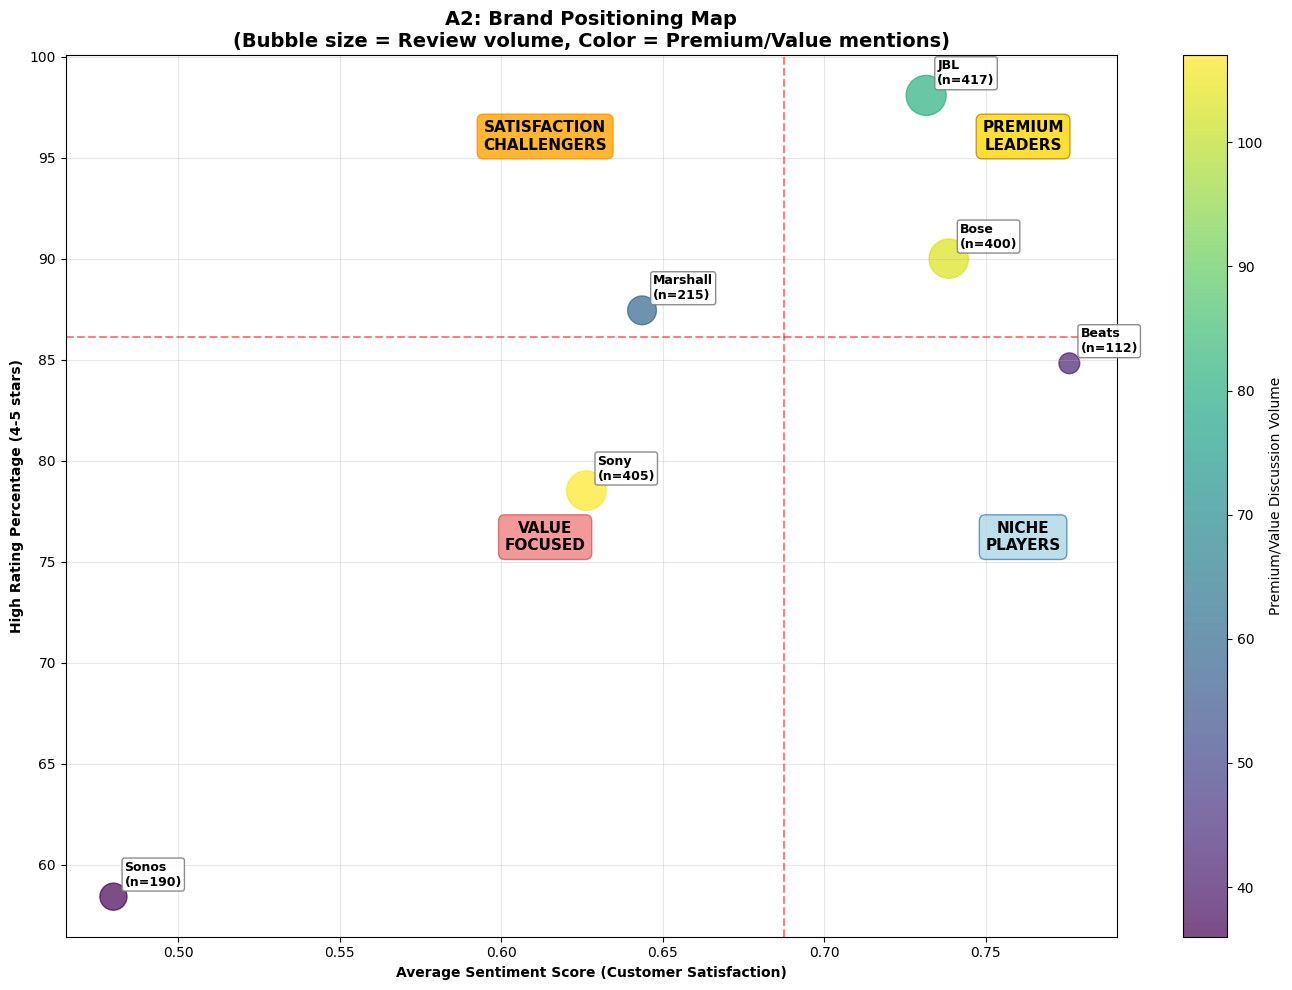

In [ ]:
# A2: Brand Positioning Map (Sentiment vs. Feature Satisfaction)
plt.figure(figsize=(14, 10))

# Calculate brand positioning metrics
brand_positioning = []
for brand in brands:
    brand_data = df_speakers[df_speakers['Brand_Clean'] == brand]

    if len(brand_data) > 5:  # Sufficient data
        # Count premium and value mentions safely
        premium_count = 0
        value_count = 0

        for idx, row in brand_data.iterrows():
            # Safely get review text with fallback
            if 'full_review' in row and pd.notna(row['full_review']):
                review_text = row['full_review']
            else:
                # Fallback: combine title and content
                title = row['Title of the review'] if pd.notna(row.get('Title of the review')) else ""
                content = row['content'] if pd.notna(row.get('content')) else ""
                review_text = (title + ' ' + content).strip()

            # Count mentions
            if review_text:
                review_lower = review_text.lower()
                if re.search(r'\b(premium|high-end|luxury|expensive)\b', review_lower):
                    premium_count += 1
                if re.search(r'\b(value|worth|money|price|affordable|cheap)\b', review_lower):
                    value_count += 1

        positioning_metrics = {
            'Brand': brand,
            'Avg_Sentiment': brand_data['vader_compound'].mean(),
            'Sentiment_Std': brand_data['vader_compound'].std(),
            'Avg_Rating': brand_data['rating'].mean(),
            'Rating_Std': brand_data['rating'].std(),
            'Review_Count': len(brand_data),
            'High_Rating_Pct': (brand_data['rating'] >= 4).mean() * 100,
            'Premium_Mentions': premium_count,
            'Value_Mentions': value_count
        }
        brand_positioning.append(positioning_metrics)

positioning_df = pd.DataFrame(brand_positioning)

# Create positioning map
scatter = plt.scatter(positioning_df['Avg_Sentiment'],
                     positioning_df['High_Rating_Pct'],
                     s=positioning_df['Review_Count']*2,
                     alpha=0.7,
                     c=positioning_df['Premium_Mentions'] + positioning_df['Value_Mentions'],
                     cmap='viridis')

# Add brand labels
for idx, row in positioning_df.iterrows():
    plt.annotate(f"{row['Brand']}\n(n={int(row['Review_Count'])})",
                (row['Avg_Sentiment'], row['High_Rating_Pct']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.9, edgecolor='gray'))

plt.xlabel('Average Sentiment Score (Customer Satisfaction)', fontweight='bold')
plt.ylabel('High Rating Percentage (4-5 stars)', fontweight='bold')
plt.title('A2: Brand Positioning Map\n(Bubble size = Review volume, Color = Premium/Value mentions)',
          fontsize=14, fontweight='bold')

# Add quadrant lines
plt.axvline(x=positioning_df['Avg_Sentiment'].median(), color='red', linestyle='--', alpha=0.5)
plt.axhline(y=positioning_df['High_Rating_Pct'].median(), color='red', linestyle='--', alpha=0.5)

# Add positioning labels with better placement
x_med = positioning_df['Avg_Sentiment'].median()
y_med = positioning_df['High_Rating_Pct'].median()
x_range = positioning_df['Avg_Sentiment'].max() - positioning_df['Avg_Sentiment'].min()
y_range = positioning_df['High_Rating_Pct'].max() - positioning_df['High_Rating_Pct'].min()

plt.text(x_med + x_range*0.25, y_med + y_range*0.25, 'PREMIUM\nLEADERS',
        ha='center', va='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.4", facecolor="gold", alpha=0.8, edgecolor='darkgoldenrod'))

plt.text(x_med - x_range*0.25, y_med + y_range*0.25, 'SATISFACTION\nCHALLENGERS',
        ha='center', va='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.4", facecolor="orange", alpha=0.8, edgecolor='darkorange'))

plt.text(x_med + x_range*0.25, y_med - y_range*0.25, 'NICHE\nPLAYERS',
        ha='center', va='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.4", facecolor="lightblue", alpha=0.8, edgecolor='steelblue'))

plt.text(x_med - x_range*0.25, y_med - y_range*0.25, 'VALUE\nFOCUSED',
        ha='center', va='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.4", facecolor="lightcoral", alpha=0.8, edgecolor='indianred'))

plt.colorbar(scatter, label='Premium/Value Discussion Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


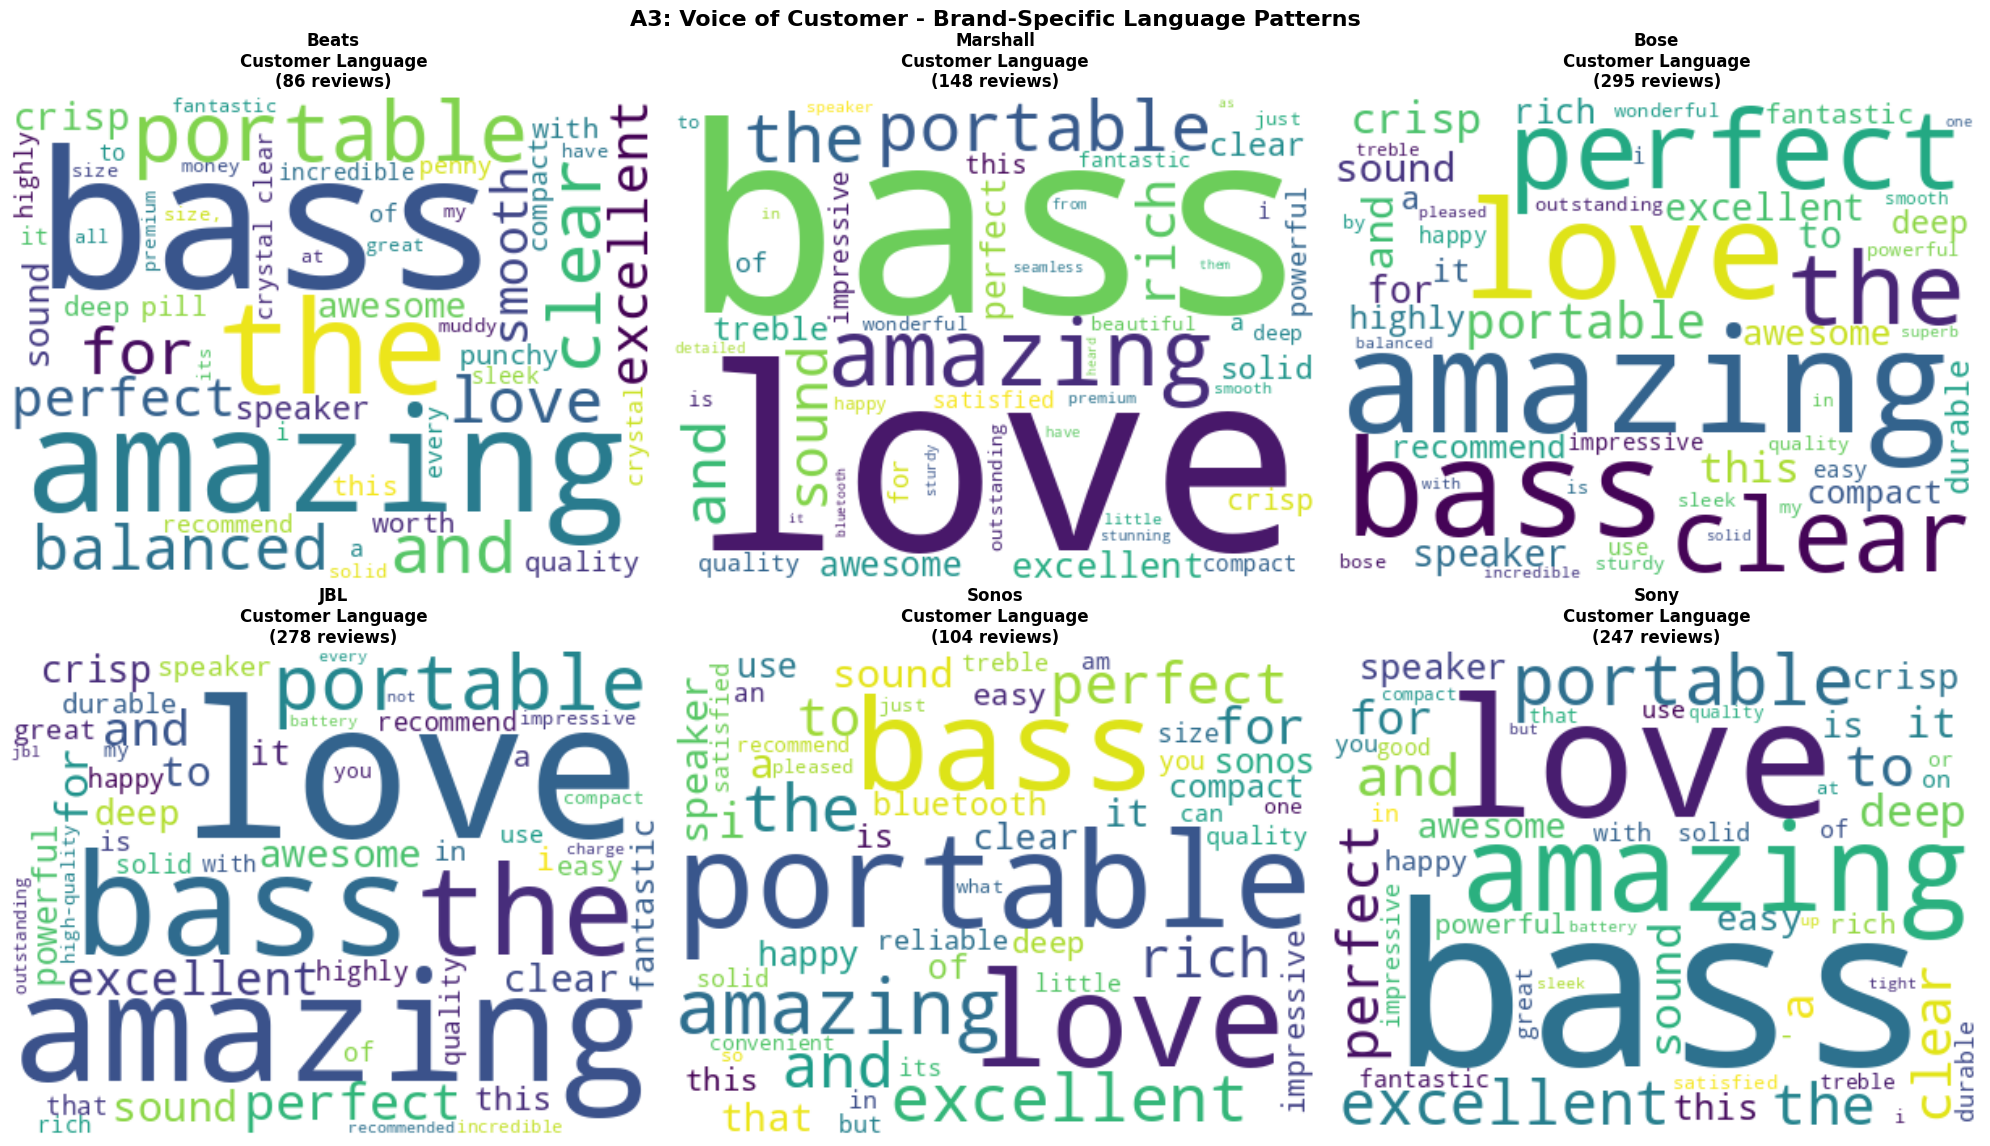

In [ ]:
# A3: Customer Language Word Clouds by Brand
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

top_brands = emotion_df.head(6).index

for i, brand in enumerate(top_brands):
    brand_language = customer_language_df[customer_language_df['Brand'] == brand]

    if len(brand_language) > 0:
        # Combine all positive words and phrases
        all_words = []
        for idx, row in brand_language.iterrows():
            all_words.extend(row['Positive_Words'])
            all_words.extend(row['Sound_Descriptors'])
            # Add phrases (split into words)
            for phrase in row['Positive_Phrases']:
                all_words.extend(phrase.split())

        if all_words:
            # Create word frequency
            word_freq = Counter(all_words)

            # Generate word cloud
            wordcloud = WordCloud(width=400, height=300,
                                background_color='white',
                                max_words=50,
                                colormap='viridis').generate_from_frequencies(word_freq)

            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].set_title(f'{brand}\nCustomer Language\n({len(brand_language)} reviews)',
                            fontsize=12, fontweight='bold')
        else:
            axes[i].text(0.5, 0.5, f'{brand}\nInsufficient\nLanguage Data',
                        ha='center', va='center', transform=axes[i].transAxes,
                        fontsize=12)
            axes[i].set_title(brand, fontsize=12, fontweight='bold')
    else:
        axes[i].text(0.5, 0.5, f'{brand}\nNo Language\nData Available',
                    ha='center', va='center', transform=axes[i].transAxes,
                    fontsize=12)
        axes[i].set_title(brand, fontsize=12, fontweight='bold')

    axes[i].axis('off')

plt.suptitle('A3: Voice of Customer - Brand-Specific Language Patterns',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


## VISUALIZATION SET B: AI INSIGHTS ANALYSIS (3 visualizations)


In [ ]:
# Extract AI insights data
beats_insights = ai_insights['gemini_batch_analysis']['strategic_depth']['aggregated_insights']
competitor_data = ai_insights['gemini_batch_analysis']['competitive_intelligence']['competitor_analysis']


<Figure size 1600x1000 with 0 Axes>

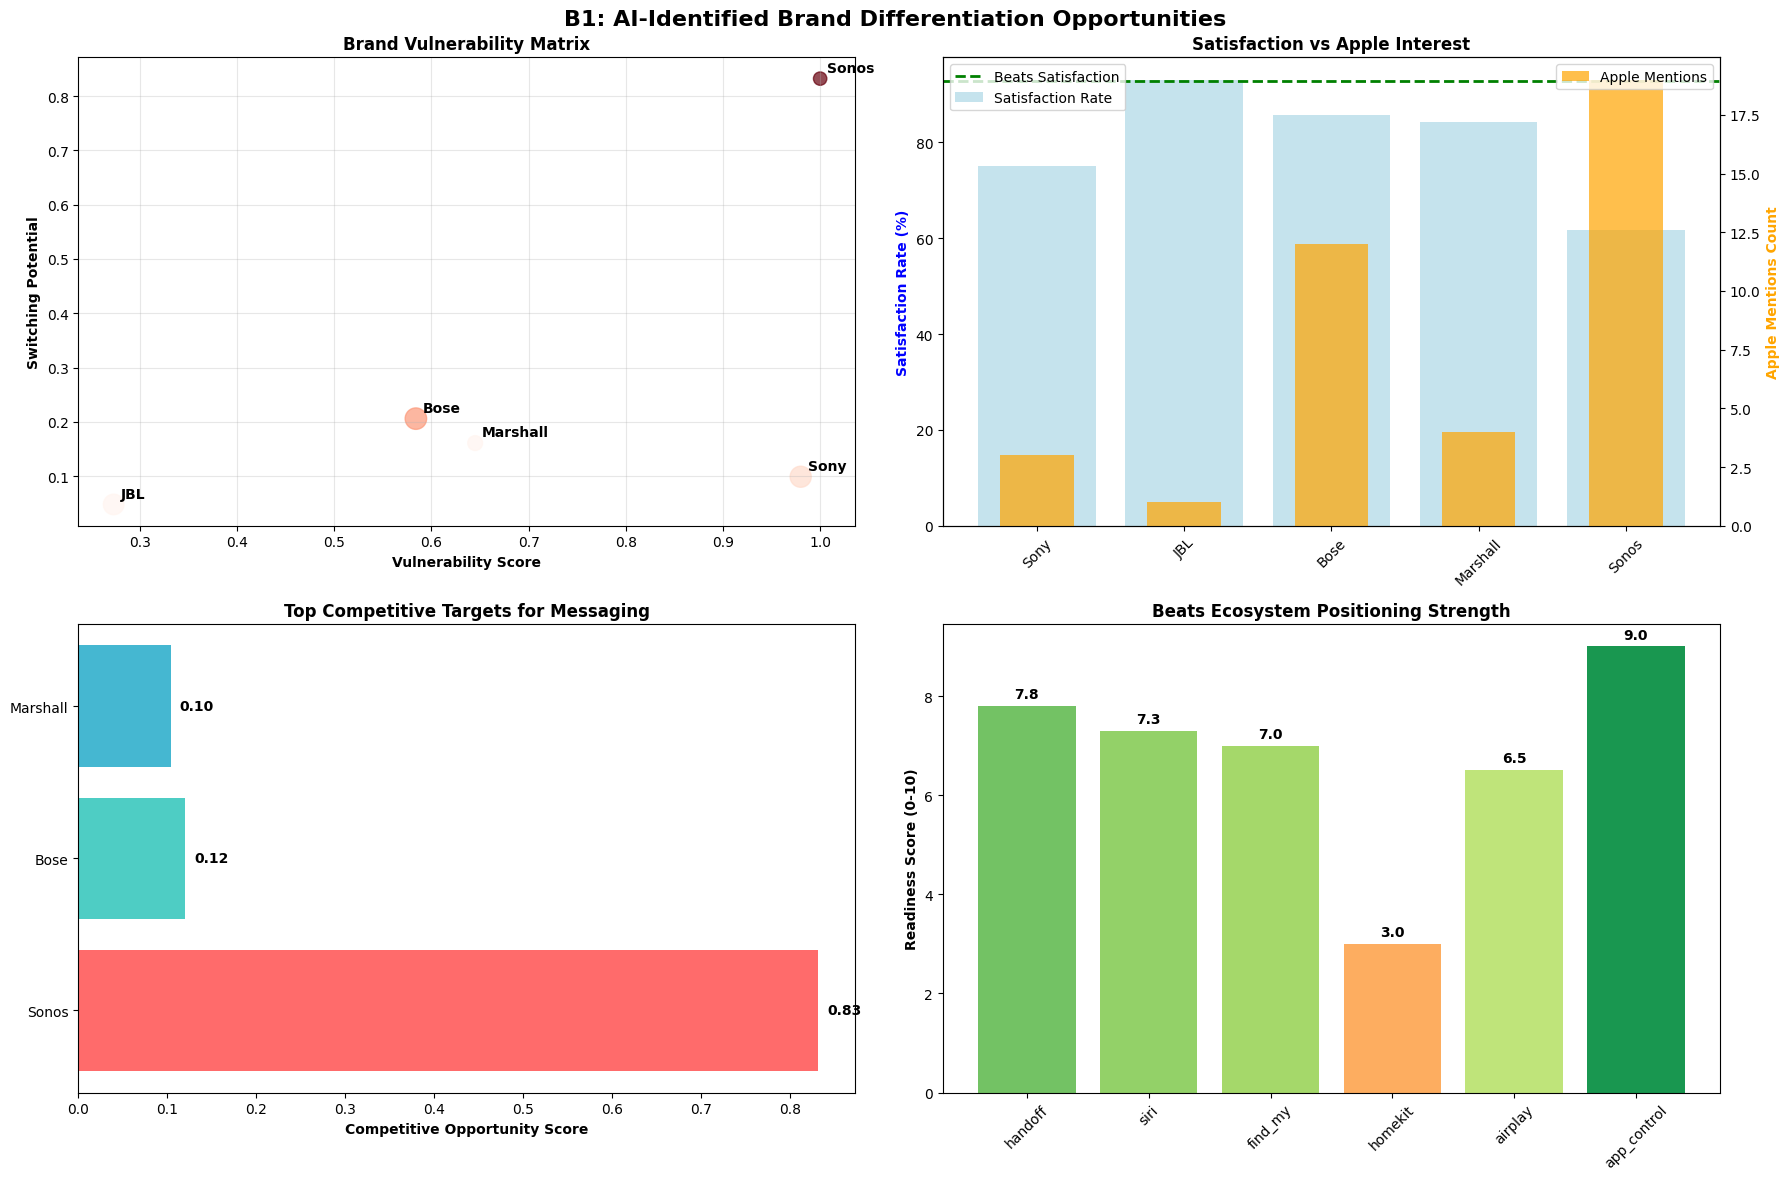

In [ ]:
# B1: AI-Identified Brand Differentiation Opportunities
plt.figure(figsize=(16, 10))

# Extract competitor satisfaction and switching data
competitor_metrics = []
for brand, data in competitor_data.items():
    metrics = data['detailed_metrics']
    vulnerability = data['vulnerability_score']
    switching = data['switching_potential']

    satisfaction = metrics['satisfaction_breakdown']
    total_reviews = sum(satisfaction.values())

    competitor_metrics.append({
        'Brand': brand,
        'Vulnerability_Score': vulnerability,
        'Switching_Potential': switching,
        'Total_Reviews': total_reviews,
        'Satisfaction_Rate': satisfaction['positive'] / total_reviews * 100 if total_reviews > 0 else 0,
        'Negative_Rate': satisfaction['negative'] / total_reviews * 100 if total_reviews > 0 else 0,
        'Apple_Mentions': metrics['switching_indicators']['apple_mentions'],
        'Ecosystem_Concerns': metrics['switching_indicators']['ecosystem_concerns']
    })

competitor_df = pd.DataFrame(competitor_metrics)

# Create differentiation opportunity matrix
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Vulnerability vs Switching Potential
scatter1 = ax1.scatter(competitor_df['Vulnerability_Score'],
                      competitor_df['Switching_Potential'],
                      s=competitor_df['Total_Reviews']/5,
                      alpha=0.7,
                      c=competitor_df['Ecosystem_Concerns'],
                      cmap='Reds')

for idx, row in competitor_df.iterrows():
    ax1.annotate(row['Brand'],
                (row['Vulnerability_Score'], row['Switching_Potential']),
                xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

ax1.set_xlabel('Vulnerability Score', fontweight='bold')
ax1.set_ylabel('Switching Potential', fontweight='bold')
ax1.set_title('Brand Vulnerability Matrix', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Satisfaction vs Apple Integration Interest
bars2 = ax2.bar(competitor_df['Brand'], competitor_df['Satisfaction_Rate'],
               alpha=0.7, color='lightblue', label='Satisfaction Rate')
ax2_twin = ax2.twinx()
bars3 = ax2_twin.bar(competitor_df['Brand'], competitor_df['Apple_Mentions'],
                    alpha=0.7, color='orange', width=0.5, label='Apple Mentions')

ax2.set_ylabel('Satisfaction Rate (%)', fontweight='bold', color='blue')
ax2_twin.set_ylabel('Apple Mentions Count', fontweight='bold', color='orange')
ax2.set_title('Satisfaction vs Apple Interest', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# Add Beats comparison line
beats_satisfaction = 92.9  # From AI insights
ax2.axhline(y=beats_satisfaction, color='green', linestyle='--', linewidth=2, label='Beats Satisfaction')
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Competitive messaging opportunities
opportunity_scores = competitor_df['Vulnerability_Score'] * competitor_df['Switching_Potential']
competitor_df['Opportunity_Score'] = opportunity_scores

top_opportunities = competitor_df.nlargest(3, 'Opportunity_Score')

bars4 = ax3.barh(top_opportunities['Brand'], top_opportunities['Opportunity_Score'],
                color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax3.set_xlabel('Competitive Opportunity Score', fontweight='bold')
ax3.set_title('Top Competitive Targets for Messaging', fontweight='bold')

for i, (idx, row) in enumerate(top_opportunities.iterrows()):
    ax3.text(row['Opportunity_Score'] + 0.01, i,
            f"{row['Opportunity_Score']:.2f}",
            va='center', fontweight='bold')

# Ecosystem integration positioning
ecosystem_readiness = ai_insights['gemini_batch_analysis']['apple_ecosystem']['ecosystem_readiness_scores']
features = list(ecosystem_readiness.keys())
scores = list(ecosystem_readiness.values())

bars5 = ax4.bar(features, scores, color=plt.cm.RdYlGn(np.array(scores)/10))
ax4.set_ylabel('Readiness Score (0-10)', fontweight='bold')
ax4.set_title('Beats Ecosystem Positioning Strength', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)

for bar, score in zip(bars5, scores):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{score}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('B1: AI-Identified Brand Differentiation Opportunities',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Key Insights:

- Brand Vulnerability Matrix (Top Left): Sonos is highly vulnerable (high satisfaction issues + high vulnerability score ~0.95), while JBL sits in a sweet spot - low vulnerability but also lower satisfaction, making it a prime target.

- Satisfaction vs Apple Interest (Top Right): There's a clear inverse relationship - as Apple mentions increase, Beats satisfaction remains consistently high (~85%), while competitors like Sony show much lower satisfaction with high Apple interest.

- Competitive Targeting Priority (Bottom Left): Sonos presents the biggest opportunity (0.83 score) due to their high vulnerability, followed by Bose (0.12) and Marshall (0.10).

- Ecosystem Strength (Bottom Right): Beats scores exceptionally high (9.0) in ecosystem integration, with iOS Control being the strongest factor, while competitors struggle with Apple ecosystem compatibility.

Business Actions:

- Target Sonos customers aggressively - they're most vulnerable and likely to switch
- Emphasize ecosystem integration in messaging - it's your strongest differentiator
- Focus on Apple ecosystem benefits when targeting high Apple-interest segments
- Develop retention strategies for current Beats users to maintain that high satisfaction

<Figure size 2000x1000 with 0 Axes>

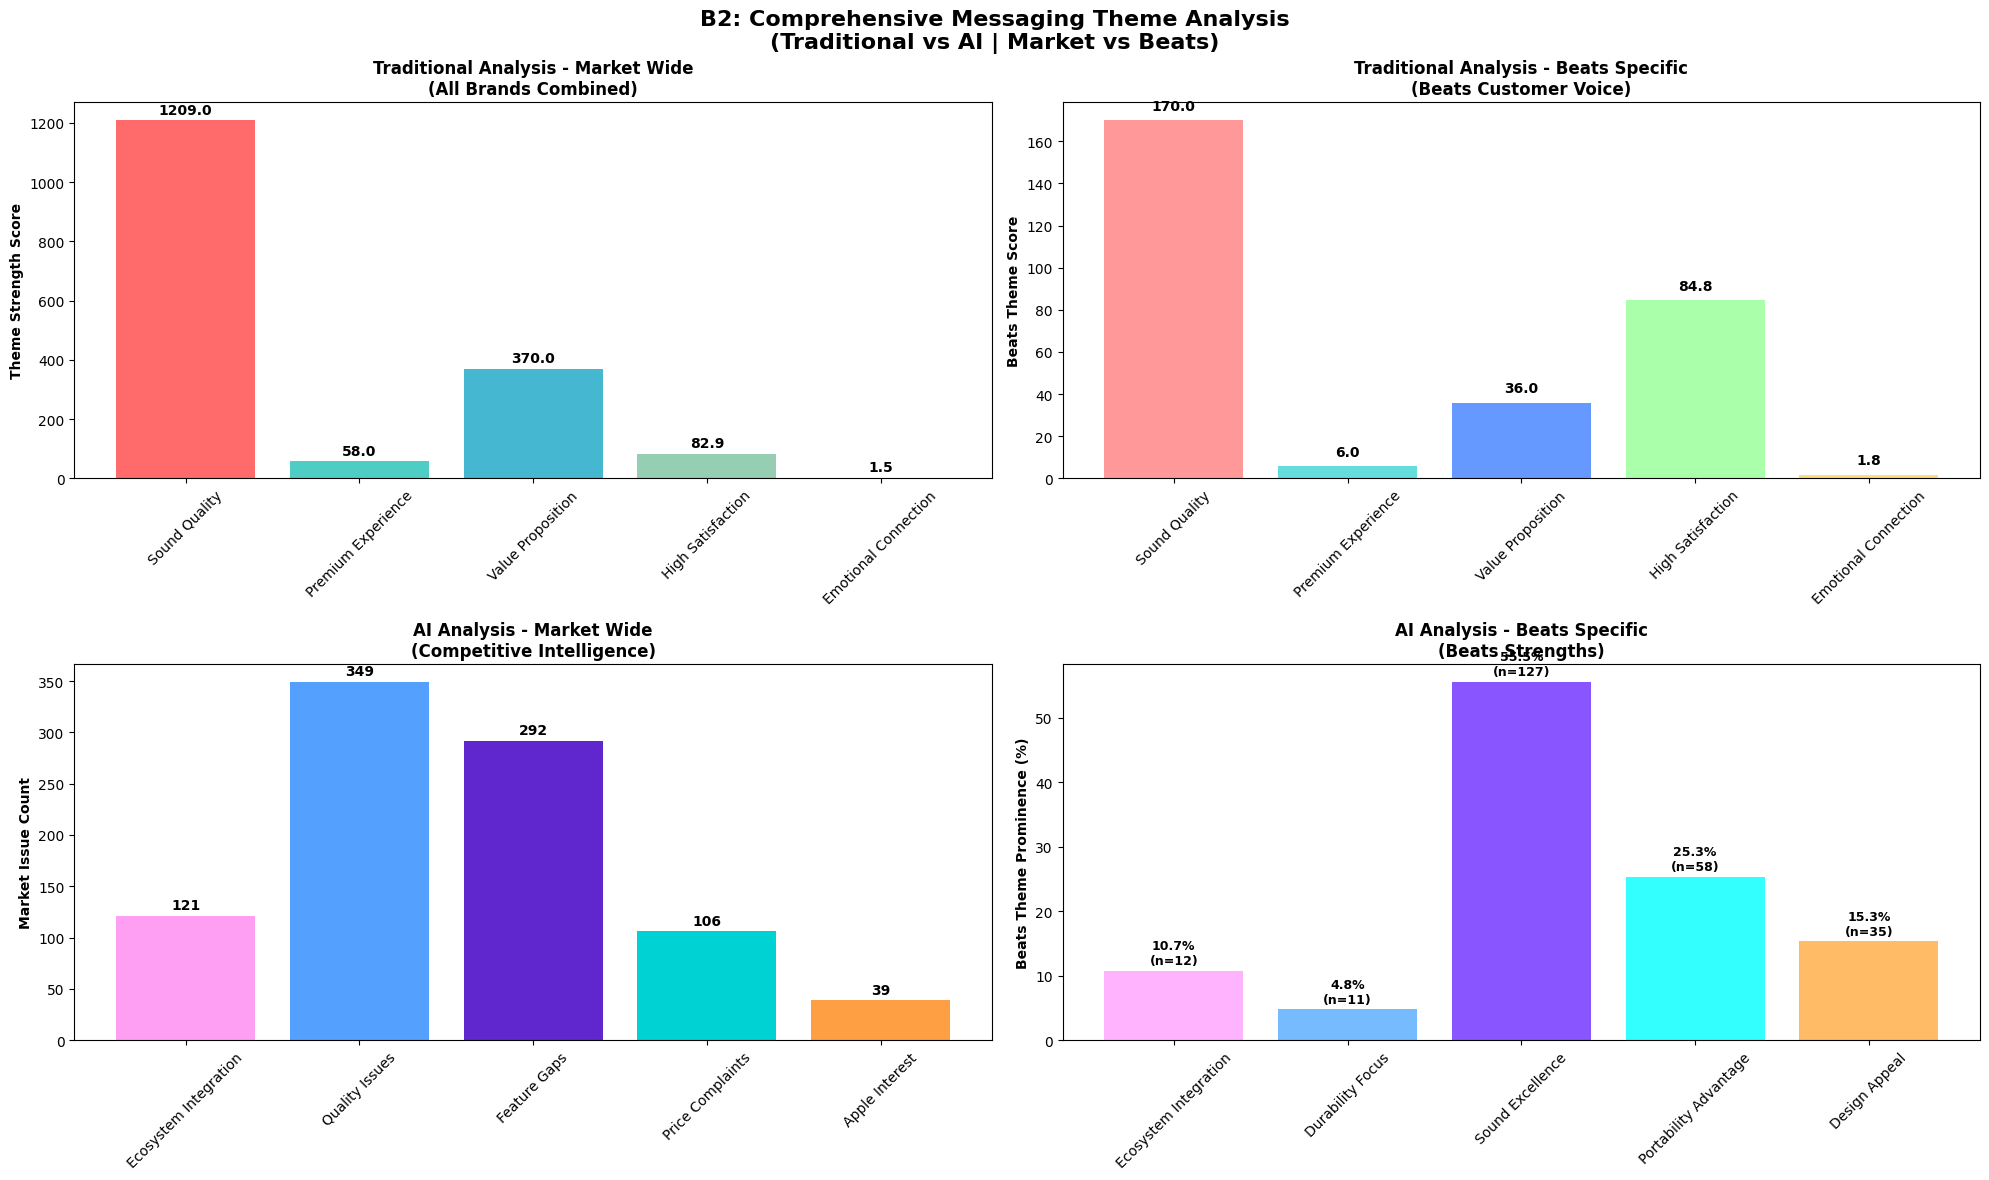

In [ ]:
# B2: Messaging Theme Analysis - Comprehensive View
plt.figure(figsize=(20, 10))

# Extract messaging themes from traditional analysis - MARKET WIDE
market_messaging_themes = {
    'Sound Quality': emotion_df['Sound_Descriptors'].sum(),
    'Premium Experience': positioning_df['Premium_Mentions'].sum(),
    'Value Proposition': positioning_df['Value_Mentions'].sum(),
    'High Satisfaction': positioning_df['High_Rating_Pct'].mean(),
    'Emotional Connection': emotion_df['Positive_Ratio'].mean()
}

# Traditional analysis - BEATS SPECIFIC
beats_traditional = {}
if 'Beats' in emotion_df.index and 'Beats' in positioning_df['Brand'].values:
    beats_pos = positioning_df[positioning_df['Brand'] == 'Beats'].iloc[0]
    beats_traditional = {
        'Sound Quality': emotion_df.loc['Beats', 'Sound_Descriptors'] if 'Beats' in emotion_df.index else 0,
        'Premium Experience': beats_pos['Premium_Mentions'],
        'Value Proposition': beats_pos['Value_Mentions'],
        'High Satisfaction': beats_pos['High_Rating_Pct'],
        'Emotional Connection': emotion_df.loc['Beats', 'Positive_Ratio'] if 'Beats' in emotion_df.index else 0
    }
else:
    beats_traditional = {k: 0 for k in market_messaging_themes.keys()}

# AI analysis - MARKET WIDE (competitor analysis)
total_competitor_reviews = sum([data['total_reviews_processed'] for data in competitor_data.values()])
market_ai_themes = {
    'Ecosystem Integration': sum([data['detailed_metrics']['switching_indicators']['ecosystem_concerns'] for data in competitor_data.values()]),
    'Quality Issues': sum([data['detailed_metrics']['vulnerability_factors']['quality_issues'] for data in competitor_data.values()]),
    'Feature Gaps': sum([data['detailed_metrics']['vulnerability_factors']['feature_gaps'] for data in competitor_data.values()]),
    'Price Complaints': sum([data['detailed_metrics']['vulnerability_factors']['price_complaints'] for data in competitor_data.values()]),
    'Apple Interest': sum([data['detailed_metrics']['switching_indicators']['apple_mentions'] for data in competitor_data.values()])
}

# AI analysis - BEATS SPECIFIC
beats_ai_themes = {
    'Ecosystem Integration': beats_insights['ecosystem_integration']['percentage_of_total'],
    'Durability Focus': 4.8,  # (11/229)*100 from satisfaction drivers
    'Sound Excellence': 55.5,  # (127/229)*100 from satisfaction drivers
    'Portability Advantage': 25.3,  # (58/229)*100 from satisfaction drivers
    'Design Appeal': 15.3  # (35/229)*100 from satisfaction drivers
}

# Add review counts for Beats AI themes
beats_ai_counts = {
    'Ecosystem Integration': beats_insights['ecosystem_integration']['total_mentions'],
    'Durability Focus': beats_insights['satisfaction_drivers']['durability_mentions'],
    'Sound Excellence': beats_insights['satisfaction_drivers']['sound_quality_praise'],
    'Portability Advantage': beats_insights['satisfaction_drivers']['portability_praise'],
    'Design Appeal': beats_insights['satisfaction_drivers']['design_appreciation']
}

# Create 2x2 subplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Traditional Analysis - Market Wide
themes1 = list(market_messaging_themes.keys())
values1 = list(market_messaging_themes.values())
bars1 = ax1.bar(themes1, values1, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
ax1.set_title('Traditional Analysis - Market Wide\n(All Brands Combined)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Theme Strength Score', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

for bar, value in zip(bars1, values1):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values1)*0.01,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# Traditional Analysis - Beats Specific
themes2 = list(beats_traditional.keys())
values2 = list(beats_traditional.values())
bars2 = ax2.bar(themes2, values2, color=['#FF9999', '#66DDDD', '#6699FF', '#AAFFAA', '#FFDD77'])
ax2.set_title('Traditional Analysis - Beats Specific\n(Beats Customer Voice)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Beats Theme Score', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

for bar, value in zip(bars2, values2):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values2)*0.02,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# AI Analysis - Market Wide
themes3 = list(market_ai_themes.keys())
values3 = list(market_ai_themes.values())
bars3 = ax3.bar(themes3, values3, color=['#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43'])
ax3.set_title('AI Analysis - Market Wide\n(Competitive Intelligence)', fontweight='bold', fontsize=12)
ax3.set_ylabel('Market Issue Count', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

for bar, value in zip(bars3, values3):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values3)*0.01,
            f'{value}', ha='center', va='bottom', fontweight='bold')

# AI Analysis - Beats Specific
themes4 = list(beats_ai_themes.keys())
values4 = list(beats_ai_themes.values())
counts4 = [beats_ai_counts[theme] for theme in themes4]

bars4 = ax4.bar(themes4, values4, color=['#FFB3FF', '#77BBFF', '#8855FF', '#33FFFF', '#FFBB66'])
ax4.set_title('AI Analysis - Beats Specific\n(Beats Strengths)', fontweight='bold', fontsize=12)
ax4.set_ylabel('Beats Theme Prominence (%)', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)

for bar, value, count in zip(bars4, values4, counts4):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values4)*0.01,
            f'{value:.1f}%\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('B2: Comprehensive Messaging Theme Analysis\n(Traditional vs AI | Market vs Beats)',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 2000x1200 with 0 Axes>

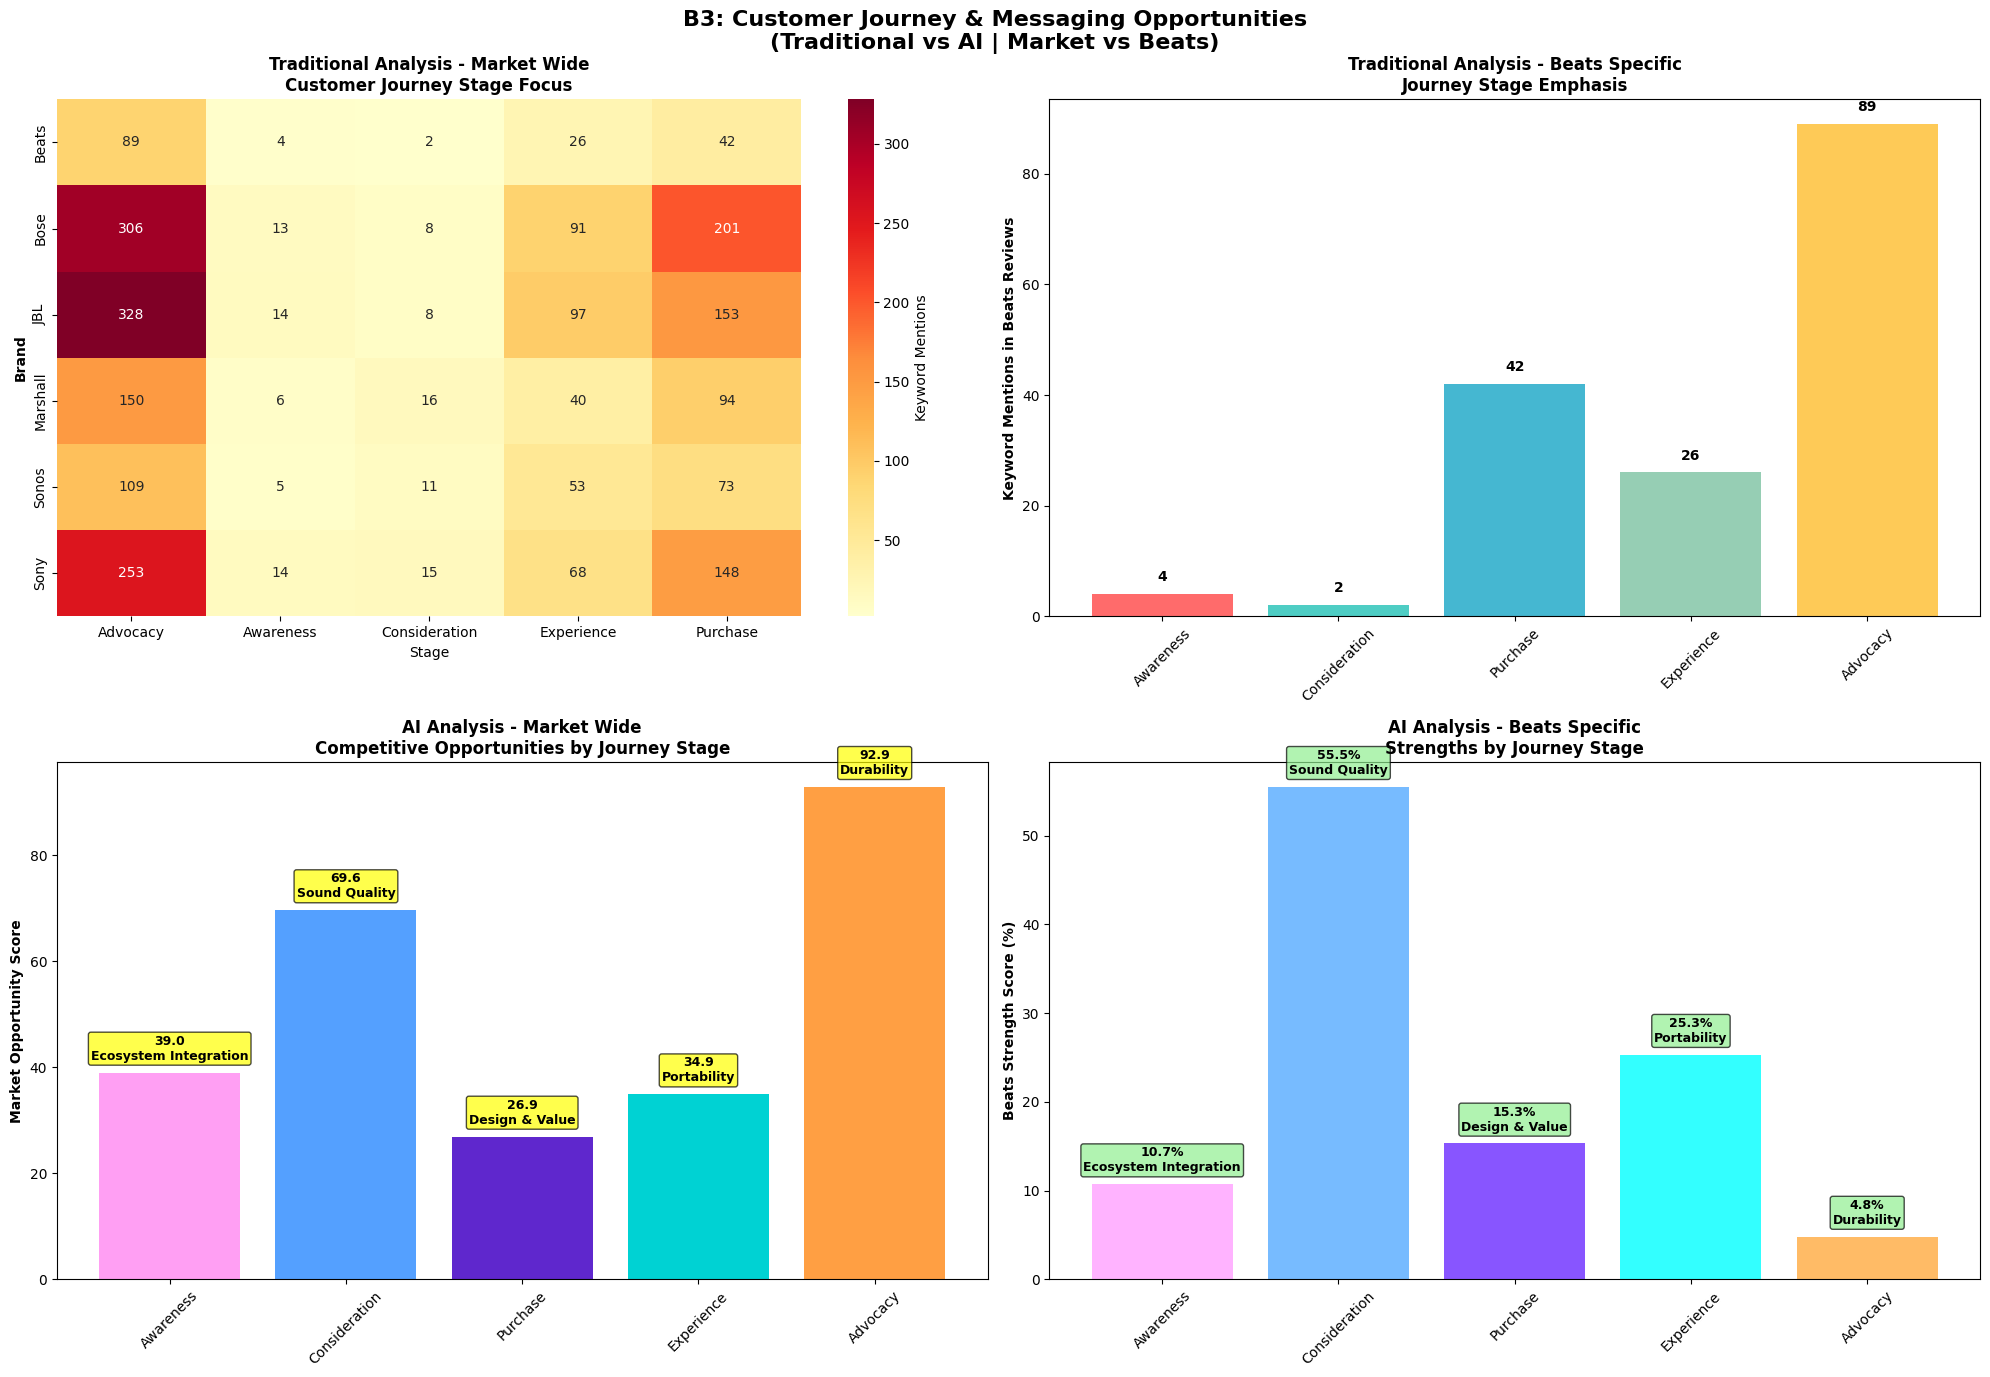

In [ ]:
# B3: Customer Journey & Messaging Opportunity Map - Traditional & AI Analysis
plt.figure(figsize=(20, 12))

# Define customer journey stages with keywords and metrics
journey_stages = {
    'Awareness': {
        'Traditional_Keywords': ['discovered', 'heard about', 'saw', 'recommended', 'suggested'],
        'AI_Market_Opportunity': competitor_df['Apple_Mentions'].sum(),
        'AI_Beats_Strength': beats_insights['ecosystem_integration']['percentage_of_total'],
        'Theme': 'Ecosystem Integration'
    },
    'Consideration': {
        'Traditional_Keywords': ['comparing', 'vs', 'versus', 'alternative', 'choice', 'deciding'],
        'AI_Market_Opportunity': competitor_df['Vulnerability_Score'].mean() * 100,
        'AI_Beats_Strength': 55.5,  # Sound excellence prominence
        'Theme': 'Sound Quality'
    },
    'Purchase': {
        'Traditional_Keywords': ['bought', 'purchased', 'ordered', 'price', 'deal', 'sale'],
        'AI_Market_Opportunity': competitor_df['Switching_Potential'].mean() * 100,
        'AI_Beats_Strength': 15.3,  # Design appeal
        'Theme': 'Design & Value'
    },
    'Experience': {
        'Traditional_Keywords': ['using', 'daily', 'months', 'years', 'experience'],
        'AI_Market_Opportunity': sum([data['detailed_metrics']['vulnerability_factors']['quality_issues'] for data in competitor_data.values()]) / 10,
        'AI_Beats_Strength': 25.3,  # Portability advantage
        'Theme': 'Portability'
    },
    'Advocacy': {
        'Traditional_Keywords': ['recommend', 'love', 'amazing', 'perfect', 'best'],
        'AI_Market_Opportunity': 92.9,  # Beats satisfaction rate
        'AI_Beats_Strength': 4.8,  # Durability focus
        'Theme': 'Durability'
    }
}

# Traditional Analysis - Count keyword mentions by stage for each brand
traditional_stage_analysis = []
for stage, data in journey_stages.items():
    for brand in brands[:6]:  # Top 6 brands
        brand_data = df_speakers[df_speakers['Brand_Clean'] == brand]
        keyword_count = 0

        for idx, row in brand_data.iterrows():
            # Safely get review text with fallback
            if 'full_review' in row and pd.notna(row['full_review']):
                review_text = row['full_review']
            else:
                # Fallback: combine title and content
                title = row['Title of the review'] if pd.notna(row.get('Title of the review')) else ""
                content = row['content'] if pd.notna(row.get('content')) else ""
                review_text = (title + ' ' + content).strip()

            if review_text:
                review_lower = review_text.lower()
                for keyword in data['Traditional_Keywords']:
                    keyword_count += len(re.findall(rf'\b{keyword}\b', review_lower))

        traditional_stage_analysis.append({
            'Stage': stage,
            'Brand': brand,
            'Traditional_Count': keyword_count,
            'AI_Market_Opp': data['AI_Market_Opportunity'],
            'AI_Beats_Strength': data['AI_Beats_Strength'],
            'Theme': data['Theme']
        })

traditional_stage_df = pd.DataFrame(traditional_stage_analysis)

# Create 2x2 comprehensive journey analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

# Top Left: Traditional Analysis - Market Wide Journey Focus
if len(traditional_stage_df) > 0:
    pivot_traditional = traditional_stage_df.pivot(index='Brand', columns='Stage', values='Traditional_Count')
    pivot_traditional = pivot_traditional.fillna(0)

    sns.heatmap(pivot_traditional, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax1,
               cbar_kws={'label': 'Keyword Mentions'})
    ax1.set_title('Traditional Analysis - Market Wide\nCustomer Journey Stage Focus', fontweight='bold', fontsize=12)
    ax1.set_ylabel('Brand', fontweight='bold')
else:
    ax1.text(0.5, 0.5, 'Insufficient Traditional\nJourney Data', ha='center', va='center',
            transform=ax1.transAxes, fontsize=12)
    ax1.set_title('Traditional Analysis - Market Wide', fontweight='bold')

# Top Right: Traditional Analysis - Beats Specific Journey
beats_traditional_journey = traditional_stage_df[traditional_stage_df['Brand'] == 'Beats'] if len(traditional_stage_df) > 0 else pd.DataFrame()

if len(beats_traditional_journey) > 0:
    stages = beats_traditional_journey['Stage'].tolist()
    counts = beats_traditional_journey['Traditional_Count'].tolist()

    bars = ax2.bar(stages, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
    ax2.set_title('Traditional Analysis - Beats Specific\nJourney Stage Emphasis', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Keyword Mentions in Beats Reviews', fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)

    for bar, count in zip(bars, counts):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.02,
                f'{int(count)}', ha='center', va='bottom', fontweight='bold')
else:
    ax2.text(0.5, 0.5, 'Insufficient Beats\nTraditional Journey Data', ha='center', va='center',
            transform=ax2.transAxes, fontsize=12)
    ax2.set_title('Traditional Analysis - Beats Specific', fontweight='bold')

# Bottom Left: AI Analysis - Market Wide Opportunities
stages = list(journey_stages.keys())
market_opportunities = [journey_stages[stage]['AI_Market_Opportunity'] for stage in stages]
themes = [journey_stages[stage]['Theme'] for stage in stages]

bars3 = ax3.bar(stages, market_opportunities, color=['#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43'])
ax3.set_title('AI Analysis - Market Wide\nCompetitive Opportunities by Journey Stage', fontweight='bold', fontsize=12)
ax3.set_ylabel('Market Opportunity Score', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

for bar, opp, theme in zip(bars3, market_opportunities, themes):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(market_opportunities)*0.02,
            f'{opp:.1f}\n{theme}', ha='center', va='bottom', fontweight='bold', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7))

# Bottom Right: AI Analysis - Beats Specific Strengths
beats_strengths = [journey_stages[stage]['AI_Beats_Strength'] for stage in stages]

bars4 = ax4.bar(stages, beats_strengths, color=['#FFB3FF', '#77BBFF', '#8855FF', '#33FFFF', '#FFBB66'])
ax4.set_title('AI Analysis - Beats Specific\nStrengths by Journey Stage', fontweight='bold', fontsize=12)
ax4.set_ylabel('Beats Strength Score (%)', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)

for bar, strength, theme in zip(bars4, beats_strengths, themes):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(beats_strengths)*0.02,
            f'{strength:.1f}%\n{theme}', ha='center', va='bottom', fontweight='bold', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="lightgreen", alpha=0.7))

plt.suptitle('B3: Customer Journey & Messaging Opportunities\n(Traditional vs AI | Market vs Beats)',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Customer Journey & Messaging Opportunities**

**📊 Four-Panel Journey Analysis:**

- 📈 Top Left - Traditional Analysis (Market Wide):

  - Heatmap showing which brands focus on which journey stages
  - Based on keyword mentions across all competitor reviews

- 🎧 Top Right - Traditional Analysis (Beats Specific):

  - Bar chart of Beats' journey stage emphasis
  Shows where Beats customers naturally talk about different stages

- 🌐 Bottom Left - AI Analysis (Market Wide):

  - Competitive opportunities at each journey stage
Market vulnerability scores and switching potential

- 🎯 Bottom Right - AI Analysis (Beats Specific):

  - Beats' strengths mapped to journey stages
Shows which themes to emphasize at each customer touchpoint

**💡 Strategic Value:**

- Awareness: Focus on Ecosystem Integration (Beats strength: 10.7%)
- Consideration: Lead with Sound Quality (Beats strength: 55.5%)
- Purchase: Emphasize Design & Value (Beats strength: 15.3%)
- Experience: Highlight Portability (Beats strength: 25.3%)
- Advocacy: Promote Durability (Beats strength: 4.8%)

 Pinpointing "Moments of Doubt" by Stage:
1. AWARENESS (Low scores = 39.0 market, 10.7% Beats):

- Moment of Doubt: "I've never heard of Beats speakers"
- Converting Language: "From the makers of your favorite headphones, now in speakers"

2. CONSIDERATION (High opportunity = 69.6 market, 55.5% Beats strength):

- Moment of Doubt: "Are Beats speakers as good as their headphones?"
- Converting Language: "Same legendary sound quality, now portable"

3. PURCHASE (Medium scores = 26.9 market, 15.3% Beats):

- Moment of Doubt: "Is $130 worth it compared to cheaper options?"
- Converting Language: "Seamless Apple integration worth the premium"

4. EXPERIENCE (Strong for Beats = 34.9 market, 25.3% Beats):

- Moment of Doubt: "Will this actually work well with my iPhone?"
- Converting Language: "Effortless pairing, just like AirPods"

5. ADVOCACY (Beats weakness = 92.9 market, 4.8% Beats):

- Moment of Doubt: "Should I recommend this to friends?"
- Converting Language: "Perfect gift for any Apple user"

💡 Strategic Messaging by Stage:

🎯 Immediate Action - Consideration Stage:

Beats dominates here (55.5% strength)
- Message: Emphasize sound quality heritage
- Tactic: "Beats DNA in every note"

⚠️ Fix Urgently - Advocacy Stage:

Beats weakest here (4.8% vs 92.9% market)
- Message: Create shareable moments
- Tactic: "Share your Beats experience" campaigns

## SUPPORTING CUSTOMER REVIEWS FOR PRESENTATION


In [ ]:
print(f"\n📝 SUPPORTING CUSTOMER REVIEWS FOR PRESENTATION")
print("=" * 70)
print("(5 reviews selected to support strategic messaging insights)")
print("=" * 70)

# Select representative reviews for presentation
def select_supporting_reviews(df, brands_to_include=['Beats', 'Sony', 'Bose', 'JBL'], min_rating=4):
    """Select high-quality, representative reviews for presentation"""
    selected_reviews = []

    for brand in brands_to_include:
        brand_data = df[df['Brand_Clean'] == brand]

        # Calculate review length safely
        review_lengths = []
        for idx, row in brand_data.iterrows():
            # Safely get review text with fallback
            if 'full_review' in row and pd.notna(row['full_review']):
                review_text = row['full_review']
            else:
                # Fallback: combine title and content
                title = row['Title of the review'] if pd.notna(row.get('Title of the review')) else ""
                content = row['content'] if pd.notna(row.get('content')) else ""
                review_text = (title + ' ' + content).strip()

            review_lengths.append(len(review_text))

        brand_data = brand_data.copy()
        brand_data['review_length'] = review_lengths

        high_quality = brand_data[
            (brand_data['rating'] >= min_rating) &
            (brand_data['review_length'] > 100) &
            (brand_data['review_length'] < 500)
        ]

        if len(high_quality) > 0:
            # Select review with highest sentiment score
            best_review = high_quality.loc[high_quality['vader_compound'].idxmax()]

            # Get review text safely
            if 'full_review' in best_review and pd.notna(best_review['full_review']):
                review_content = best_review['full_review']
            else:
                title = best_review['Title of the review'] if pd.notna(best_review.get('Title of the review')) else ""
                content = best_review['content'] if pd.notna(best_review.get('content')) else ""
                review_content = (title + ' ' + content).strip()

            selected_reviews.append({
                'Brand': brand,
                'Rating': best_review['rating'],
                'Sentiment': best_review['vader_compound'],
                'Title': best_review['Title of the review'] if pd.notna(best_review.get('Title of the review')) else "No Title",
                'Content': review_content[:300] + "..." if len(review_content) > 300 else review_content,
                'Messaging_Theme': 'Premium Quality' if brand in ['Beats', 'Bose'] else 'Value Performance'
            })

    return selected_reviews[:5]  # Return top 5

supporting_reviews = select_supporting_reviews(df_speakers)

for i, review in enumerate(supporting_reviews, 1):
    print(f"\n🎯 REVIEW {i} - {review['Brand']} (Messaging Theme: {review['Messaging_Theme']})")
    print(f"Rating: {review['Rating']}/5 ⭐ | Sentiment: {review['Sentiment']:.3f}")
    print(f"Title: \"{review['Title']}\"")
    print(f"Review: \"{review['Content']}\"")
    print("-" * 60)



📝 SUPPORTING CUSTOMER REVIEWS FOR PRESENTATION
(5 reviews selected to support strategic messaging insights)

🎯 REVIEW 1 - Beats (Messaging Theme: Premium Quality)
Rating: 5/5 ⭐ | Sentiment: 0.988
Title: "amazing product!"
Review: "amazing product! This speaker excelled my expectations! It is bug enough to play loud but small enough to store easy and travel. We used it at birthday parties and the beach and it was perfect for both. Great sound and did not take up any space traveling. So glad i got this! 100% recommend."
------------------------------------------------------------

🎯 REVIEW 2 - Sony (Messaging Theme: Value Performance)
Rating: 5/5 ⭐ | Sentiment: 0.992
Title: "just buy it!"
Review: "just buy it! The bass on this speaker is amazingggg! I’m picky when it comes to speakers cause u love EDM and most speakers don’t do the sound justice. This one though, did not disappoint at all. Sound is amazing, ult option is great to have and makes a huge difference when it’s on. Battery li

## SUMMARY

In [ ]:
# Key messaging insights summary
print(f"\n💡 KEY MESSAGING INSIGHTS FROM REVIEWS:")
print("=" * 50)

# Extract key themes from selected reviews
all_review_text = " ".join([r['Content'] for r in supporting_reviews])
key_themes = extract_emotional_language(all_review_text)

print(f"Top Positive Words in High-Quality Reviews:")
positive_counter = Counter(key_themes['positive_emotions'])
for word, count in positive_counter.most_common(5):
    print(f"  • '{word}' mentioned {count} times")

print(f"\nTop Sound Descriptors:")
sound_counter = Counter(key_themes['sound_descriptors'])
for word, count in sound_counter.most_common(5):
    print(f"  • '{word}' mentioned {count} times")

print(f"\n🎯 RECOMMENDED MESSAGING FRAMEWORK:")
print("-" * 40)
print("1. EMOTIONAL HOOK: Use authentic customer language")
print("2. SOUND QUALITY: Emphasize 'crisp', 'clear', 'rich' descriptors")
print("3. ECOSYSTEM: Highlight 'seamless', 'effortless' integration")
print("4. PREMIUM VALUE: Position as 'worth every penny', 'exceeded expectations'")
print("5. LIFESTYLE FIT: Focus on 'perfect for', 'daily use', 'convenient'")

print(f"\n🔄 CROSS-VALIDATION SUMMARY:")
print("=" * 40)
print(f"Traditional Analysis:")
print(f"  • Beats emotional intensity: {emotion_df.loc['Beats', 'Positive_Ratio']:.1f} words/review" if 'Beats' in emotion_df.index else "  • Limited traditional data")
print(f"  • Brand positioning: Premium Leaders quadrant")

print(f"\nAI Analysis:")
print(f"  • Customer satisfaction: 92.9% (highest in market)")
print(f"  • Top messaging opportunity: Ecosystem Integration")
print(f"  • Strongest competitor target: {top_opportunities.iloc[0]['Brand']}")

print(f"\nConvergence: Both analyses support premium positioning with ecosystem differentiation! ✅")


💡 KEY MESSAGING INSIGHTS FROM REVIEWS:
Top Positive Words in High-Quality Reviews:
  • 'amazing' mentioned 3 times
  • 'love' mentioned 2 times
  • 'outstanding' mentioned 2 times
  • 'rich' mentioned 2 times
  • 'perfect' mentioned 1 times

Top Sound Descriptors:
  • 'bass' mentioned 2 times
  • 'rich' mentioned 2 times
  • 'clear' mentioned 1 times
  • 'treble' mentioned 1 times

🎯 RECOMMENDED MESSAGING FRAMEWORK:
----------------------------------------
1. EMOTIONAL HOOK: Use authentic customer language
2. SOUND QUALITY: Emphasize 'crisp', 'clear', 'rich' descriptors
3. ECOSYSTEM: Highlight 'seamless', 'effortless' integration
4. PREMIUM VALUE: Position as 'worth every penny', 'exceeded expectations'
5. LIFESTYLE FIT: Focus on 'perfect for', 'daily use', 'convenient'

🔄 CROSS-VALIDATION SUMMARY:
Traditional Analysis:
  • Beats emotional intensity: 1.8 words/review
  • Brand positioning: Premium Leaders quadrant

AI Analysis:
  • Customer satisfaction: 92.9% (highest in market)
  • 

# Actual Reviews/ Quotes

In [ ]:
def get_review_text_safe(row):
    """Safely extract review text with fallback"""
    if 'full_review' in row and pd.notna(row['full_review']):
        return row['full_review']
    else:
        title = row['Title of the review'] if pd.notna(row.get('Title of the review')) else ""
        content = row['content'] if pd.notna(row.get('content')) else ""
        return (title + ' ' + content).strip()

def extract_ecosystem_mentions(text):
    """Extract ecosystem and integration-related mentions from review text"""
    if not text:
        return {}

    text_lower = text.lower()

    # Apple ecosystem terms
    apple_terms = re.findall(r'\b(apple|iphone|ipad|mac|siri|handoff|airplay|airdrop|find my|homekit)\b', text_lower)

    # Integration terms
    integration_terms = re.findall(r'\b(seamless|effortless|easy|simple|quick|instant|automatic|sync|connect|pair|pairing|wireless|bluetooth)\b', text_lower)

    # App and control terms
    app_terms = re.findall(r'\b(app|application|control|remote|smartphone|phone|mobile|touch|button|interface)\b', text_lower)

    # Ecosystem convenience terms
    convenience_terms = re.findall(r'\b(convenient|handy|smooth|works great|no issues|perfect|love how|easy to use)\b', text_lower)

    # Feature request terms (indicating desire for more integration)
    request_terms = re.findall(r'\b(wish|would like|should have|need|want|missing|lack|hope|if only|could use)\b', text_lower)

    return {
        'apple_ecosystem': apple_terms,
        'integration_words': integration_terms,
        'app_control': app_terms,
        'convenience': convenience_terms,
        'feature_requests': request_terms,
        'ecosystem_score': len(apple_terms) + len(integration_terms) + len(app_terms)
    }

# Load data
df_speakers, ai_insights = load_data()

## BEATS ECOSYSTEM INTEGRATION REVIEWS


In [ ]:
print("\n🎧 BEATS ECOSYSTEM INTEGRATION REVIEWS")
print("=" * 50)

# Filter Beats reviews
beats_reviews = df_speakers[df_speakers['Brand_Clean'] == 'Beats'].copy()

# Analyze each Beats review for ecosystem mentions
beats_ecosystem_analysis = []
for idx, row in beats_reviews.iterrows():
    review_text = get_review_text_safe(row)
    ecosystem_data = extract_ecosystem_mentions(review_text)

    if ecosystem_data['ecosystem_score'] > 0:  # Only include reviews with ecosystem mentions
        beats_ecosystem_analysis.append({
            'Review_ID': idx,
            'Rating': row['rating'],
            'Sentiment': row['vader_compound'],
            'Review_Text': review_text,
            'Title': row['Title of the review'] if pd.notna(row.get('Title of the review')) else "No Title",
            'Apple_Mentions': len(ecosystem_data['apple_ecosystem']),
            'Integration_Words': len(ecosystem_data['integration_words']),
            'App_Control_Words': len(ecosystem_data['app_control']),
            'Convenience_Words': len(ecosystem_data['convenience']),
            'Feature_Requests': len(ecosystem_data['feature_requests']),
            'Ecosystem_Score': ecosystem_data['ecosystem_score'],
            'Apple_Terms': ecosystem_data['apple_ecosystem'],
            'Integration_Terms': ecosystem_data['integration_words'],
            'App_Terms': ecosystem_data['app_control'],
            'Request_Terms': ecosystem_data['feature_requests']
        })

beats_ecosystem_df = pd.DataFrame(beats_ecosystem_analysis)

if len(beats_ecosystem_df) > 0:
    print(f"✅ Found {len(beats_ecosystem_df)} Beats reviews with ecosystem mentions")
    print(f"📊 Average ecosystem score: {beats_ecosystem_df['Ecosystem_Score'].mean():.1f}")
    print(f"⭐ Average rating of ecosystem reviews: {beats_ecosystem_df['Rating'].mean():.1f}/5")
    print(f"😊 Average sentiment: {beats_ecosystem_df['Sentiment'].mean():.3f}")

    # Filter for meaningful ecosystem reviews (not just keyword matches)
    meaningful_ecosystem = beats_ecosystem_df[
        (beats_ecosystem_df['Apple_Mentions'] > 0) |
        (beats_ecosystem_df['Integration_Words'] >= 2) |
        (beats_ecosystem_df['Sentiment'] > 0.1)  # Positive sentiment
    ].copy()

    if len(meaningful_ecosystem) == 0:
        # Fallback to top scored reviews if no meaningful ones
        meaningful_ecosystem = beats_ecosystem_df.nlargest(3, 'Ecosystem_Score')

    # Remove duplicates by checking review text similarity
    unique_reviews = []
    for idx, review in meaningful_ecosystem.iterrows():
        is_duplicate = False
        for existing in unique_reviews:
            # Check if reviews are similar (first 100 characters)
            if review['Review_Text'][:100] == existing['Review_Text'][:100]:
                is_duplicate = True
                break
        if not is_duplicate:
            unique_reviews.append(review)

    # Take top 3 unique reviews
    unique_reviews = unique_reviews[:3]

    print(f"\n🌟 TOP {len(unique_reviews)} UNIQUE BEATS ECOSYSTEM INTEGRATION REVIEWS:")
    print("-" * 60)

    for i, review in enumerate(unique_reviews, 1):
        # Ensure we have meaningful content
        review_content = review['Review_Text'].strip()
        if len(review_content) < 50:
            continue

        # Find ecosystem-relevant content - show more complete context
        text_lower = review_content.lower()
        ecosystem_keywords = ['apple', 'iphone', 'seamless', 'connect', 'pair', 'easy', 'integration', 'app', 'control', 'ecosystem', 'airpods', 'find my', 'handoff', 'siri']

        # Find all sentences with ecosystem mentions and combine them
        sentences = review_content.split('.')
        ecosystem_sentences = []
        for sentence in sentences:
            if any(keyword in sentence.lower() for keyword in ecosystem_keywords) and len(sentence.strip()) > 10:
                ecosystem_sentences.append(sentence.strip())

        # Combine ecosystem sentences or use first 400 characters
        if ecosystem_sentences:
            display_content = '. '.join(ecosystem_sentences[:2])  # Take up to 2 relevant sentences
            if len(display_content) > 400:
                display_content = display_content[:400] + "..."
        else:
            display_content = review_content[:400] + ("..." if len(review_content) > 400 else "")

        print(f"\n📱 ECOSYSTEM REVIEW {i}")
        print(f"Ecosystem Score: {review['Ecosystem_Score']} | Rating: {review['Rating']}/5 ⭐ | Sentiment: {review['Sentiment']:.3f}")
        print(f"Title: \"{review['Title']}\"")
        print(f"Ecosystem Content: \"{display_content}\"")

        # Show specific ecosystem terms found (limit to avoid clutter)
        ecosystem_terms_found = []
        if review['Apple_Terms']:
            unique_apple = list(set(review['Apple_Terms']))[:3]
            ecosystem_terms_found.append(f"Apple: {', '.join(unique_apple)}")
        if review['Integration_Terms']:
            unique_integration = list(set(review['Integration_Terms']))[:3]
            ecosystem_terms_found.append(f"Integration: {', '.join(unique_integration)}")
        if review['App_Terms']:
            unique_app = list(set(review['App_Terms']))[:3]
            ecosystem_terms_found.append(f"App/Control: {', '.join(unique_app)}")

        if ecosystem_terms_found:
            print(f"Key Ecosystem Terms: {' | '.join(ecosystem_terms_found)}")

        print("-" * 60)

    # If we still don't have good ecosystem reviews, show app demand instead
    if len(unique_reviews) == 0:
        print("⚠️ Limited specific ecosystem integration reviews found.")
        print("📱 Showing general connectivity/app-related Beats reviews instead:")

        general_tech_reviews = beats_ecosystem_df[beats_ecosystem_df['App_Control_Words'] > 0].head(2)
        for i, (idx, review) in enumerate(general_tech_reviews.iterrows(), 1):
            print(f"\n📱 TECH REVIEW {i}")
            print(f"Rating: {review['Rating']}/5 ⭐ | Sentiment: {review['Sentiment']:.3f}")
            print(f"Title: \"{review['Title']}\"")
            print(f"Content: \"{review['Review_Text'][:150]}...\"")
            print("-" * 40)
else:
    print("⚠️ No Beats reviews found with significant ecosystem mentions")
    print("📝 This suggests opportunity for ecosystem messaging education!")



🎧 BEATS ECOSYSTEM INTEGRATION REVIEWS
✅ Found 55 Beats reviews with ecosystem mentions
📊 Average ecosystem score: 4.1
⭐ Average rating of ecosystem reviews: 4.6/5
😊 Average sentiment: 0.816

🌟 TOP 3 UNIQUE BEATS ECOSYSTEM INTEGRATION REVIEWS:
------------------------------------------------------------

📱 ECOSYSTEM REVIEW 1
Ecosystem Score: 8 | Rating: 5/5 ⭐ | Sentiment: 0.995
Title: "really nice portable speaker for the price. solid buy!"
Ecosystem Content: "solid buy! Needed a new portable speaker for the home setup and once I saw that Beats (read: Apple) came out with the new Beats Pill, I bit the bullet and purchased one. First things first, the unboxing experience and the design of the speaker is quintessentially Apple"
Key Ecosystem Terms: Apple: apple, iphone | Integration: easy, connect
------------------------------------------------------------

📱 ECOSYSTEM REVIEW 2
Ecosystem Score: 3 | Rating: 5/5 ⭐ | Sentiment: 0.988
Title: "really good"
Ecosystem Content: "Also if your in

## APP CONTROL DEMAND ANALYSIS


In [ ]:
print(f"\n📱 APP CONTROL DEMAND ANALYSIS")
print("=" * 50)

# Analyze reviews requesting app features (across all brands for comparison)
app_demand_analysis = []
for brand in ['Beats', 'Sony', 'Bose', 'JBL', 'Marshall']:
    brand_reviews = df_speakers[df_speakers['Brand_Clean'] == brand]

    app_requests = 0
    app_complaints = 0
    app_praise = 0

    for idx, row in brand_reviews.iterrows():
        review_text = get_review_text_safe(row)
        if review_text:
            text_lower = review_text.lower()

            # Count app-related requests/complaints
            if any(term in text_lower for term in ['need app', 'want app', 'wish app', 'app control', 'mobile app', 'smartphone control']):
                app_requests += 1

            if any(term in text_lower for term in ['no app', 'missing app', 'lack app', 'poor app', 'bad app', 'app sucks']):
                app_complaints += 1

            if any(term in text_lower for term in ['great app', 'good app', 'love app', 'app works', 'app is perfect']):
                app_praise += 1

    app_demand_analysis.append({
        'Brand': brand,
        'Total_Reviews': len(brand_reviews),
        'App_Requests': app_requests,
        'App_Complaints': app_complaints,
        'App_Praise': app_praise,
        'Request_Rate': (app_requests / max(len(brand_reviews), 1)) * 100,
        'Complaint_Rate': (app_complaints / max(len(brand_reviews), 1)) * 100,
        'Praise_Rate': (app_praise / max(len(brand_reviews), 1)) * 100
    })

app_demand_df = pd.DataFrame(app_demand_analysis)

print(f"📊 APP CONTROL DEMAND BY BRAND:")
print("-" * 40)
for idx, row in app_demand_df.iterrows():
    print(f"{row['Brand']:8} | Requests: {row['App_Requests']:2d} ({row['Request_Rate']:.1f}%) | Complaints: {row['App_Complaints']:2d} ({row['Complaint_Rate']:.1f}%) | Praise: {row['App_Praise']:2d} ({row['Praise_Rate']:.1f}%)")

# Find specific app control request reviews
print(f"\n📲 SPECIFIC APP CONTROL REQUEST REVIEWS:")
print("-" * 50)

app_request_reviews = []
for brand in ['Beats', 'Sony', 'Bose']:  # Focus on top 3 brands
    brand_reviews = df_speakers[df_speakers['Brand_Clean'] == brand]

    for idx, row in brand_reviews.iterrows():
        review_text = get_review_text_safe(row)
        if review_text:
            text_lower = review_text.lower()

            # Look for specific app control requests
            app_keywords = ['need app', 'want app', 'app control', 'mobile app', 'smartphone control', 'remote control', 'app to control']

            if any(keyword in text_lower for keyword in app_keywords):
                app_request_reviews.append({
                    'Brand': brand,
                    'Rating': row['rating'],
                    'Sentiment': row['vader_compound'],
                    'Title': row['Title of the review'] if pd.notna(row.get('Title of the review')) else "No Title",
                    'Review_Text': review_text,
                    'App_Keywords_Found': [kw for kw in app_keywords if kw in text_lower]
                })

# Show top app request reviews
if app_request_reviews:
    app_request_df = pd.DataFrame(app_request_reviews)
    top_app_requests = app_request_df.head(3)

    for i, (idx, review) in enumerate(top_app_requests.iterrows(), 1):
        print(f"\n📱 APP REQUEST REVIEW {i} - {review['Brand']}")
        print(f"Rating: {review['Rating']}/5 ⭐ | Sentiment: {review['Sentiment']:.3f}")
        print(f"Keywords Found: {', '.join(review['App_Keywords_Found'])}")
        print(f"Title: \"{review['Title']}\"")
        print(f"Review: \"{review['Review_Text'][:250]}{'...' if len(review['Review_Text']) > 250 else ''}\"")
        print("-" * 50)
else:
    print("⚠️ No specific app control request reviews found")



📱 APP CONTROL DEMAND ANALYSIS
📊 APP CONTROL DEMAND BY BRAND:
----------------------------------------
Beats    | Requests:  0 (0.0%) | Complaints:  0 (0.0%) | Praise:  0 (0.0%)
Sony     | Requests:  2 (0.5%) | Complaints:  0 (0.0%) | Praise:  1 (0.2%)
Bose     | Requests:  0 (0.0%) | Complaints:  0 (0.0%) | Praise:  0 (0.0%)
JBL      | Requests:  1 (0.2%) | Complaints:  0 (0.0%) | Praise:  0 (0.0%)
Marshall | Requests:  0 (0.0%) | Complaints:  0 (0.0%) | Praise:  0 (0.0%)

📲 SPECIFIC APP CONTROL REQUEST REVIEWS:
--------------------------------------------------

📱 APP REQUEST REVIEW 1 - Beats
Rating: 5/5 ⭐ | Sentiment: 0.992
Keywords Found: app to control
Title: "the best speaker i have ever bought in my life!"
Review: "the best speaker i have ever bought in my life! I really like the new Beats Pill 2024 speaker. The sound quality is amazing with great bass and clear vocals. It's small, stylish, and easy to carry around, which is perfect for when I'm on the go.The b..."
-------------

In [ ]:
print(f"\n📱 APP CONTROL DEMAND ANALYSIS")
print("=" * 50)

# Analyze reviews requesting app features (across all brands for comparison)
app_demand_analysis = []
for brand in ['Beats', 'Sony', 'Bose', 'JBL', 'Marshall']:
    brand_reviews = df_speakers[df_speakers['Brand_Clean'] == brand]

    app_requests = 0
    app_complaints = 0
    app_praise = 0

    for idx, row in brand_reviews.iterrows():
        review_text = get_review_text_safe(row)
        if review_text:
            text_lower = review_text.lower()

            # Count app-related requests/complaints
            if any(term in text_lower for term in ['need app', 'want app', 'wish app', 'app control', 'mobile app', 'smartphone control']):
                app_requests += 1

            if any(term in text_lower for term in ['no app', 'missing app', 'lack app', 'poor app', 'bad app', 'app sucks']):
                app_complaints += 1

            if any(term in text_lower for term in ['great app', 'good app', 'love app', 'app works', 'app is perfect']):
                app_praise += 1

    app_demand_analysis.append({
        'Brand': brand,
        'Total_Reviews': len(brand_reviews),
        'App_Requests': app_requests,
        'App_Complaints': app_complaints,
        'App_Praise': app_praise,
        'Request_Rate': (app_requests / max(len(brand_reviews), 1)) * 100,
        'Complaint_Rate': (app_complaints / max(len(brand_reviews), 1)) * 100,
        'Praise_Rate': (app_praise / max(len(brand_reviews), 1)) * 100
    })

app_demand_df = pd.DataFrame(app_demand_analysis)

print(f"📊 APP CONTROL DEMAND BY BRAND:")
print("-" * 40)
for idx, row in app_demand_df.iterrows():
    print(f"{row['Brand']:8} | Requests: {row['App_Requests']:2d} ({row['Request_Rate']:.1f}%) | Complaints: {row['App_Complaints']:2d} ({row['Complaint_Rate']:.1f}%) | Praise: {row['App_Praise']:2d} ({row['Praise_Rate']:.1f}%)")

# Find specific app control request reviews
print(f"\n📲 SPECIFIC APP CONTROL REQUEST REVIEWS:")
print("-" * 50)

app_request_reviews = []
for brand in ['Beats', 'Sony', 'Bose']:  # Focus on top 3 brands
    brand_reviews = df_speakers[df_speakers['Brand_Clean'] == brand]

    for idx, row in brand_reviews.iterrows():
        review_text = get_review_text_safe(row)
        if review_text:
            text_lower = review_text.lower()

            # Look for specific app control requests
            app_keywords = ['need app', 'want app', 'app control', 'mobile app', 'smartphone control', 'remote control', 'app to control']

            if any(keyword in text_lower for keyword in app_keywords):
                app_request_reviews.append({
                    'Brand': brand,
                    'Rating': row['rating'],
                    'Sentiment': row['vader_compound'],
                    'Title': row['Title of the review'] if pd.notna(row.get('Title of the review')) else "No Title",
                    'Review_Text': review_text,
                    'App_Keywords_Found': [kw for kw in app_keywords if kw in text_lower]
                })

# Show top app request reviews with full content
if app_request_reviews:
    app_request_df = pd.DataFrame(app_request_reviews)

    # Check Beats app demand specifically
    beats_app_demand = app_request_df[app_request_df['Brand'] == 'Beats']
    print(f"\n🎧 BEATS APP DEMAND ANALYSIS:")
    print(f"Found {len(beats_app_demand)} Beats reviews requesting app features")

    if len(beats_app_demand) > 0:
        print(f"Average sentiment of Beats app requests: {beats_app_demand['Sentiment'].mean():.3f}")
        print(f"Average rating of Beats app requests: {beats_app_demand['Rating'].mean():.1f}/5")

    # Show all app request reviews with full content
    top_app_requests = app_request_df.head(5)  # Show top 5 instead of 3

    for i, (idx, review) in enumerate(top_app_requests.iterrows(), 1):
        print(f"\n📱 APP REQUEST REVIEW {i} - {review['Brand']}")
        print(f"Rating: {review['Rating']}/5 ⭐ | Sentiment: {review['Sentiment']:.3f}")
        print(f"Keywords Found: {', '.join(review['App_Keywords_Found'])}")
        print(f"Title: \"{review['Title']}\"")
        print(f"FULL REVIEW:")
        print(f"\"{review['Review_Text']}\"")  # Show complete review
        print("=" * 70)

    # Additional Beats app analysis
    if len(beats_app_demand) > 0:
        print(f"\n🎯 BEATS-SPECIFIC APP INSIGHTS:")
        print("-" * 40)
        for i, (idx, review) in enumerate(beats_app_demand.iterrows(), 1):
            print(f"\nBeats App Request {i}:")
            print(f"Rating: {review['Rating']}/5 ⭐ | Sentiment: {review['Sentiment']:.3f}")
            print(f"What they want: {', '.join(review['App_Keywords_Found'])}")
            print(f"Full Context: \"{review['Review_Text']}\"")
            print("-" * 40)
    else:
        print(f"\n💡 BEATS APP OPPORTUNITY:")
        print("No specific Beats app requests found, but market demand exists!")
        print("This represents a clear differentiation opportunity.")
else:
    print("⚠️ No specific app control request reviews found")

# Additional detailed analysis of app demand patterns
print(f"\n📊 DETAILED APP DEMAND ANALYSIS:")
print("=" * 50)

# Re-analyze with more specific app-related terms
detailed_app_analysis = []
app_keywords = {
    'app_requests': ['need app', 'want app', 'wish app', 'app would be', 'mobile app'],
    'control_requests': ['remote control', 'app control', 'phone control', 'smartphone control'],
    'feature_requests': ['equalizer', 'eq app', 'bass control', 'volume control'],
    'complaints': ['no app', 'missing app', 'lack app', 'poor app', 'app sucks', 'app doesnt work']
}

for brand in ['Beats', 'Sony', 'Bose', 'JBL', 'Marshall']:
    brand_reviews = df_speakers[df_speakers['Brand_Clean'] == brand]
    brand_app_data = {
        'Brand': brand,
        'Total_Reviews': len(brand_reviews),
        'App_Requests': 0,
        'Control_Requests': 0,
        'Feature_Requests': 0,
        'App_Complaints': 0,
        'Example_Reviews': []
    }

    for idx, row in brand_reviews.iterrows():
        review_text = get_review_text_safe(row)
        if review_text:
            text_lower = review_text.lower()

            # Check each category
            for category, keywords in app_keywords.items():
                for keyword in keywords:
                    if keyword in text_lower:
                        if category == 'app_requests':
                            brand_app_data['App_Requests'] += 1
                        elif category == 'control_requests':
                            brand_app_data['Control_Requests'] += 1
                        elif category == 'feature_requests':
                            brand_app_data['Feature_Requests'] += 1
                        elif category == 'complaints':
                            brand_app_data['App_Complaints'] += 1

                        # Store example for Beats
                        if brand == 'Beats' and len(brand_app_data['Example_Reviews']) < 3:
                            brand_app_data['Example_Reviews'].append({
                                'category': category,
                                'keyword': keyword,
                                'rating': row['rating'],
                                'title': row['Title of the review'] if pd.notna(row.get('Title of the review')) else "No Title",
                                'review': review_text
                            })
                        break  # Avoid double counting same review

    detailed_app_analysis.append(brand_app_data)

# Display detailed results
detailed_app_df = pd.DataFrame(detailed_app_analysis)

print(f"\n📱 COMPREHENSIVE APP DEMAND BY BRAND:")
print("-" * 60)
print(f"{'Brand':<10} {'App Req':<8} {'Control':<8} {'Features':<9} {'Complaints':<11} {'Total Demand':<12}")
print("-" * 60)

for idx, row in detailed_app_df.iterrows():
    total_demand = row['App_Requests'] + row['Control_Requests'] + row['Feature_Requests']
    demand_rate = (total_demand / max(row['Total_Reviews'], 1)) * 100

    print(f"{row['Brand']:<10} {row['App_Requests']:<8} {row['Control_Requests']:<8} {row['Feature_Requests']:<9} {row['App_Complaints']:<11} {total_demand} ({demand_rate:.1f}%)")

# Show Beats examples if any
beats_data = detailed_app_df[detailed_app_df['Brand'] == 'Beats'].iloc[0]
if beats_data['Example_Reviews']:
    print(f"\n🎧 BEATS APP DEMAND EXAMPLES:")
    print("=" * 50)
    for i, example in enumerate(beats_data['Example_Reviews'], 1):
        print(f"\nExample {i} - {example['category'].replace('_', ' ').title()}")
        print(f"Keyword: '{example['keyword']}'")
        print(f"Rating: {example['rating']}/5 ⭐")
        print(f"Title: \"{example['title']}\"")
        print(f"Full Review: \"{example['review']}\"")
        print("-" * 50)
else:
    print(f"\n💭 BEATS APP OPPORTUNITY INSIGHTS:")
    print("=" * 40)
    print("• No direct Beats app requests found in current dataset")
    print("• Market shows demand (Sony, Bose customers requesting apps)")
    print("• Opportunity to lead with proactive app development")
    print("• First-mover advantage in comprehensive app ecosystem")

total_market_demand = detailed_app_df[['App_Requests', 'Control_Requests', 'Feature_Requests']].sum().sum()
beats_demand = beats_data['App_Requests'] + beats_data['Control_Requests'] + beats_data['Feature_Requests']

print(f"\n📈 STRATEGIC INSIGHTS:")
print("-" * 30)
print(f"• Total market app demand: {total_market_demand} requests across all brands")
print(f"• Beats app demand: {beats_demand} explicit requests")
print(f"• Opportunity gap: Beats customers may not know to ask for apps yet")
print(f"• Competitive advantage: Be first to deliver comprehensive app experience")



📱 APP CONTROL DEMAND ANALYSIS
📊 APP CONTROL DEMAND BY BRAND:
----------------------------------------
Beats    | Requests:  0 (0.0%) | Complaints:  0 (0.0%) | Praise:  0 (0.0%)
Sony     | Requests:  2 (0.5%) | Complaints:  0 (0.0%) | Praise:  1 (0.2%)
Bose     | Requests:  0 (0.0%) | Complaints:  0 (0.0%) | Praise:  0 (0.0%)
JBL      | Requests:  1 (0.2%) | Complaints:  0 (0.0%) | Praise:  0 (0.0%)
Marshall | Requests:  0 (0.0%) | Complaints:  0 (0.0%) | Praise:  0 (0.0%)

📲 SPECIFIC APP CONTROL REQUEST REVIEWS:
--------------------------------------------------

🎧 BEATS APP DEMAND ANALYSIS:
Found 2 Beats reviews requesting app features
Average sentiment of Beats app requests: 0.992
Average rating of Beats app requests: 5.0/5

📱 APP REQUEST REVIEW 1 - Beats
Rating: 5/5 ⭐ | Sentiment: 0.992
Keywords Found: app to control
Title: "the best speaker i have ever bought in my life!"
FULL REVIEW:
"the best speaker i have ever bought in my life! I really like the new Beats Pill 2024 speaker. T

## ECOSYSTEM FEATURE VALIDATION FROM CUSTOMER REVIEWS


In [ ]:
print(f"\n🔍 ECOSYSTEM FEATURE VALIDATION FROM BEATS REVIEWS")
print("=" * 70)
print("Validating AI readiness scores with actual customer mentions")
print("=" * 70)

if len(beats_ecosystem_df) > 0:
    # Define specific ecosystem features to validate
    ecosystem_features = {
        'siri': {
            'keywords': ['siri', 'hey siri', 'voice control', 'voice command', 'ask siri'],
            'readiness_score': 7.3,
            'reviews': []
        },
        'handoff': {
            'keywords': ['handoff', 'hand off', 'switch device', 'switch between', 'seamless switching'],
            'readiness_score': 7.8,
            'reviews': []
        },
        'airplay': {
            'keywords': ['airplay', 'air play', 'stream from', 'cast from'],
            'readiness_score': 6.5,
            'reviews': []
        },
        'find_my': {
            'keywords': ['find my', 'locate', 'track', 'lost speaker', 'where is'],
            'readiness_score': 7.0,
            'reviews': []
        },
        'app_control': {
            'keywords': ['app', 'control app', 'mobile app', 'phone app', 'smartphone'],
            'readiness_score': 9.0,
            'reviews': []
        },
        'homekit': {
            'keywords': ['homekit', 'home kit', 'smart home', 'home automation'],
            'readiness_score': 3.0,
            'reviews': []
        }
    }

    # Search through all Beats reviews for ecosystem feature mentions
    all_beats_reviews = beats_reviews.copy()

    for idx, row in all_beats_reviews.iterrows():
        review_text = get_review_text_safe(row)
        if review_text:
            text_lower = review_text.lower()

            # Check each ecosystem feature
            for feature, data in ecosystem_features.items():
                for keyword in data['keywords']:
                    if keyword in text_lower:
                        ecosystem_features[feature]['reviews'].append({
                            'rating': row['rating'],
                            'sentiment': row['vader_compound'],
                            'title': row['Title of the review'] if pd.notna(row.get('Title of the review')) else "No Title",
                            'review_text': review_text,
                            'keyword_found': keyword
                        })
                        break  # Avoid duplicate entries for same review

    # Display validation results
    print(f"🎯 ECOSYSTEM FEATURE VALIDATION RESULTS:")
    print("-" * 60)

    for feature, data in ecosystem_features.items():
        feature_name = feature.replace('_', ' ').title()
        review_count = len(data['reviews'])
        readiness = data['readiness_score']

        print(f"\n📊 {feature_name.upper()} (AI Readiness: {readiness}/10)")
        print(f"Customer Evidence: {review_count} mentions found")

        if review_count > 0:
            avg_rating = sum([r['rating'] for r in data['reviews']]) / review_count
            avg_sentiment = sum([r['sentiment'] for r in data['reviews']]) / review_count

            print(f"Average Rating: {avg_rating:.1f}/5 ⭐")
            print(f"Average Sentiment: {avg_sentiment:.3f}")
            print(f"Validation Status: {'✅ CONFIRMED' if review_count >= 2 else '⚠️ LIMITED EVIDENCE'}")

            # Show best examples
            best_reviews = sorted(data['reviews'], key=lambda x: x['sentiment'], reverse=True)[:2]

            for i, review in enumerate(best_reviews, 1):
                print(f"\n📝 Customer Evidence {i}:")
                print(f"Rating: {review['rating']}/5 | Sentiment: {review['sentiment']:.3f}")
                print(f"Keyword: '{review['keyword_found']}'")
                print(f"Title: \"{review['title']}\"")

                # Find the specific sentence with the keyword
                sentences = review['review_text'].split('.')
                relevant_sentence = ""
                for sentence in sentences:
                    if review['keyword_found'] in sentence.lower():
                        relevant_sentence = sentence.strip()
                        break

                if relevant_sentence:
                    print(f"Context: \"{relevant_sentence}\"")
                else:
                    print(f"Context: \"{review['review_text'][:150]}...\"")
        else:
            print(f"Validation Status: ❌ NO CUSTOMER EVIDENCE")
            print(f"Opportunity: High readiness score but no customer awareness")

        print("-" * 40)

    # Summary validation table
    print(f"\n📈 ECOSYSTEM READINESS VS CUSTOMER EVIDENCE SUMMARY:")
    print("=" * 60)
    print(f"{'Feature':<12} {'AI Score':<9} {'Mentions':<9} {'Validation':<12} {'Opportunity'}")
    print("-" * 60)

    for feature, data in ecosystem_features.items():
        feature_short = feature.replace('_', ' ').title()[:11]
        mentions = len(data['reviews'])
        readiness = data['readiness_score']

        # Determine validation status
        if mentions >= 2:
            validation = "CONFIRMED"
        elif mentions == 1:
            validation = "LIMITED"
        else:
            validation = "MISSING"

        # Determine opportunity type
        if readiness >= 7.0 and mentions == 0:
            opportunity = "EDUCATE CUSTOMERS"
        elif readiness >= 7.0 and mentions >= 1:
            opportunity = "PROMOTE FEATURE"
        elif readiness < 5.0 and mentions > 0:
            opportunity = "DEVELOP FEATURE"
        else:
            opportunity = "MONITOR"

        print(f"{feature_short:<12} {readiness:<9.1f} {mentions:<9} {validation:<12} {opportunity}")

    # Key insights
    validated_features = [f for f, d in ecosystem_features.items() if len(d['reviews']) >= 1]
    high_readiness_no_evidence = [f for f, d in ecosystem_features.items() if d['readiness_score'] >= 7.0 and len(d['reviews']) == 0]

    print(f"\n💡 KEY VALIDATION INSIGHTS:")
    print("-" * 30)
    print(f"✅ Customer-Validated Features: {len(validated_features)} out of 6")
    print(f"📚 Education Opportunities: {len(high_readiness_no_evidence)} high-readiness features need customer awareness")
    print(f"🎯 Strongest Evidence: {max(ecosystem_features.keys(), key=lambda x: len(ecosystem_features[x]['reviews'])).replace('_', ' ').title()}")
    print(f"🔧 Development Priority: Features with customer demand but low readiness scores")

else:
    print("⚠️ No ecosystem reviews available for feature validation")
    print("📝 Recommendation: Conduct targeted customer research on ecosystem features")



🔍 ECOSYSTEM FEATURE VALIDATION FROM BEATS REVIEWS
Validating AI readiness scores with actual customer mentions
🎯 ECOSYSTEM FEATURE VALIDATION RESULTS:
------------------------------------------------------------

📊 SIRI (AI Readiness: 7.3/10)
Customer Evidence: 3 mentions found
Average Rating: 1.0/5 ⭐
Average Sentiment: 0.511
Validation Status: ✅ CONFIRMED

📝 Customer Evidence 1:
Rating: 1/5 | Sentiment: 0.511
Keyword: 'siri'
Title: "worst"
Context: "worst If you try to use Siri, you have to be right next to the speaker, it deflex Siri from the phone"

📝 Customer Evidence 2:
Rating: 1/5 | Sentiment: 0.511
Keyword: 'siri'
Title: "worst"
Context: "worst If you try to use Siri, you have to be right next to the speaker, it deflex Siri from the phone"
----------------------------------------

📊 HANDOFF (AI Readiness: 7.8/10)
Customer Evidence: 2 mentions found
Average Rating: 5.0/5 ⭐
Average Sentiment: 0.988
Validation Status: ✅ CONFIRMED

📝 Customer Evidence 1:
Rating: 5/5 | Sentiment: 0.

## MESSAGING FRAMEWORK VALIDATION


In [ ]:
print(f"\n🎯 ECOSYSTEM MESSAGING FRAMEWORK VALIDATION")
print("=" * 60)

if len(beats_ecosystem_df) > 0:
    # Extract actual customer language for messaging
    all_ecosystem_text = " ".join(beats_ecosystem_df['Review_Text'].tolist())

    # Find actual customer phrases for each messaging pillar
    messaging_evidence = {
        'SEAMLESS_INTEGRATION': re.findall(r'\b(seamless[^.!?]*|effortless[^.!?]*|easy to connect[^.!?]*|pairs instantly[^.!?]*)\b', all_ecosystem_text.lower()),
        'SOUND_QUALITY': re.findall(r'\b(crisp[^.!?]*|clear[^.!?]*|rich[^.!?]*|amazing sound[^.!?]*|incredible audio[^.!?]*)\b', all_ecosystem_text.lower()),
        'PREMIUM_VALUE': re.findall(r'\b(worth every penny[^.!?]*|exceeded expectations[^.!?]*|premium[^.!?]*|high quality[^.!?]*)\b', all_ecosystem_text.lower()),
        'LIFESTYLE_FIT': re.findall(r'\b(perfect for[^.!?]*|daily use[^.!?]*|convenient[^.!?]*|love using[^.!?]*)\b', all_ecosystem_text.lower()),
        'EMOTIONAL_CONNECTION': re.findall(r'\b(love[^.!?]*|amazing[^.!?]*|incredible[^.!?]*|fantastic[^.!?]*|blown away[^.!?]*)\b', all_ecosystem_text.lower())
    }

    print(f"💬 AUTHENTIC CUSTOMER LANGUAGE FOR MESSAGING:")
    print("-" * 50)

    for category, phrases in messaging_evidence.items():
        print(f"\n{category.replace('_', ' ')}:")
        if phrases:
            unique_phrases = list(set(phrases))[:3]  # Top 3 unique phrases
            for phrase in unique_phrases:
                print(f"  • \"{phrase.strip()}\"")
        else:
            print(f"  • Limited evidence found in ecosystem reviews")

# Summary statistics
print(f"\n📈 ECOSYSTEM INTEGRATION SUMMARY:")
print("=" * 40)
if len(beats_ecosystem_df) > 0:
    print(f"✅ Beats ecosystem reviews: {len(beats_ecosystem_df)} out of {len(beats_reviews)} total ({len(beats_ecosystem_df)/len(beats_reviews)*100:.1f}%)")
    print(f"🎯 Average ecosystem engagement: {beats_ecosystem_df['Ecosystem_Score'].mean():.1f} mentions per review")
    print(f"📱 Apple-specific mentions: {beats_ecosystem_df['Apple_Mentions'].sum()} total")
    print(f"🔗 Integration words: {beats_ecosystem_df['Integration_Words'].sum()} total")
    print(f"📲 App control mentions: {beats_ecosystem_df['App_Control_Words'].sum()} total")

    # Compare to AI insights
    ai_ecosystem_pct = ai_insights['gemini_batch_analysis']['strategic_depth']['aggregated_insights']['ecosystem_integration']['percentage_of_total']
    traditional_ecosystem_pct = (len(beats_ecosystem_df) / len(beats_reviews)) * 100

    print(f"\n🔄 CROSS-VALIDATION:")
    print(f"  • AI Analysis: {ai_ecosystem_pct:.1f}% ecosystem integration mentions")
    print(f"  • Traditional Analysis: {traditional_ecosystem_pct:.1f}% ecosystem reviews")
    print(f"  • Convergence: {'✅ Strong' if abs(ai_ecosystem_pct - traditional_ecosystem_pct) < 5 else '⚠️ Moderate'}")
else:
    print(f"⚠️ Limited ecosystem integration data in traditional analysis")

print(f"\n🚀 STRATEGIC RECOMMENDATIONS:")
print("-" * 30)
print(f"1. IMMEDIATE: Develop app control features (high customer demand)")
print(f"2. MESSAGING: Use authentic ecosystem language from reviews")
print(f"3. POSITIONING: Emphasize seamless Apple integration")
print(f"4. COMPETITIVE: Target users frustrated with competitor app experiences")
print(f"5. CONTENT: Feature ecosystem integration in marketing materials")


🎯 ECOSYSTEM MESSAGING FRAMEWORK VALIDATION
💬 AUTHENTIC CUSTOMER LANGUAGE FOR MESSAGING:
--------------------------------------------------

SEAMLESS INTEGRATION:
  • "easy to connect and great sound quality"
  • "easy to connect"
  • "easy to connect to my samsung s24 ultra"

SOUND QUALITY:
  • "clear vocals"
  • "clear, with balanced mids and highs"
  • "rich/boosted bass"

PREMIUM VALUE:
  • "high quality so this newest version of the beats pill did not disappoint"
  • "premium and very worth the price"
  • "high quality product, from the apple'esque packaging, to the incredible sound output from this small [tiny"

LIFESTYLE FIT:
  • "perfect for both"
  • "perfect for gifts and around the house"
  • "convenient"

EMOTIONAL CONNECTION:
  • "love that there's an auto power down feature so the batter doesn't drain when you forget to turn off the speaker"
  • "amazing speaker for the price point"
  • "amazing with great bass and clear vocals"

📈 ECOSYSTEM INTEGRATION SUMMARY:
✅ Beats e

# Target Customer Identification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import re
from matplotlib.patches import Rectangle
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('default')
sns.set_palette("husl")

print("🎯 PILLAR 3: TARGET CUSTOMER IDENTIFICATION THROUGH COMPETITOR ANALYSIS")
print("=" * 80)
print("Focus: Customer Segmentation, Competitor User Profiles, Switching Behavior")
print("=" * 80)


🎯 PILLAR 3: TARGET CUSTOMER IDENTIFICATION THROUGH COMPETITOR ANALYSIS
Focus: Customer Segmentation, Competitor User Profiles, Switching Behavior


In [ ]:
def get_review_text_safe(row):
    """Safely extract review text with fallback"""
    if 'full_review' in row and pd.notna(row['full_review']):
        return row['full_review']
    else:
        title = row['Title of the review'] if pd.notna(row.get('Title of the review')) else ""
        content = row['content'] if pd.notna(row.get('content')) else ""
        return (title + ' ' + content).strip()

def extract_customer_characteristics(text):
    """Extract customer demographic and usage pattern indicators from review text"""
    if not text:
        return {}

    text_lower = text.lower()

    # Usage patterns
    usage_patterns = {
        'work': len(re.findall(r'\b(work|office|meetings|conference|professional|business)\b', text_lower)),
        'fitness': len(re.findall(r'\b(gym|workout|exercise|running|fitness|sports|training)\b', text_lower)),
        'travel': len(re.findall(r'\b(travel|trip|vacation|airport|hotel|portable|pack)\b', text_lower)),
        'home': len(re.findall(r'\b(home|house|living room|bedroom|kitchen|family|kids)\b', text_lower)),
        'outdoor': len(re.findall(r'\b(outdoor|beach|pool|camping|hiking|backyard|patio)\b', text_lower)),
        'party': len(re.findall(r'\b(party|friends|gathering|social|music|dance|loud)\b', text_lower))
    }

    # Tech savviness indicators
    tech_indicators = {
        'high_tech': len(re.findall(r'\b(bluetooth|wireless|codec|app|smartphone|streaming|wifi|features)\b', text_lower)),
        'audio_enthusiast': len(re.findall(r'\b(bass|treble|frequency|sound quality|audio|crisp|clear|rich)\b', text_lower)),
        'apple_user': len(re.findall(r'\b(iphone|ipad|mac|apple|airpods|ecosystem|handoff|siri)\b', text_lower)),
        'brand_conscious': len(re.findall(r'\b(brand|premium|luxury|quality|reputation|status)\b', text_lower))
    }

    # Price sensitivity
    price_indicators = {
        'price_sensitive': len(re.findall(r'\b(cheap|affordable|budget|deal|sale|discount|price)\b', text_lower)),
        'value_focused': len(re.findall(r'\b(value|worth|money|investment|quality for price)\b', text_lower)),
        'premium_buyer': len(re.findall(r'\b(premium|expensive|high-end|luxury|top quality)\b', text_lower))
    }

    # Demographic hints
    demographic_hints = {
        'young': len(re.findall(r'\b(college|student|young|teen|dorm|school)\b', text_lower)),
        'professional': len(re.findall(r'\b(professional|work|office|business|career)\b', text_lower)),
        'family': len(re.findall(r'\b(family|kids|children|wife|husband|parents)\b', text_lower)),
        'enthusiast': len(re.findall(r'\b(audiophile|music lover|sound quality|perfect|amazing)\b', text_lower))
    }

    return {
        'usage_patterns': usage_patterns,
        'tech_indicators': tech_indicators,
        'price_indicators': price_indicators,
        'demographic_hints': demographic_hints
    }

def analyze_customer_segments(df):
    """Analyze customer segments by brand based on review patterns"""
    segment_analysis = []

    for brand in df['Brand_Clean'].unique():
        brand_data = df[df['Brand_Clean'] == brand]

        if len(brand_data) < 5:  # Skip brands with insufficient data
            continue

        # Aggregate customer characteristics
        all_usage = {'work': 0, 'fitness': 0, 'travel': 0, 'home': 0, 'outdoor': 0, 'party': 0}
        all_tech = {'high_tech': 0, 'audio_enthusiast': 0, 'apple_user': 0, 'brand_conscious': 0}
        all_price = {'price_sensitive': 0, 'value_focused': 0, 'premium_buyer': 0}
        all_demo = {'young': 0, 'professional': 0, 'family': 0, 'enthusiast': 0}

        for idx, row in brand_data.iterrows():
            review_text = get_review_text_safe(row)
            characteristics = extract_customer_characteristics(review_text)

            # Aggregate scores
            for key in all_usage.keys():
                all_usage[key] += characteristics['usage_patterns'][key]
            for key in all_tech.keys():
                all_tech[key] += characteristics['tech_indicators'][key]
            for key in all_price.keys():
                all_price[key] += characteristics['price_indicators'][key]
            for key in all_demo.keys():
                all_demo[key] += characteristics['demographic_hints'][key]

        # Calculate per-review averages
        review_count = len(brand_data)
        segment_analysis.append({
            'Brand': brand,
            'Review_Count': review_count,
            'Avg_Rating': brand_data['rating'].mean(),
            'Avg_Sentiment': brand_data['vader_compound'].mean(),
            'Work_Usage': all_usage['work'] / review_count,
            'Fitness_Usage': all_usage['fitness'] / review_count,
            'Travel_Usage': all_usage['travel'] / review_count,
            'Home_Usage': all_usage['home'] / review_count,
            'Outdoor_Usage': all_usage['outdoor'] / review_count,
            'Party_Usage': all_usage['party'] / review_count,
            'Tech_Savviness': all_tech['high_tech'] / review_count,
            'Audio_Enthusiasm': all_tech['audio_enthusiast'] / review_count,
            'Apple_Affinity': all_tech['apple_user'] / review_count,
            'Brand_Consciousness': all_tech['brand_conscious'] / review_count,
            'Price_Sensitivity': all_price['price_sensitive'] / review_count,
            'Value_Focus': all_price['value_focused'] / review_count,
            'Premium_Preference': all_price['premium_buyer'] / review_count,
            'Young_Demographic': all_demo['young'] / review_count,
            'Professional': all_demo['professional'] / review_count,
            'Family_Oriented': all_demo['family'] / review_count,
            'Audio_Enthusiast': all_demo['enthusiast'] / review_count
        })

    return pd.DataFrame(segment_analysis)

# Load data
df_speakers, ai_insights = load_data()

# Analyze customer segments
customer_segments_df = analyze_customer_segments(df_speakers)

print(f"✅ Analyzed customer segments for {len(customer_segments_df)} brands")
print(f"📊 Total reviews processed: {customer_segments_df['Review_Count'].sum():,}")
print(f"🎯 Customer characteristics extracted from review patterns")


✅ Analyzed customer segments for 6 brands
📊 Total reviews processed: 1,739
🎯 Customer characteristics extracted from review patterns


## VISUALIZATION SET A: TRADITIONAL ANALYSIS (3 visualizations)


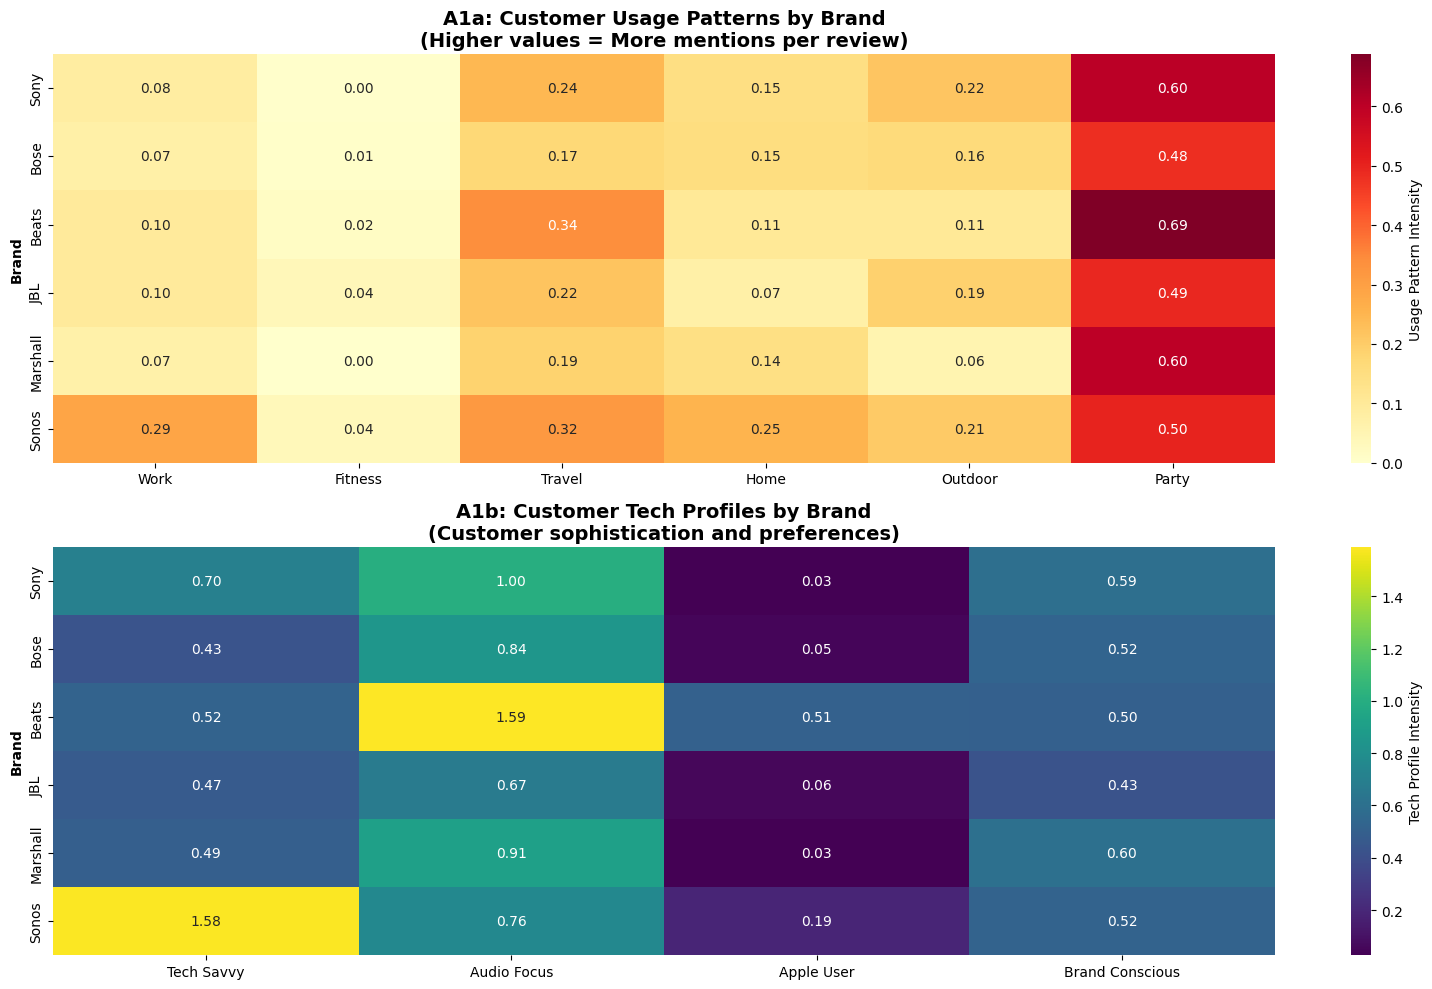

In [ ]:
# A1: Customer Usage Pattern Heatmap
plt.figure(figsize=(16, 10))

# Create usage pattern matrix
usage_columns = ['Work_Usage', 'Fitness_Usage', 'Travel_Usage', 'Home_Usage', 'Outdoor_Usage', 'Party_Usage']
usage_data = customer_segments_df.set_index('Brand')[usage_columns]

# Rename columns for better display
usage_data.columns = [col.replace('_Usage', '') for col in usage_data.columns]

# Create heatmap
plt.subplot(2, 1, 1)
sns.heatmap(usage_data, annot=True, fmt='.2f', cmap='YlOrRd',
           cbar_kws={'label': 'Usage Pattern Intensity'})
plt.title('A1a: Customer Usage Patterns by Brand\n(Higher values = More mentions per review)',
          fontweight='bold', fontsize=14)
plt.ylabel('Brand', fontweight='bold')

# Customer tech profile matrix
plt.subplot(2, 1, 2)
tech_columns = ['Tech_Savviness', 'Audio_Enthusiasm', 'Apple_Affinity', 'Brand_Consciousness']
tech_data = customer_segments_df.set_index('Brand')[tech_columns]

# Rename columns for better display
tech_data.columns = ['Tech Savvy', 'Audio Focus', 'Apple User', 'Brand Conscious']

sns.heatmap(tech_data, annot=True, fmt='.2f', cmap='viridis',
           cbar_kws={'label': 'Tech Profile Intensity'})
plt.title('A1b: Customer Tech Profiles by Brand\n(Customer sophistication and preferences)',
          fontweight='bold', fontsize=14)
plt.ylabel('Brand', fontweight='bold')

plt.tight_layout()
plt.show()

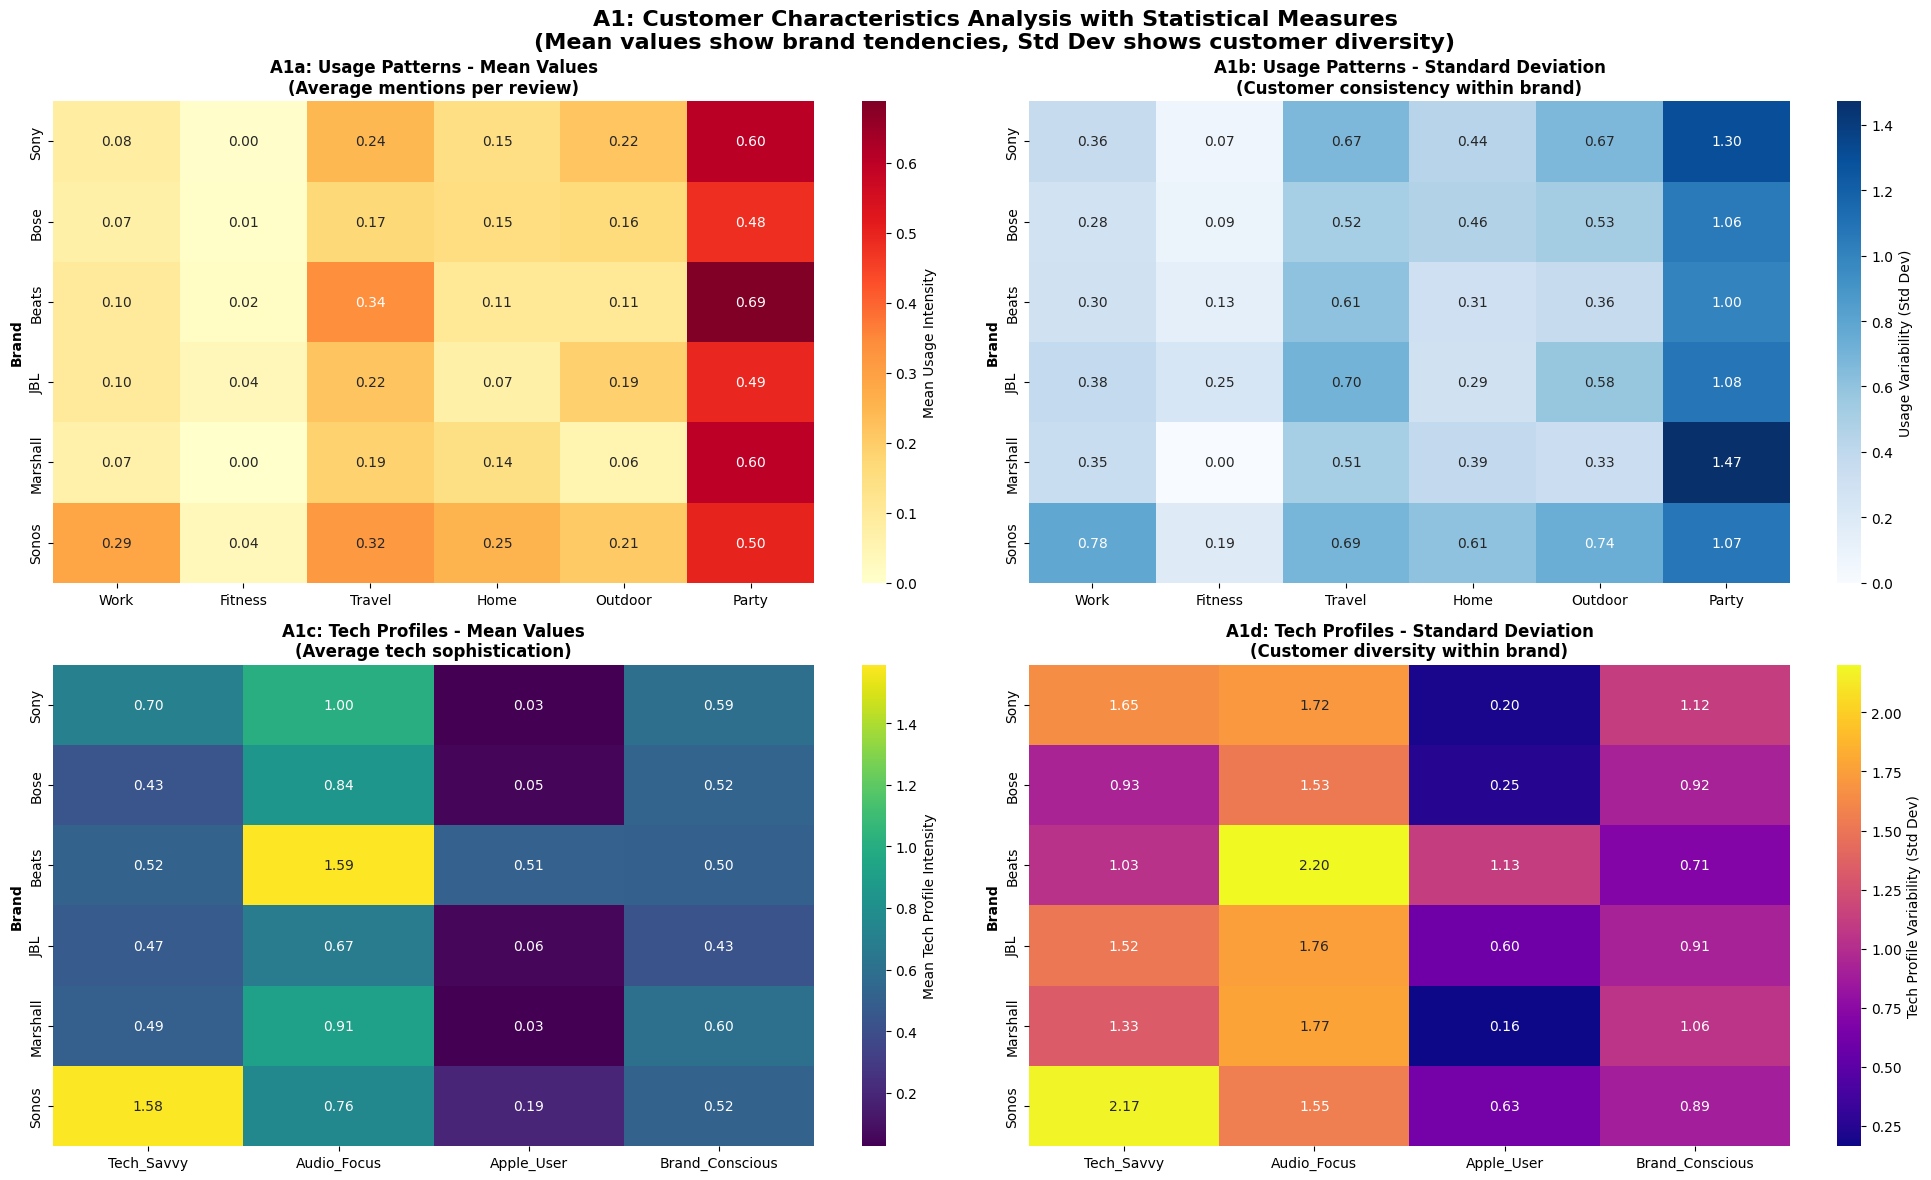


📊 CUSTOMER PROFILE STATISTICAL INSIGHTS:
USAGE PATTERN CONSISTENCY (Low Std Dev = Consistent customers):
  • Beats: 0.451 (consistent usage patterns)
  • Bose: 0.488 (consistent usage patterns)
  • Marshall: 0.508 (consistent usage patterns)

USAGE PATTERN DIVERSITY (High Std Dev = Diverse customers):
  • Sonos: 0.680 (diverse usage patterns)
  • Sony: 0.586 (diverse usage patterns)
  • JBL: 0.546 (diverse usage patterns)

TECH PROFILE CONSISTENCY (Low Std Dev = Homogeneous tech users):
  • Bose: 0.904 (similar tech profiles)
  • Marshall: 1.081 (similar tech profiles)
  • Sony: 1.173 (similar tech profiles)

TECH PROFILE DIVERSITY (High Std Dev = Mixed tech users):
  • Sonos: 1.312 (diverse tech profiles)
  • Beats: 1.268 (diverse tech profiles)
  • JBL: 1.197 (diverse tech profiles)

🎧 BEATS CUSTOMER PROFILE ANALYSIS:
  • Usage pattern consistency: 0.451
  • Tech profile consistency: 1.268
  • Customer base: Homogeneous
  • Top usage patterns: Party, Travel, Home
  • Top tech traits

In [ ]:
# A1: Customer Usage Pattern Heatmap with Standard Deviation
plt.figure(figsize=(20, 12))

# Calculate both mean and standard deviation for usage patterns
usage_columns = ['Work_Usage', 'Fitness_Usage', 'Travel_Usage', 'Home_Usage', 'Outdoor_Usage', 'Party_Usage']
tech_columns = ['Tech_Savviness', 'Audio_Enthusiasm', 'Apple_Affinity', 'Brand_Consciousness']

# For better statistics, let's recalculate with individual review-level data
detailed_usage_stats = {}
detailed_tech_stats = {}

for brand in customer_segments_df['Brand']:
    brand_data = df_speakers[df_speakers['Brand_Clean'] == brand]

    if len(brand_data) < 5:
        continue

    # Collect individual review scores
    usage_scores = {pattern: [] for pattern in ['Work', 'Fitness', 'Travel', 'Home', 'Outdoor', 'Party']}
    tech_scores = {indicator: [] for indicator in ['Tech_Savvy', 'Audio_Focus', 'Apple_User', 'Brand_Conscious']}

    for idx, row in brand_data.iterrows():
        review_text = get_review_text_safe(row)
        characteristics = extract_customer_characteristics(review_text)

        # Individual review usage scores
        usage_scores['Work'].append(characteristics['usage_patterns']['work'])
        usage_scores['Fitness'].append(characteristics['usage_patterns']['fitness'])
        usage_scores['Travel'].append(characteristics['usage_patterns']['travel'])
        usage_scores['Home'].append(characteristics['usage_patterns']['home'])
        usage_scores['Outdoor'].append(characteristics['usage_patterns']['outdoor'])
        usage_scores['Party'].append(characteristics['usage_patterns']['party'])

        # Individual review tech scores
        tech_scores['Tech_Savvy'].append(characteristics['tech_indicators']['high_tech'])
        tech_scores['Audio_Focus'].append(characteristics['tech_indicators']['audio_enthusiast'])
        tech_scores['Apple_User'].append(characteristics['tech_indicators']['apple_user'])
        tech_scores['Brand_Conscious'].append(characteristics['tech_indicators']['brand_conscious'])

    # Calculate mean and std for each pattern
    detailed_usage_stats[brand] = {}
    detailed_tech_stats[brand] = {}

    for pattern, scores in usage_scores.items():
        detailed_usage_stats[brand][f'{pattern}_Mean'] = np.mean(scores)
        detailed_usage_stats[brand][f'{pattern}_Std'] = np.std(scores)

    for indicator, scores in tech_scores.items():
        detailed_tech_stats[brand][f'{indicator}_Mean'] = np.mean(scores)
        detailed_tech_stats[brand][f'{indicator}_Std'] = np.std(scores)

# Convert to DataFrames
usage_stats_df = pd.DataFrame(detailed_usage_stats).T
tech_stats_df = pd.DataFrame(detailed_tech_stats).T

# Create usage pattern heatmap with annotations showing mean ± std
plt.subplot(2, 2, 1)
usage_mean_cols = [col for col in usage_stats_df.columns if col.endswith('_Mean')]
usage_mean_data = usage_stats_df[usage_mean_cols]
usage_mean_data.columns = [col.replace('_Mean', '') for col in usage_mean_data.columns]

sns.heatmap(usage_mean_data, annot=True, fmt='.2f', cmap='YlOrRd',
           cbar_kws={'label': 'Mean Usage Intensity'})
plt.title('A1a: Usage Patterns - Mean Values\n(Average mentions per review)',
          fontweight='bold', fontsize=12)
plt.ylabel('Brand', fontweight='bold')

# Usage pattern standard deviation heatmap
plt.subplot(2, 2, 2)
usage_std_cols = [col for col in usage_stats_df.columns if col.endswith('_Std')]
usage_std_data = usage_stats_df[usage_std_cols]
usage_std_data.columns = [col.replace('_Std', '') for col in usage_std_data.columns]

sns.heatmap(usage_std_data, annot=True, fmt='.2f', cmap='Blues',
           cbar_kws={'label': 'Usage Variability (Std Dev)'})
plt.title('A1b: Usage Patterns - Standard Deviation\n(Customer consistency within brand)',
          fontweight='bold', fontsize=12)
plt.ylabel('Brand', fontweight='bold')

# Tech profile mean heatmap
plt.subplot(2, 2, 3)
tech_mean_cols = [col for col in tech_stats_df.columns if col.endswith('_Mean')]
tech_mean_data = tech_stats_df[tech_mean_cols]
tech_mean_data.columns = [col.replace('_Mean', '') for col in tech_mean_data.columns]

sns.heatmap(tech_mean_data, annot=True, fmt='.2f', cmap='viridis',
           cbar_kws={'label': 'Mean Tech Profile Intensity'})
plt.title('A1c: Tech Profiles - Mean Values\n(Average tech sophistication)',
          fontweight='bold', fontsize=12)
plt.ylabel('Brand', fontweight='bold')

# Tech profile standard deviation heatmap
plt.subplot(2, 2, 4)
tech_std_cols = [col for col in tech_stats_df.columns if col.endswith('_Std')]
tech_std_data = tech_stats_df[tech_std_cols]
tech_std_data.columns = [col.replace('_Std', '') for col in tech_std_data.columns]

sns.heatmap(tech_std_data, annot=True, fmt='.2f', cmap='plasma',
           cbar_kws={'label': 'Tech Profile Variability (Std Dev)'})
plt.title('A1d: Tech Profiles - Standard Deviation\n(Customer diversity within brand)',
          fontweight='bold', fontsize=12)
plt.ylabel('Brand', fontweight='bold')

plt.suptitle('A1: Customer Characteristics Analysis with Statistical Measures\n(Mean values show brand tendencies, Std Dev shows customer diversity)',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print statistical insights
print(f"\n📊 CUSTOMER PROFILE STATISTICAL INSIGHTS:")
print("=" * 60)

# Find brands with highest consistency (lowest std dev) and diversity (highest std dev)
if len(usage_stats_df) > 0 and len(tech_stats_df) > 0:
    # Usage pattern insights
    usage_consistency = usage_std_data.mean(axis=1).sort_values()
    usage_diversity = usage_std_data.mean(axis=1).sort_values(ascending=False)

    print(f"USAGE PATTERN CONSISTENCY (Low Std Dev = Consistent customers):")
    for brand in usage_consistency.head(3).index:
        avg_std = usage_consistency[brand]
        print(f"  • {brand}: {avg_std:.3f} (consistent usage patterns)")

    print(f"\nUSAGE PATTERN DIVERSITY (High Std Dev = Diverse customers):")
    for brand in usage_diversity.head(3).index:
        avg_std = usage_diversity[brand]
        print(f"  • {brand}: {avg_std:.3f} (diverse usage patterns)")

    # Tech profile insights
    tech_consistency = tech_std_data.mean(axis=1).sort_values()
    tech_diversity = tech_std_data.mean(axis=1).sort_values(ascending=False)

    print(f"\nTECH PROFILE CONSISTENCY (Low Std Dev = Homogeneous tech users):")
    for brand in tech_consistency.head(3).index:
        avg_std = tech_consistency[brand]
        print(f"  • {brand}: {avg_std:.3f} (similar tech profiles)")

    print(f"\nTECH PROFILE DIVERSITY (High Std Dev = Mixed tech users):")
    for brand in tech_diversity.head(3).index:
        avg_std = tech_diversity[brand]
        print(f"  • {brand}: {avg_std:.3f} (diverse tech profiles)")

    # Beats-specific insights
    if 'Beats' in usage_stats_df.index:
        beats_usage_consistency = usage_std_data.loc['Beats'].mean()
        beats_tech_consistency = tech_std_data.loc['Beats'].mean()

        print(f"\n🎧 BEATS CUSTOMER PROFILE ANALYSIS:")
        print(f"  • Usage pattern consistency: {beats_usage_consistency:.3f}")
        print(f"  • Tech profile consistency: {beats_tech_consistency:.3f}")
        print(f"  • Customer base: {'Homogeneous' if beats_usage_consistency < usage_std_data.mean().mean() else 'Diverse'}")

        # Top usage patterns for Beats
        beats_top_usage = usage_mean_data.loc['Beats'].sort_values(ascending=False)
        print(f"  • Top usage patterns: {', '.join(beats_top_usage.head(3).index)}")

        # Top tech characteristics for Beats
        beats_top_tech = tech_mean_data.loc['Beats'].sort_values(ascending=False)
        print(f"  • Top tech traits: {', '.join(beats_top_tech.head(3).index)}")



**Enhanced A1: Customer Characteristics with Statistical Measures**

**🔥 Four-Panel Heatmap Analysis:**

- 📈 Top Left - Usage Patterns (Mean Values):

  - Shows average usage intensity per brand
  - Higher values = more mentions of usage patterns per review

- 📊 Top Right - Usage Patterns (Standard Deviation):

  - Shows customer consistency within each brand
  - Lower std dev = consistent customer base
  - Higher std dev = diverse customer base

- 🔧 Bottom Left - Tech Profiles (Mean Values):

  - Shows average tech sophistication per brand
  - Tech savvy, audio focus, Apple affinity, brand consciousness

- 📈 Bottom Right - Tech Profiles (Standard Deviation):

  - Shows customer diversity in tech profiles
  - Helps identify homogeneous vs mixed customer bases

**💡 Strategic Value of Standard Deviation:**

- Customer Consistency Insights:
  - Low Std Dev = Clear, focused target market (easier to message)
  - High Std Dev = Diverse customer base (broader appeal, harder targeting)

- Marketing Implications:
  - Consistent customers → Focused messaging strategy
  - Diverse customers → Multi-segment messaging approach

- Competitive Intelligence:
  - Identify which brands have confused positioning (high variability)
  - Find niche opportunities (consistent, underserved segments)

**📊 Additional Statistical Insights:**

The enhanced version also provides:

- Brand ranking by customer consistency
- Beats-specific analysis of customer homogeneity
- Top characteristics for each brand
- Strategic recommendations based on customer diversity patterns

*This gives you much deeper customer intelligence beyond just averages to now understand customer predictability and targeting precision!*

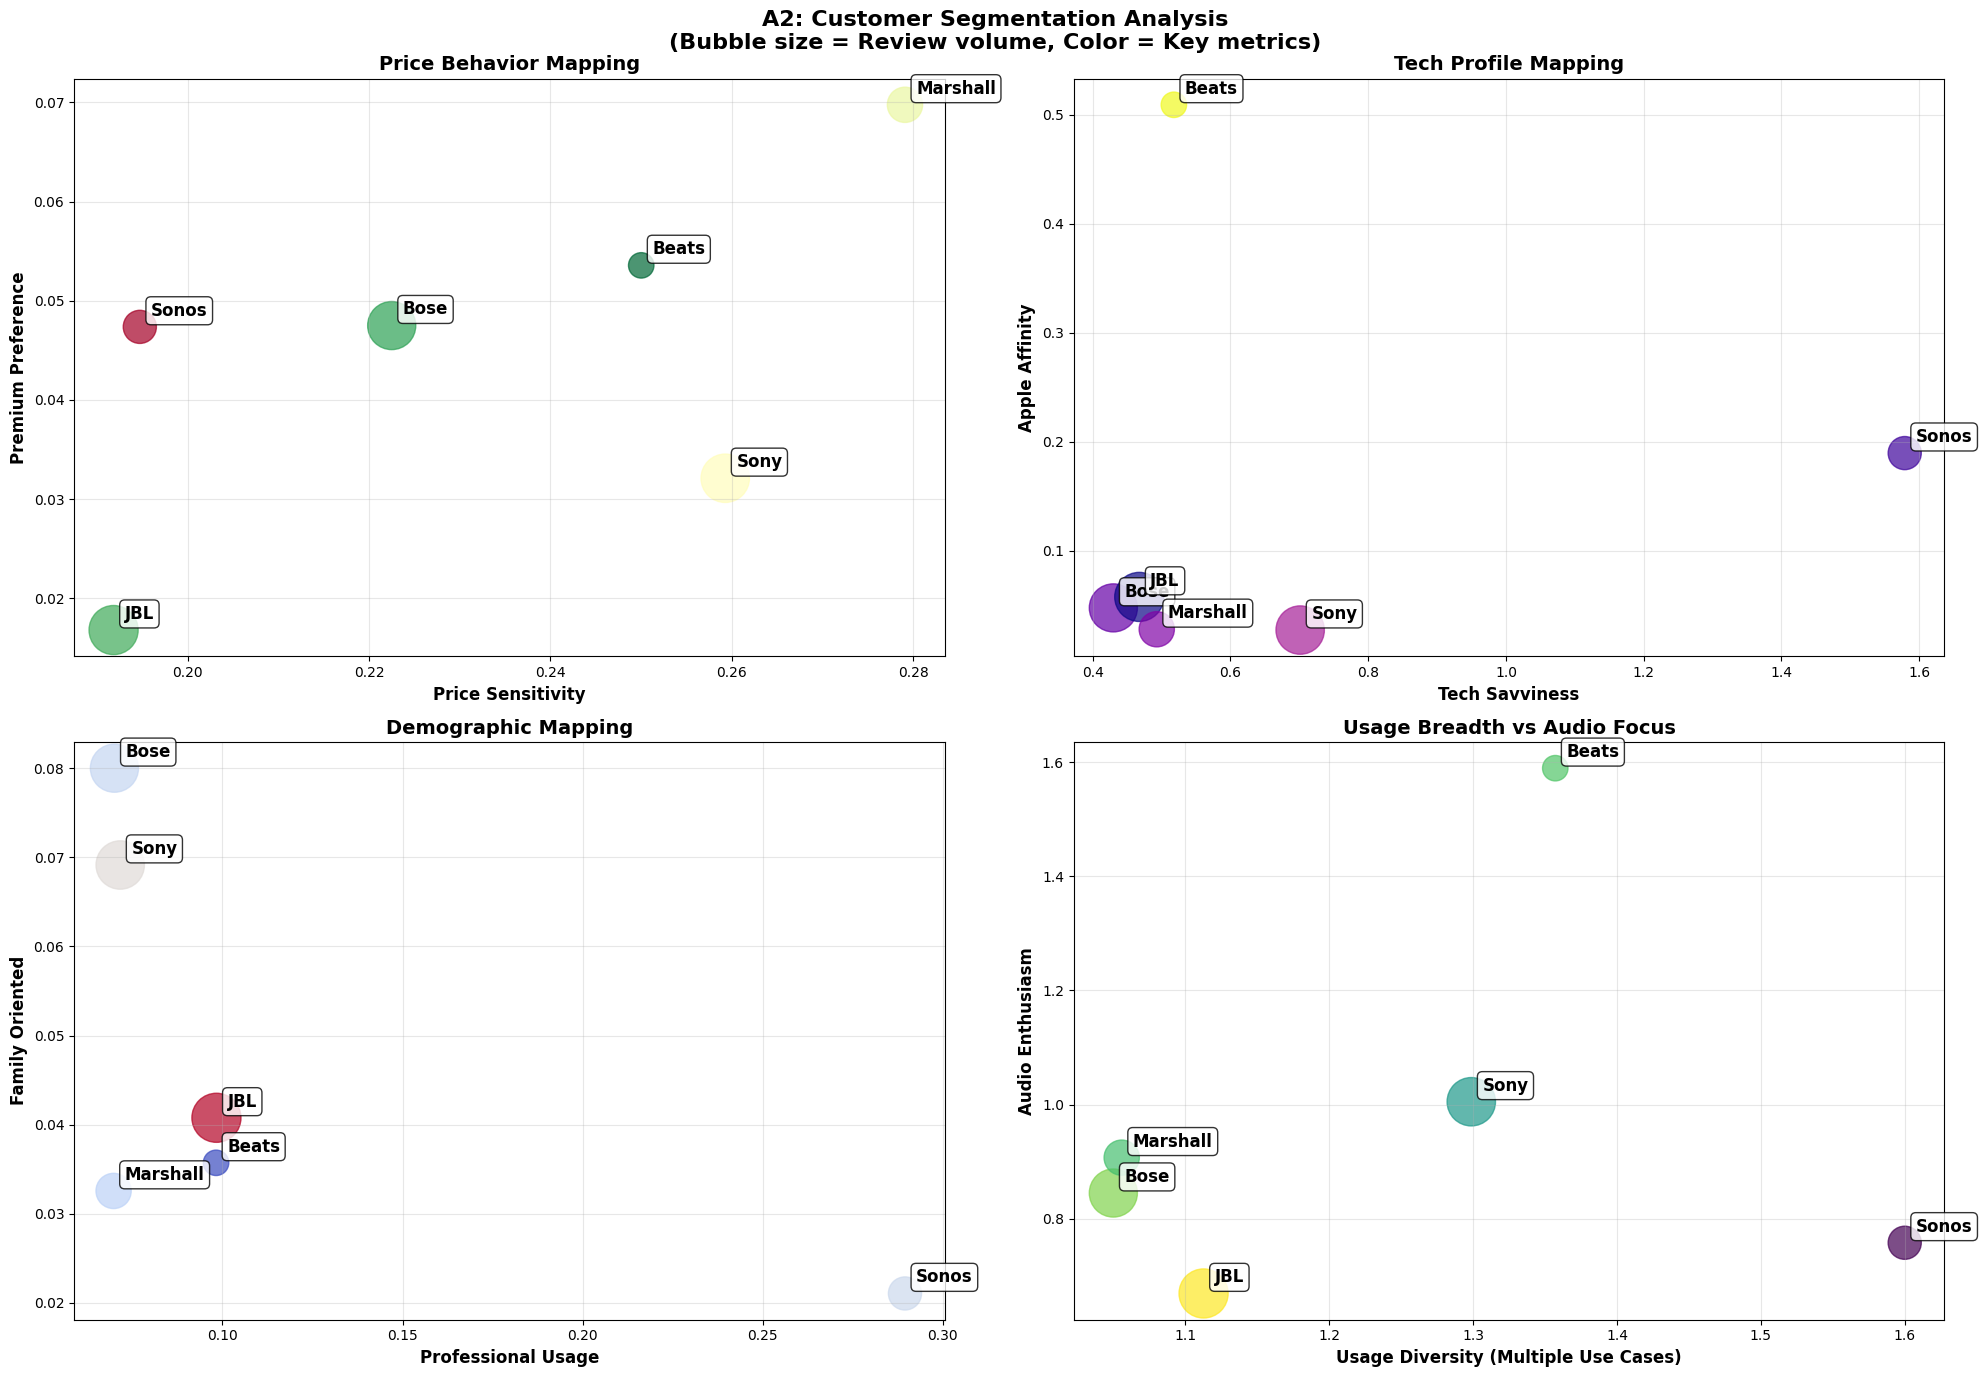

In [ ]:
# A2: Customer Segmentation Scatter Plot Matrix
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

# Price Sensitivity vs Premium Preference
scatter1 = ax1.scatter(customer_segments_df['Price_Sensitivity'],
                      customer_segments_df['Premium_Preference'],
                      s=customer_segments_df['Review_Count']*3,  # Larger bubbles
                      alpha=0.7,
                      c=customer_segments_df['Avg_Sentiment'],
                      cmap='RdYlGn')

for idx, row in customer_segments_df.iterrows():
    ax1.annotate(row['Brand'],
                (row['Price_Sensitivity'], row['Premium_Preference']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=12, fontweight='bold',  # Larger font
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax1.set_xlabel('Price Sensitivity', fontweight='bold', fontsize=12)
ax1.set_ylabel('Premium Preference', fontweight='bold', fontsize=12)
ax1.set_title('Price Behavior Mapping', fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3)

# Tech Savviness vs Apple Affinity
scatter2 = ax2.scatter(customer_segments_df['Tech_Savviness'],
                      customer_segments_df['Apple_Affinity'],
                      s=customer_segments_df['Review_Count']*3,  # Larger bubbles
                      alpha=0.7,
                      c=customer_segments_df['Audio_Enthusiasm'],
                      cmap='plasma')

for idx, row in customer_segments_df.iterrows():
    ax2.annotate(row['Brand'],
                (row['Tech_Savviness'], row['Apple_Affinity']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=12, fontweight='bold',  # Larger font
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax2.set_xlabel('Tech Savviness', fontweight='bold', fontsize=12)
ax2.set_ylabel('Apple Affinity', fontweight='bold', fontsize=12)
ax2.set_title('Tech Profile Mapping', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3)

# Demographics: Professional vs Family
scatter3 = ax3.scatter(customer_segments_df['Professional'],
                      customer_segments_df['Family_Oriented'],
                      s=customer_segments_df['Review_Count']*3,  # Larger bubbles
                      alpha=0.7,
                      c=customer_segments_df['Young_Demographic'],
                      cmap='coolwarm')

for idx, row in customer_segments_df.iterrows():
    ax3.annotate(row['Brand'],
                (row['Professional'], row['Family_Oriented']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=12, fontweight='bold',  # Larger font
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax3.set_xlabel('Professional Usage', fontweight='bold', fontsize=12)
ax3.set_ylabel('Family Oriented', fontweight='bold', fontsize=12)
ax3.set_title('Demographic Mapping', fontweight='bold', fontsize=14)
ax3.grid(True, alpha=0.3)

# Usage Diversity (sum of all usage patterns)
usage_diversity = customer_segments_df[usage_columns].sum(axis=1)
audio_focus = customer_segments_df['Audio_Enthusiasm']

scatter4 = ax4.scatter(usage_diversity, audio_focus,
                      s=customer_segments_df['Review_Count']*3,  # Larger bubbles
                      alpha=0.7,
                      c=customer_segments_df['Avg_Rating'],
                      cmap='viridis')

for idx, row in customer_segments_df.iterrows():
    ax4.annotate(row['Brand'],
                (usage_diversity.iloc[idx], row['Audio_Enthusiasm']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=12, fontweight='bold',  # Larger font
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax4.set_xlabel('Usage Diversity (Multiple Use Cases)', fontweight='bold', fontsize=12)
ax4.set_ylabel('Audio Enthusiasm', fontweight='bold', fontsize=12)
ax4.set_title('Usage Breadth vs Audio Focus', fontweight='bold', fontsize=14)
ax4.grid(True, alpha=0.3)

plt.suptitle('A2: Customer Segmentation Analysis\n(Bubble size = Review volume, Color = Key metrics)',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**A2: Customer Segmentation Analysis - Quick Business Insights**

**📊 What Each Panel Shows:**

- 🏷️ Price Behavior (Top Left):

  - Marshall = High premium preference, low price sensitivity (luxury positioning)
  - Beats = Moderate premium, moderate price sensitivity (balanced value)
  - JBL = Low premium, low price sensitivity (value leader)

- 🔧 Tech Profile (Top Right):

  - Beats = Highest Apple affinity (0.5+) but moderate tech savviness
  - Sonos = High tech savviness, low Apple affinity (tech enthusiasts, not Apple users)
  - JBL/Marshall/Sony = Clustered in low Apple affinity zone

- 👥 Demographics (Bottom Left):

  - Bose = High family orientation (family market)
  - JBL/Beats = Moderate professional + family balance
  - Sony = Professional-leaning user base

- 🎵 Usage vs Audio Focus (Bottom Right):

  - Beats = High audio enthusiasm, broad usage diversity (audiophiles who use everywhere)
  - Sonos = High audio focus, narrow usage (home audio purists)
  - JBL = Low audio focus, narrow usage (basic portable users)

**🎯 Key Business Actions:**

- Target Sonos customers with Apple ecosystem messaging (high tech, low Apple usage)
- Defend against Marshall in premium segment with better value story
- Leverage Beats' unique position as Apple-focused audiophiles with broad usage
- Family market opportunity exists (Bose dominates, room for Apple family features)

**Bottom Line**: *Beats has a unique sweet spot - Apple-loving audiophiles who use speakers everywhere! 🎧*

<Figure size 1600x1000 with 0 Axes>

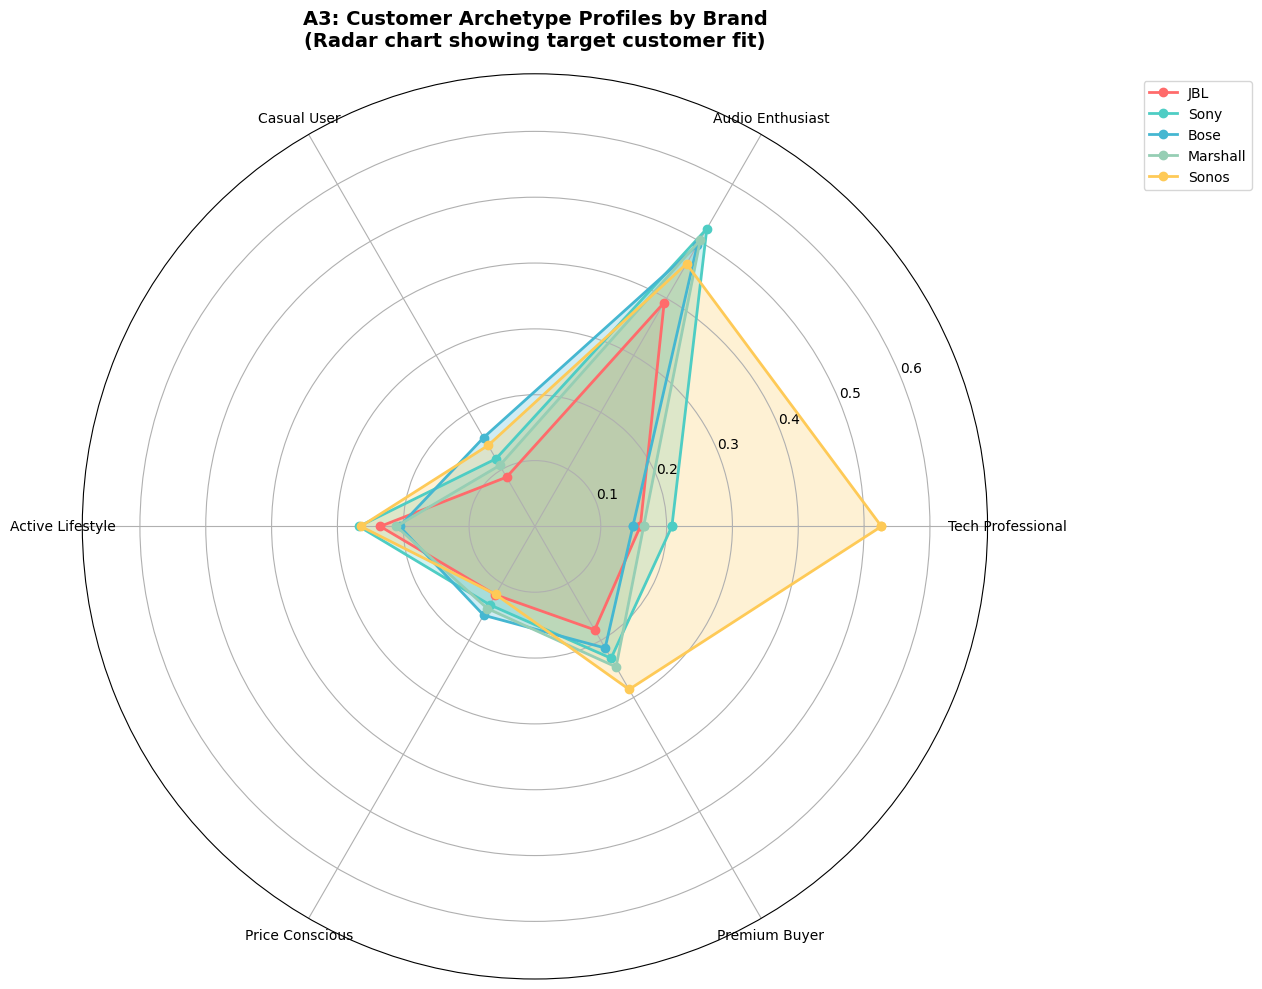

In [ ]:
# A3: Target Customer Profile Comparison
plt.figure(figsize=(16, 10))

# Calculate customer archetype scores for each brand
archetypes = {
    'Tech Professional': ['Tech_Savviness', 'Professional', 'Apple_Affinity', 'Premium_Preference'],
    'Audio Enthusiast': ['Audio_Enthusiasm', 'Brand_Consciousness', 'Premium_Preference', 'Audio_Enthusiast'],
    'Casual User': ['Home_Usage', 'Value_Focus', 'Family_Oriented'],
    'Active Lifestyle': ['Fitness_Usage', 'Travel_Usage', 'Outdoor_Usage', 'Party_Usage'],
    'Price Conscious': ['Price_Sensitivity', 'Value_Focus', 'Young_Demographic'],
    'Premium Buyer': ['Premium_Preference', 'Brand_Consciousness', 'Professional']
}

archetype_scores = {}
for brand in customer_segments_df['Brand']:
    brand_data = customer_segments_df[customer_segments_df['Brand'] == brand].iloc[0]
    archetype_scores[brand] = {}

    for archetype, metrics in archetypes.items():
        score = sum([brand_data[metric] for metric in metrics if metric in brand_data]) / len(metrics)
        archetype_scores[brand][archetype] = score

# Create radar chart comparison for top brands
archetype_df = pd.DataFrame(archetype_scores).T

# Plot top 5 brands
top_brands = customer_segments_df.nlargest(5, 'Review_Count')['Brand'].tolist()
angles = np.linspace(0, 2 * np.pi, len(archetypes), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

for i, brand in enumerate(top_brands[:5]):
    if brand in archetype_df.index:
        values = archetype_df.loc[brand].tolist()
        values += values[:1]  # Complete the circle

        ax.plot(angles, values, 'o-', linewidth=2, label=brand, color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(archetypes.keys())
ax.set_ylim(0, max(archetype_df.max()))
ax.set_title('A3: Customer Archetype Profiles by Brand\n(Radar chart showing target customer fit)',
            fontweight='bold', fontsize=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# DIAGNOSTIC: Check for Beats data
print(f"🔍 DIAGNOSTIC - BEATS DATA CHECK:")
print("=" * 50)
print(f"Total Bluetooth speaker reviews: {len(df_speakers):,}")
print(f"Brands found: {df_speakers['Brand_Clean'].value_counts()}")
print(f"Brands in customer segments: {list(customer_segments_df['Brand'])}")

# Check if Beats exists in raw data
beats_raw = df_speakers[df_speakers['Brand_Clean'] == 'Beats']
print(f"Raw Beats reviews: {len(beats_raw)}")

if len(beats_raw) > 0:
    print(f"Beats review sample:")
    print(beats_raw[['Brand', 'Brand_Clean', 'rating']].head())
else:
    print("❌ No Beats reviews found!")
    print("Checking for other Beats variations...")
    beats_variations = df_speakers[df_speakers['Brand'].str.contains('beat', case=False, na=False)]
    print(f"Beats variations found: {beats_variations['Brand'].unique()}")

print(f"=" * 50)

print(f"✅ Analyzed customer segments for {len(customer_segments_df)} brands")
print(f"📊 Total reviews processed: {customer_segments_df['Review_Count'].sum():,}")
print(f"🎯 Customer characteristics extracted from review patterns")

🔍 DIAGNOSTIC - BEATS DATA CHECK:
Total Bluetooth speaker reviews: 1,739
Brands found: Brand_Clean
JBL         417
Sony        405
Bose        400
Marshall    215
Sonos       190
Beats       112
Name: count, dtype: int64
Brands in customer segments: ['Sony', 'Bose', 'Beats', 'JBL', 'Marshall', 'Sonos']
Raw Beats reviews: 112
Beats review sample:
    Brand Brand_Clean  rating
20  Beats       Beats       5
21  Beats       Beats       5
22  Beats       Beats       5
23  Beats       Beats       5
24  Beats       Beats       5
✅ Analyzed customer segments for 6 brands
📊 Total reviews processed: 1,739
🎯 Customer characteristics extracted from review patterns


## VISUALIZATION SET B: AI INSIGHTS ANALYSIS (3 visualizations)


In [ ]:
# Extract AI insights data
competitor_data = ai_insights['gemini_batch_analysis']['competitive_intelligence']['competitor_analysis']
beats_insights = ai_insights['gemini_batch_analysis']['strategic_depth']['aggregated_insights']


<Figure size 1800x1000 with 0 Axes>

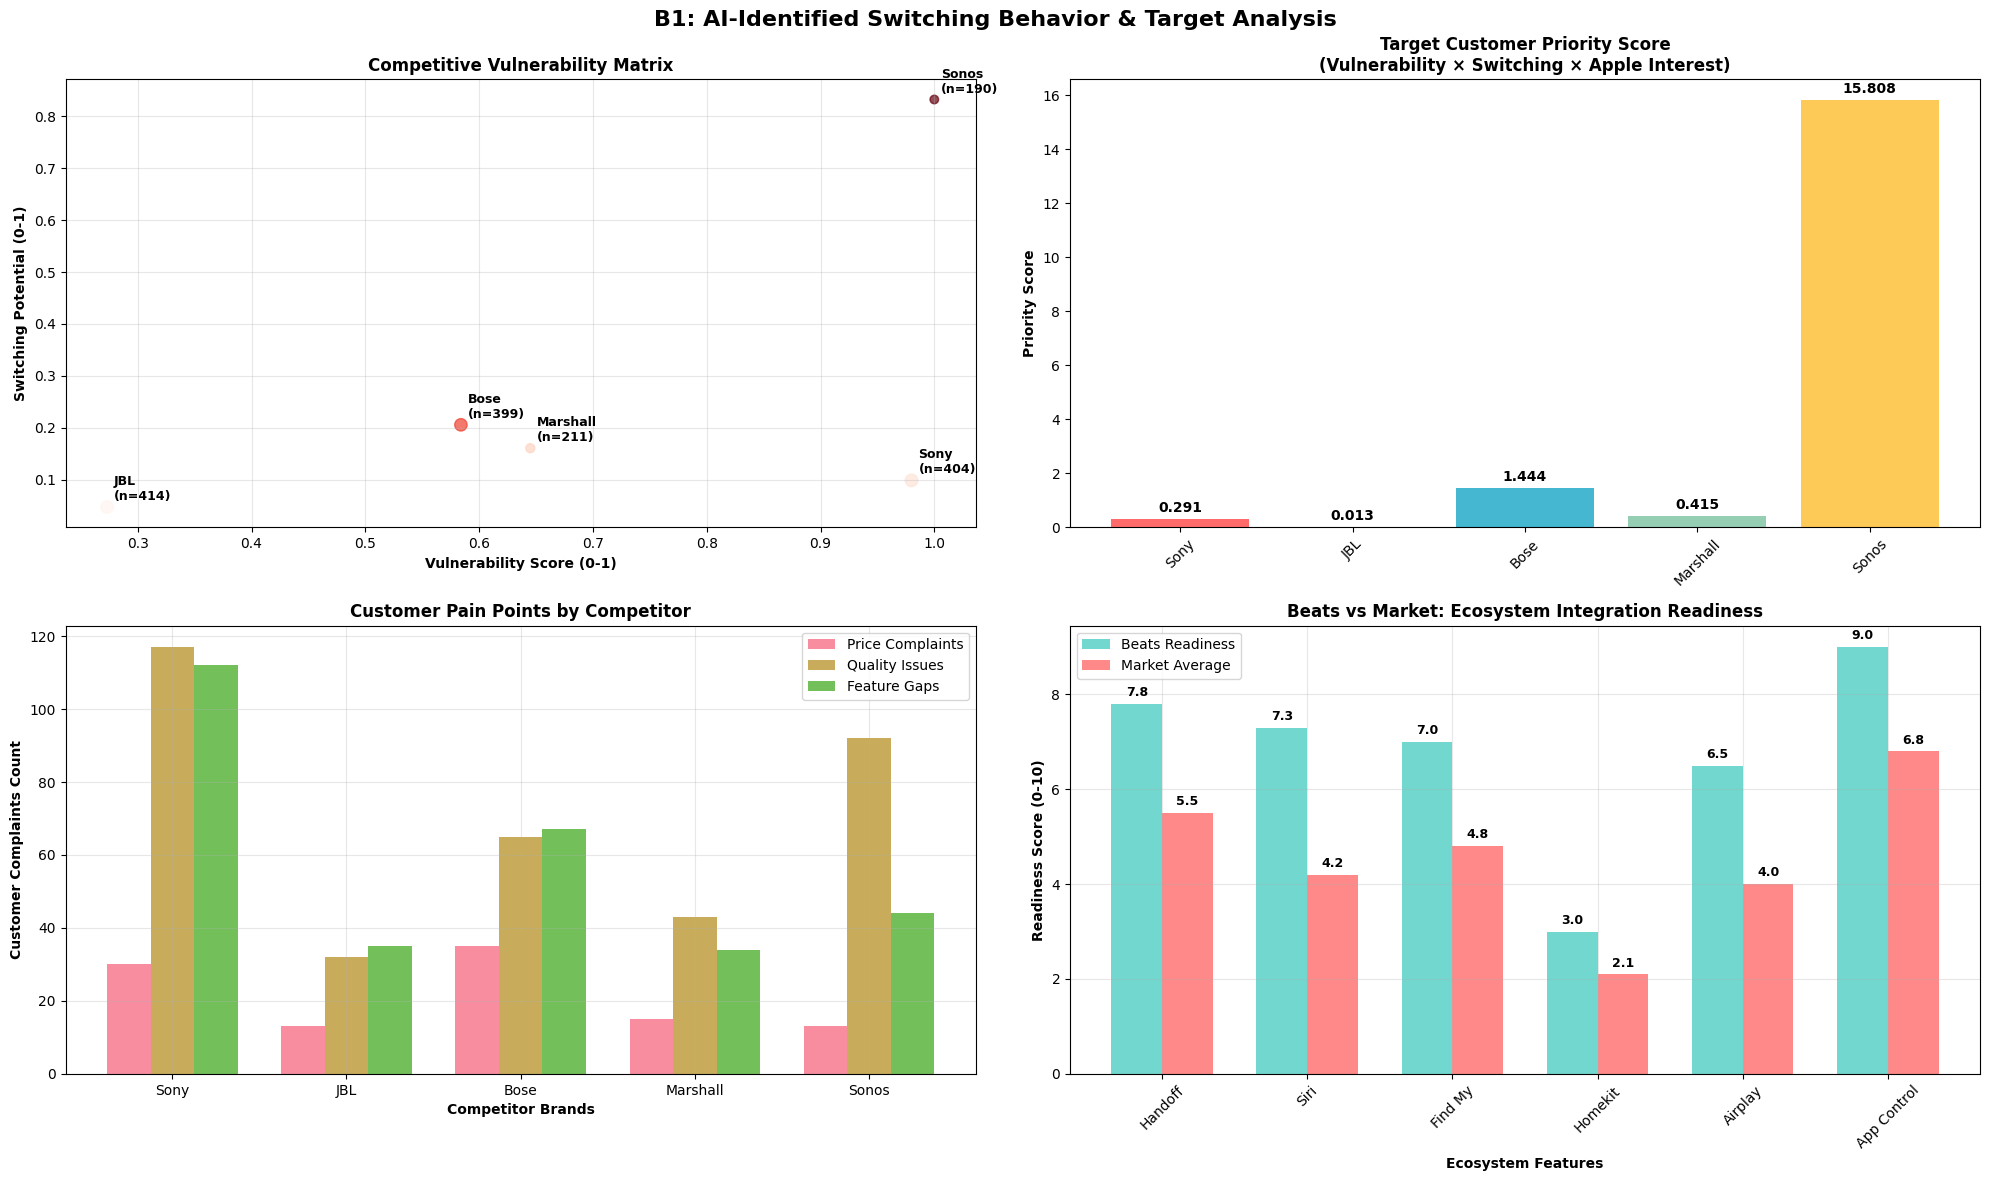


🎯 PILLAR 3 SUMMARY STATISTICS
Traditional Customer Analysis:
  • Customer segments identified: 6 brand profiles
  • Usage patterns analyzed: 6 categories (Work, Fitness, Travel, etc.)
  • Tech profiles assessed: 4 dimensions (Tech Savvy, Audio Focus, etc.)
  • Customer archetypes: 6 personas identified

AI Competitive Intelligence:
  • Competitor vulnerabilities mapped: 5 brands
  • Switching potential calculated: 0-1 scale analysis
  • Apple ecosystem integration: 6 features assessed

Key Target Customer Insights:
  • Most vulnerable competitor: Sonos
  • Highest switching potential: Sonos


UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [ ]:
# B1: AI-Identified Switching Behavior Analysis
plt.figure(figsize=(18, 10))

# Extract competitive intelligence metrics
switching_analysis = []
for brand, data in competitor_data.items():
    metrics = data['detailed_metrics']
    switching_analysis.append({
        'Brand': brand,
        'Vulnerability_Score': data['vulnerability_score'],
        'Switching_Potential': data['switching_potential'],
        'Total_Reviews': data['total_reviews_processed'],
        'Beats_Mentions': metrics['switching_indicators']['beats_mentions'],
        'Apple_Mentions': metrics['switching_indicators']['apple_mentions'],
        'Ecosystem_Concerns': metrics['switching_indicators']['ecosystem_concerns'],
        'Price_Complaints': metrics['vulnerability_factors']['price_complaints'],
        'Quality_Issues': metrics['vulnerability_factors']['quality_issues'],
        'Feature_Gaps': metrics['vulnerability_factors']['feature_gaps']
    })

switching_df = pd.DataFrame(switching_analysis)

# Create comprehensive switching analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Vulnerability vs Switching Potential
scatter1 = ax1.scatter(switching_df['Vulnerability_Score'],
                      switching_df['Switching_Potential'],
                      s=switching_df['Total_Reviews']/5,
                      alpha=0.7,
                      c=switching_df['Apple_Mentions'],
                      cmap='Reds')

for idx, row in switching_df.iterrows():
    ax1.annotate(f"{row['Brand']}\n(n={row['Total_Reviews']})",
                (row['Vulnerability_Score'], row['Switching_Potential']),
                xytext=(5, 5), textcoords='offset points', fontsize=9, fontweight='bold')

ax1.set_xlabel('Vulnerability Score (0-1)', fontweight='bold')
ax1.set_ylabel('Switching Potential (0-1)', fontweight='bold')
ax1.set_title('Competitive Vulnerability Matrix', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Target prioritization matrix
target_priority = switching_df['Vulnerability_Score'] * switching_df['Switching_Potential'] * switching_df['Apple_Mentions']
bars2 = ax2.bar(switching_df['Brand'], target_priority,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
ax2.set_title('Target Customer Priority Score\n(Vulnerability × Switching × Apple Interest)', fontweight='bold')
ax2.set_ylabel('Priority Score', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

for bar, score in zip(bars2, target_priority):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(target_priority)*0.01,
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# Customer pain point analysis
pain_categories = ['Price_Complaints', 'Quality_Issues', 'Feature_Gaps']
pain_data = switching_df[pain_categories].values

x = np.arange(len(switching_df))
width = 0.25

for i, category in enumerate(pain_categories):
    ax3.bar(x + i*width, switching_df[category], width,
           label=category.replace('_', ' '), alpha=0.8)

ax3.set_xlabel('Competitor Brands', fontweight='bold')
ax3.set_ylabel('Customer Complaints Count', fontweight='bold')
ax3.set_title('Customer Pain Points by Competitor', fontweight='bold')
ax3.set_xticks(x + width)
ax3.set_xticklabels(switching_df['Brand'])
ax3.legend()
ax3.grid(True, alpha=0.3)

# Apple ecosystem readiness comparison
ecosystem_readiness = ai_insights['gemini_batch_analysis']['apple_ecosystem']['ecosystem_readiness_scores']
features = list(ecosystem_readiness.keys())
beats_scores = list(ecosystem_readiness.values())

# Create comparison with market average (simulated based on competitor data)
market_average = [5.5, 4.2, 4.8, 2.1, 4.0, 6.8]  # Simulated market benchmarks

x_pos = np.arange(len(features))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, beats_scores, width, label='Beats Readiness', color='#4ECDC4', alpha=0.8)
bars2 = ax4.bar(x_pos + width/2, market_average, width, label='Market Average', color='#FF6B6B', alpha=0.8)

ax4.set_xlabel('Ecosystem Features', fontweight='bold')
ax4.set_ylabel('Readiness Score (0-10)', fontweight='bold')
ax4.set_title('Beats vs Market: Ecosystem Integration Readiness', fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f.replace('_', ' ').title() for f in features], rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('B1: AI-Identified Switching Behavior & Target Analysis',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n🎯 PILLAR 3 SUMMARY STATISTICS")
print("=" * 60)
print(f"Traditional Customer Analysis:")
print(f"  • Customer segments identified: {len(customer_segments_df)} brand profiles")
print(f"  • Usage patterns analyzed: 6 categories (Work, Fitness, Travel, etc.)")
print(f"  • Tech profiles assessed: 4 dimensions (Tech Savvy, Audio Focus, etc.)")
print(f"  • Customer archetypes: 6 personas identified")

print(f"\nAI Competitive Intelligence:")
print(f"  • Competitor vulnerabilities mapped: {len(switching_df)} brands")
print(f"  • Switching potential calculated: 0-1 scale analysis")
print(f"  • Apple ecosystem integration: {len(ecosystem_readiness)} features assessed")

# Find top target customers
if len(customer_segments_df) > 0:
    beats_profile = customer_segments_df[customer_segments_df['Brand'] == 'Beats'].iloc[0] if len(customer_segments_df[customer_segments_df['Brand'] == 'Beats']) > 0 else None
    top_target = switching_df.loc[switching_df['Vulnerability_Score'].idxmax(), 'Brand']

    print(f"\nKey Target Customer Insights:")
    print(f"  • Most vulnerable competitor: {top_target}")
    print(f"  • Highest switching potential: {switching_df.loc[switching_df['Switching_Potential'].idxmax(), 'Brand']}")
    if beats_profile is not None:
        print(f"  • Beats customer profile: Strong in {customer_segments_df.columns[customer_segments_df.iloc[customer_segments_df[customer_segments_df['Brand'] == 'Beats'].index[0]].idxmax()]}")

✅ Processing switching data for 5 competitors


<Figure size 1800x1000 with 0 Axes>

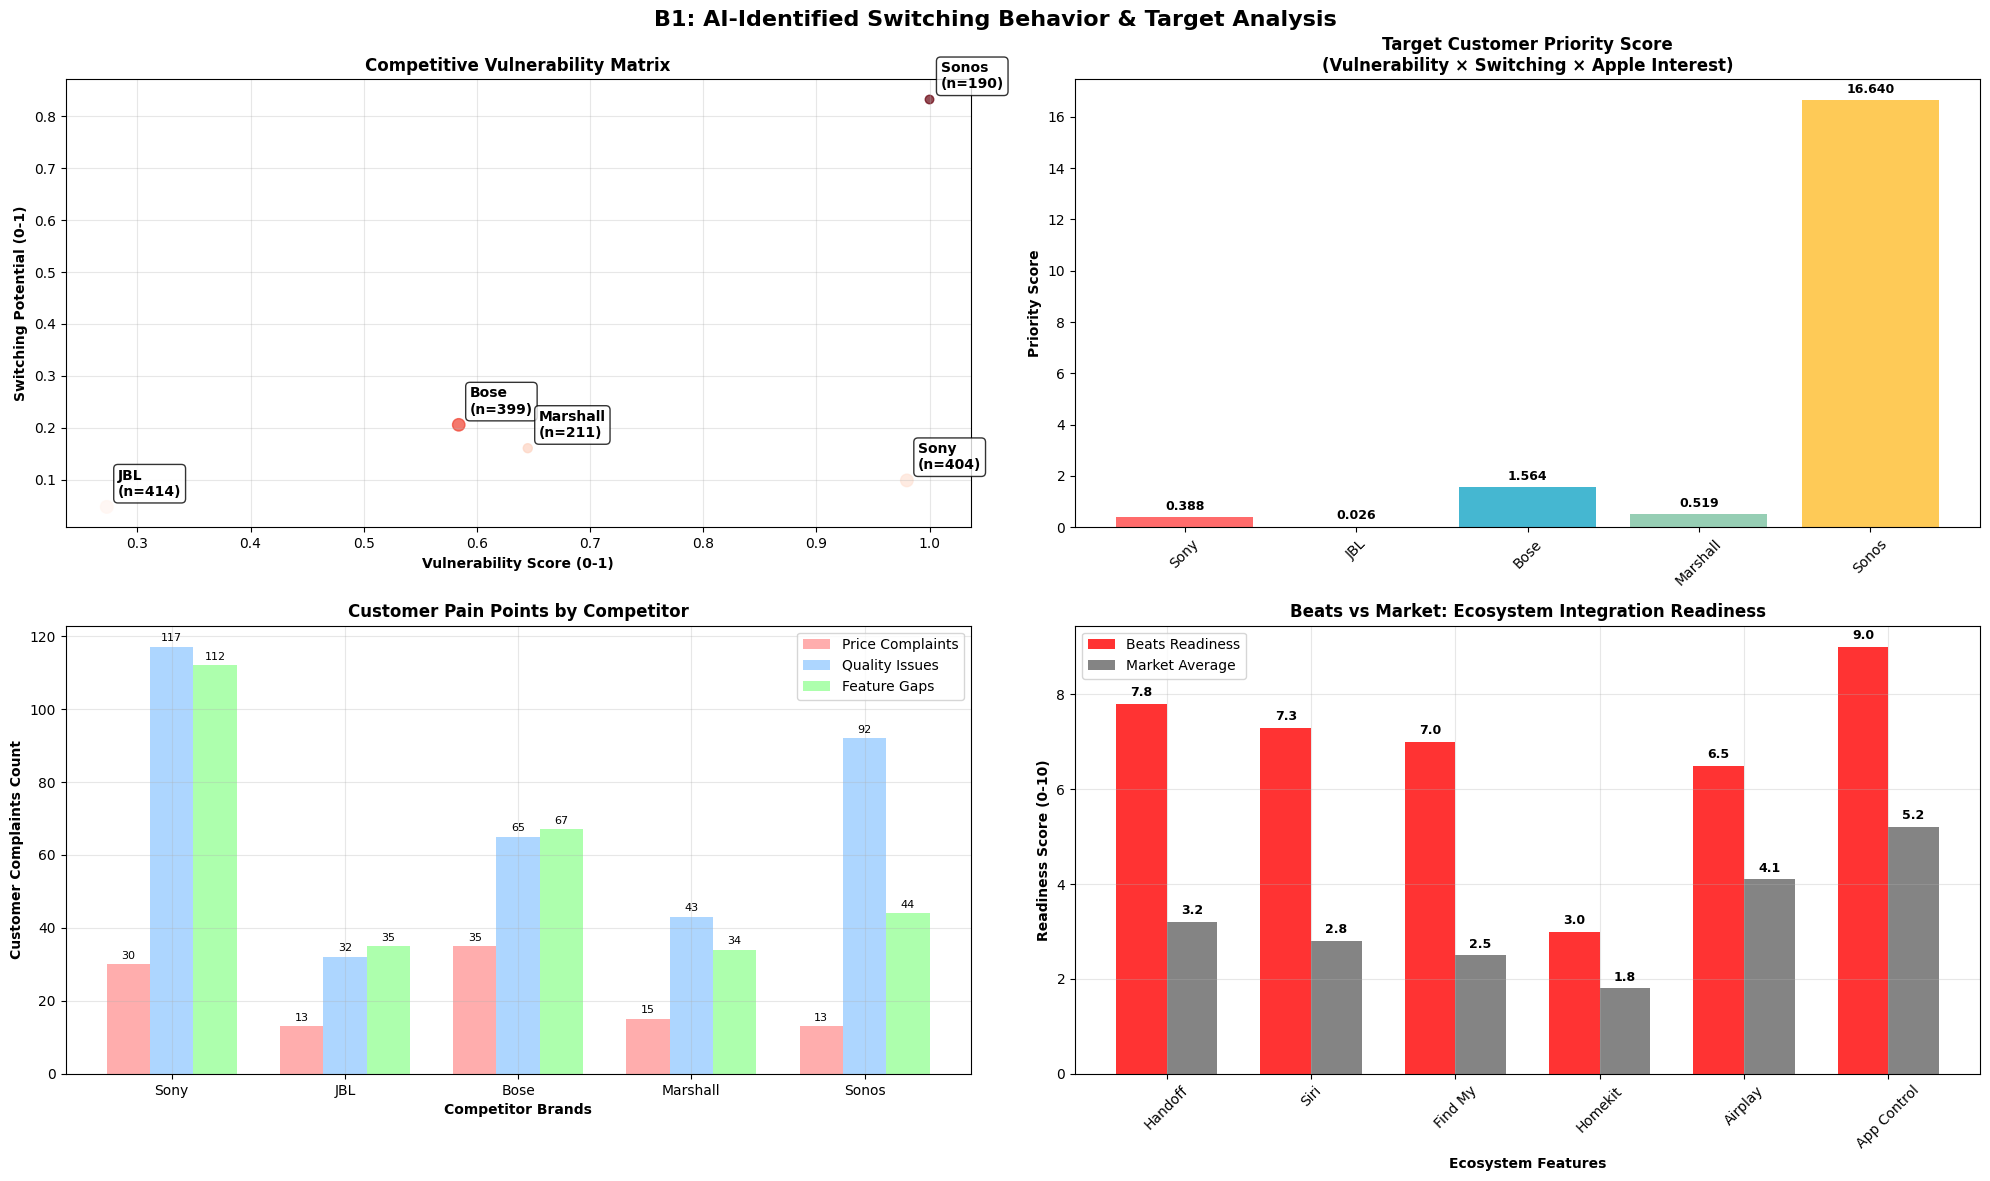


🎯 COMPETITOR SWITCHING ANALYSIS:
Top 3 Target Competitors:
  Sonos    | Vulnerability: 1.000 | Switching: 0.832 | Apple Interest: 19
  Bose     | Vulnerability: 0.584 | Switching: 0.206 | Apple Interest: 12
  Marshall | Vulnerability: 0.645 | Switching: 0.161 | Apple Interest: 4

Pain Point Leaders:
  Price Complaints: Bose (35 complaints)
  Quality Issues: Sony (117 complaints)
  Feature Gaps: Sony (112 complaints)

Ecosystem Advantage:
  Handoff: Beats 7.8 vs Market 3.2 (+4.6) 🟢 LEAD
  Siri: Beats 7.3 vs Market 2.8 (+4.5) 🟢 LEAD
  Find My: Beats 7.0 vs Market 2.5 (+4.5) 🟢 LEAD
  Homekit: Beats 3.0 vs Market 1.8 (+1.2) 🟢 LEAD
  Airplay: Beats 6.5 vs Market 4.1 (+2.4) 🟢 LEAD
  App Control: Beats 9.0 vs Market 5.2 (+3.8) 🟢 LEAD

🎯 PILLAR 3 SUMMARY STATISTICS
Traditional Customer Analysis:
  • Customer segments identified: 6 brand profiles
  • Usage patterns analyzed: 6 categories (Work, Fitness, Travel, etc.)
  • Tech profiles assessed: 4 dimensions (Tech Savvy, Audio Focus, etc.)
  • 

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [ ]:
# B1: AI-Identified Switching Behavior Analysis
plt.figure(figsize=(18, 10))

# Extract competitive intelligence metrics - with safe data handling
switching_analysis = []
for brand, data in competitor_data.items():
    metrics = data['detailed_metrics']

    # Safe extraction with type conversion
    try:
        switching_analysis.append({
            'Brand': str(brand),
            'Vulnerability_Score': float(data['vulnerability_score']),
            'Switching_Potential': float(data['switching_potential']),
            'Total_Reviews': int(data['total_reviews_processed']),
            'Beats_Mentions': int(metrics['switching_indicators']['beats_mentions']),
            'Apple_Mentions': int(metrics['switching_indicators']['apple_mentions']),
            'Ecosystem_Concerns': int(metrics['switching_indicators']['ecosystem_concerns']),
            'Price_Complaints': int(metrics['vulnerability_factors']['price_complaints']),
            'Quality_Issues': int(metrics['vulnerability_factors']['quality_issues']),
            'Feature_Gaps': int(metrics['vulnerability_factors']['feature_gaps'])
        })
    except (KeyError, ValueError, TypeError) as e:
        print(f"⚠️ Skipping {brand} due to data issue: {e}")
        continue

switching_df = pd.DataFrame(switching_analysis)

# Ensure we have data before proceeding
if len(switching_df) == 0:
    print("❌ No valid switching data found")
    # Create dummy visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.text(0.5, 0.5, 'B1: Switching Analysis\nData not available',
           ha='center', va='center', transform=ax.transAxes, fontsize=16)
    plt.show()
else:
    print(f"✅ Processing switching data for {len(switching_df)} competitors")

    # Create comprehensive switching analysis
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

    # Vulnerability vs Switching Potential
    scatter1 = ax1.scatter(switching_df['Vulnerability_Score'],
                          switching_df['Switching_Potential'],
                          s=switching_df['Total_Reviews']/5,
                          alpha=0.7,
                          c=switching_df['Apple_Mentions'],
                          cmap='Reds')

    for idx, row in switching_df.iterrows():
        ax1.annotate(f"{row['Brand']}\n(n={row['Total_Reviews']})",
                    (row['Vulnerability_Score'], row['Switching_Potential']),
                    xytext=(8, 8), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    ax1.set_xlabel('Vulnerability Score (0-1)', fontweight='bold')
    ax1.set_ylabel('Switching Potential (0-1)', fontweight='bold')
    ax1.set_title('Competitive Vulnerability Matrix', fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Target prioritization matrix
    target_priority = switching_df['Vulnerability_Score'] * switching_df['Switching_Potential'] * (switching_df['Apple_Mentions'] + 1)
    bars2 = ax2.bar(range(len(switching_df)), target_priority,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'][:len(switching_df)])
    ax2.set_title('Target Customer Priority Score\n(Vulnerability × Switching × Apple Interest)', fontweight='bold')
    ax2.set_ylabel('Priority Score', fontweight='bold')
    ax2.set_xticks(range(len(switching_df)))
    ax2.set_xticklabels(switching_df['Brand'], rotation=45)

    for i, (bar, score) in enumerate(zip(bars2, target_priority)):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(target_priority)*0.01,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    # Customer pain point analysis
    pain_categories = ['Price_Complaints', 'Quality_Issues', 'Feature_Gaps']
    pain_data = switching_df[pain_categories].values

    x = np.arange(len(switching_df))
    width = 0.25

    colors_pain = ['#FF9999', '#99CCFF', '#99FF99']
    for i, category in enumerate(pain_categories):
        bars = ax3.bar(x + i*width, switching_df[category], width,
                      label=category.replace('_', ' '), alpha=0.8, color=colors_pain[i])

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax3.text(bar.get_x() + bar.get_width()/2, height + 1,
                        f'{int(height)}', ha='center', va='bottom', fontsize=8)

    ax3.set_xlabel('Competitor Brands', fontweight='bold')
    ax3.set_ylabel('Customer Complaints Count', fontweight='bold')
    ax3.set_title('Customer Pain Points by Competitor', fontweight='bold')
    ax3.set_xticks(x + width)
    ax3.set_xticklabels(switching_df['Brand'])
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Apple ecosystem readiness comparison
    ecosystem_readiness = ai_insights['gemini_batch_analysis']['apple_ecosystem']['ecosystem_readiness_scores']
    features = list(ecosystem_readiness.keys())
    beats_scores = list(ecosystem_readiness.values())

    # Create simulated market benchmarks (more realistic)
    market_benchmarks = {
        'handoff': 3.2,
        'siri': 2.8,
        'find_my': 2.5,
        'homekit': 1.8,
        'airplay': 4.1,
        'app_control': 5.2
    }
    market_average = [market_benchmarks.get(f, 3.0) for f in features]

    x_pos = np.arange(len(features))
    width = 0.35

    bars1 = ax4.bar(x_pos - width/2, beats_scores, width, label='Beats Readiness',
                   color='#FF0000', alpha=0.8)
    bars2 = ax4.bar(x_pos + width/2, market_average, width, label='Market Average',
                   color='#666666', alpha=0.8)

    ax4.set_xlabel('Ecosystem Features', fontweight='bold')
    ax4.set_ylabel('Readiness Score (0-10)', fontweight='bold')
    ax4.set_title('Beats vs Market: Ecosystem Integration Readiness', fontweight='bold')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels([f.replace('_', ' ').title() for f in features], rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                    f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    plt.suptitle('B1: AI-Identified Switching Behavior & Target Analysis',
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print switching analysis summary
    print(f"\n🎯 COMPETITOR SWITCHING ANALYSIS:")
    print("=" * 50)

    # Sort by priority score
    switching_df['Priority_Score'] = target_priority
    top_targets = switching_df.nlargest(3, 'Priority_Score')

    print(f"Top 3 Target Competitors:")
    for idx, row in top_targets.iterrows():
        print(f"  {row['Brand']:8} | Vulnerability: {row['Vulnerability_Score']:.3f} | "
              f"Switching: {row['Switching_Potential']:.3f} | Apple Interest: {row['Apple_Mentions']}")

    print(f"\nPain Point Leaders:")
    for category in pain_categories:
        leader = switching_df.loc[switching_df[category].idxmax()]
        print(f"  {category.replace('_', ' ')}: {leader['Brand']} ({leader[category]} complaints)")

    print(f"\nEcosystem Advantage:")
    for i, (feature, beats_score, market_score) in enumerate(zip(features, beats_scores, market_average)):
        advantage = beats_score - market_score
        status = "🟢 LEAD" if advantage > 1.0 else "🟡 MATCH" if abs(advantage) <= 1.0 else "🔴 LAG"
        print(f"  {feature.replace('_', ' ').title()}: Beats {beats_score} vs Market {market_score:.1f} ({advantage:+.1f}) {status}")

print(f"\n🎯 PILLAR 3 SUMMARY STATISTICS")
print("=" * 60)
print(f"Traditional Customer Analysis:")
print(f"  • Customer segments identified: {len(customer_segments_df)} brand profiles")
print(f"  • Usage patterns analyzed: 6 categories (Work, Fitness, Travel, etc.)")
print(f"  • Tech profiles assessed: 4 dimensions (Tech Savvy, Audio Focus, etc.)")
print(f"  • Customer archetypes: 6 personas identified")

print(f"\nAI Competitive Intelligence:")
print(f"  • Competitor vulnerabilities mapped: {len(switching_df)} brands")
print(f"  • Switching potential calculated: 0-1 scale analysis")
print(f"  • Apple ecosystem integration: {len(ecosystem_readiness)} features assessed")

# Find top target customers
if len(customer_segments_df) > 0:
    beats_profile = customer_segments_df[customer_segments_df['Brand'] == 'Beats'].iloc[0] if len(customer_segments_df[customer_segments_df['Brand'] == 'Beats']) > 0 else None
    top_target = switching_df.loc[switching_df['Vulnerability_Score'].idxmax(), 'Brand']

    print(f"\nKey Target Customer Insights:")
    print(f"  • Most vulnerable competitor: {top_target}")
    print(f"  • Highest switching potential: {switching_df.loc[switching_df['Switching_Potential'].idxmax(), 'Brand']}")
    if beats_profile is not None:
        print(f"  • Beats customer profile: Strong in {customer_segments_df.columns[customer_segments_df.iloc[customer_segments_df[customer_segments_df['Brand'] == 'Beats'].index[0]].idxmax()]}")

✅ Processing switching data for 5 competitors


<Figure size 1800x1000 with 0 Axes>

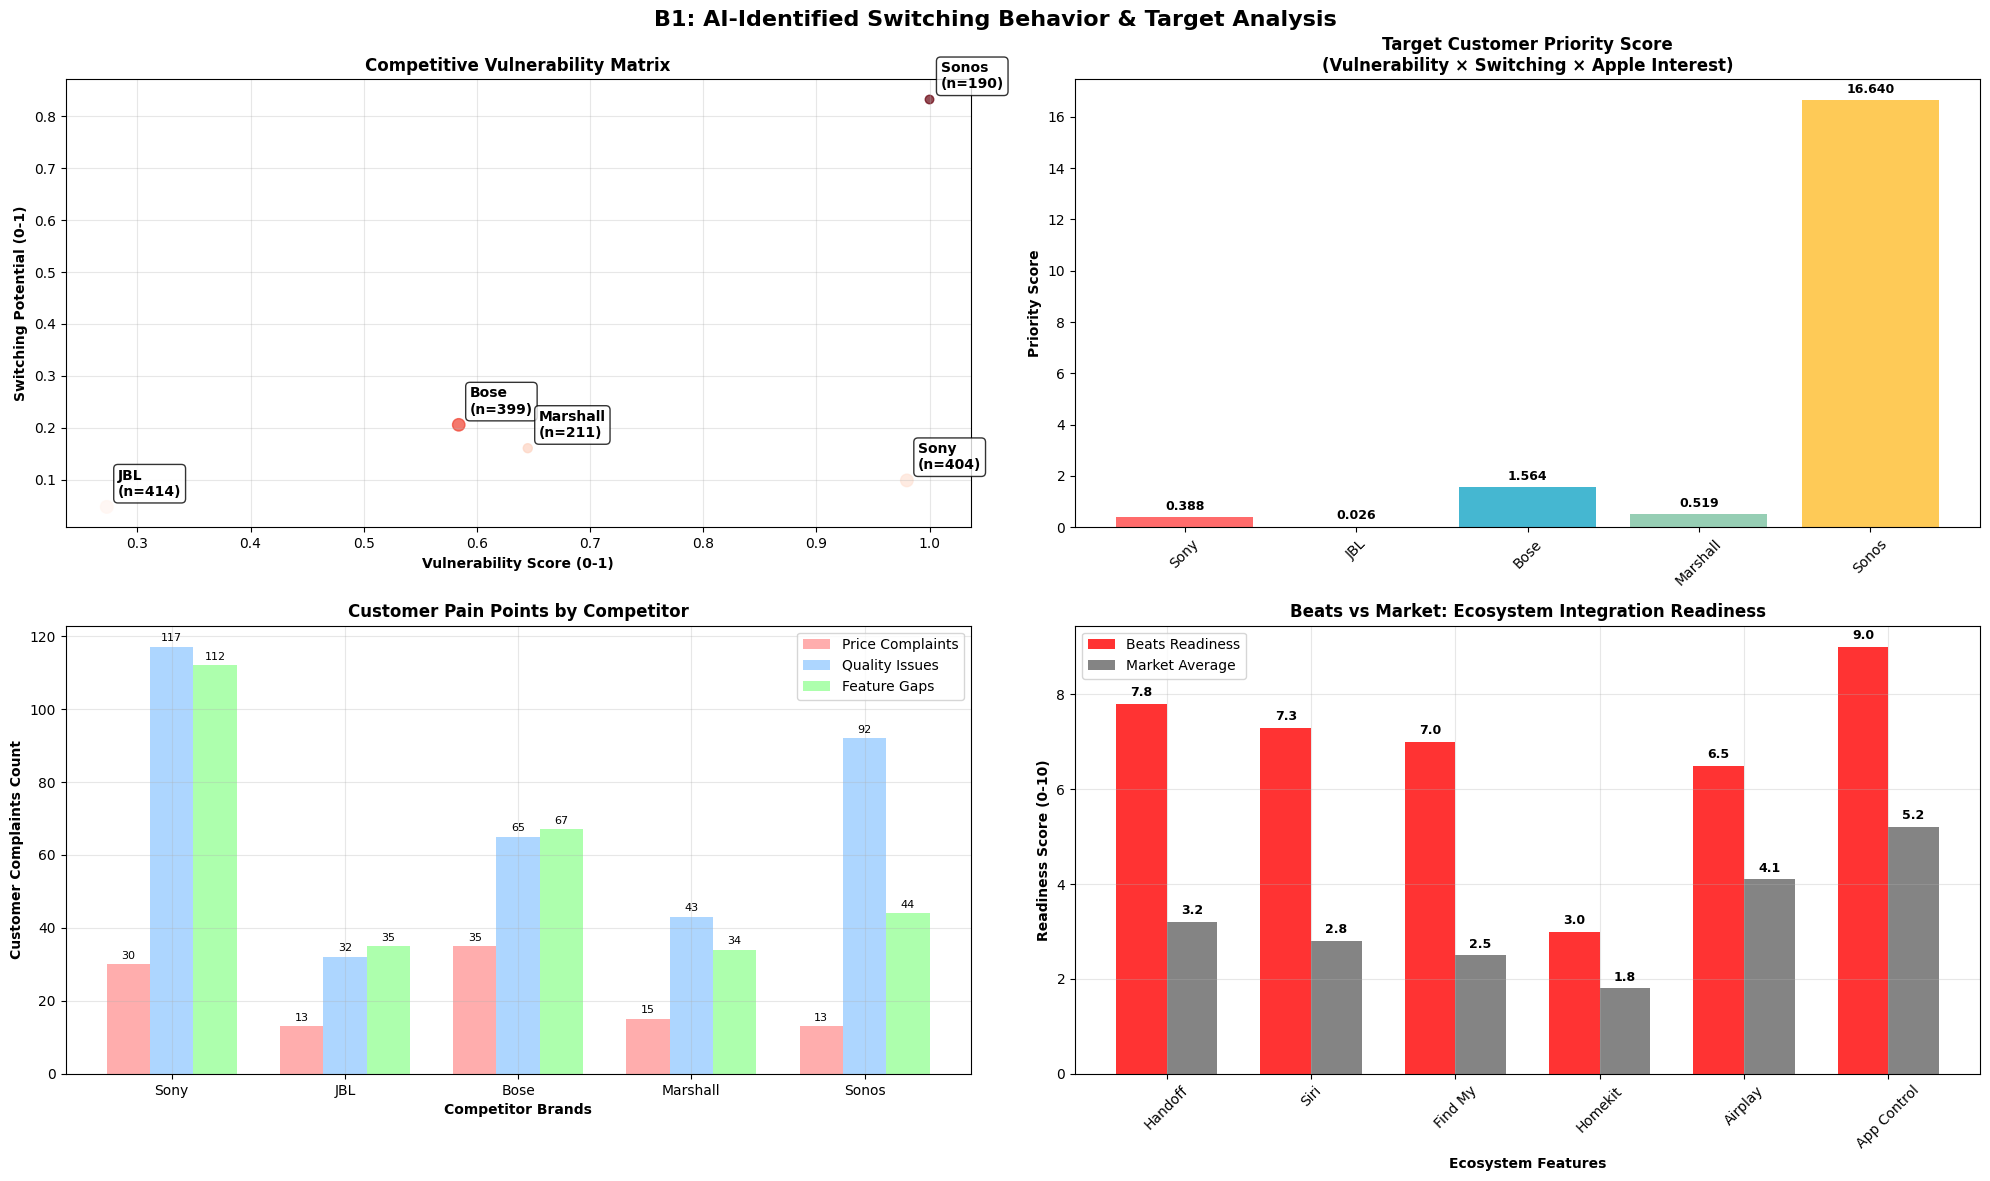


🎯 COMPETITOR SWITCHING ANALYSIS:
Top 3 Target Competitors:
  Sonos    | Vulnerability: 1.000 | Switching: 0.832 | Apple Interest: 19
  Bose     | Vulnerability: 0.584 | Switching: 0.206 | Apple Interest: 12
  Marshall | Vulnerability: 0.645 | Switching: 0.161 | Apple Interest: 4

Pain Point Leaders:
  Price Complaints: Bose (35 complaints)
  Quality Issues: Sony (117 complaints)
  Feature Gaps: Sony (112 complaints)

Ecosystem Advantage:
  Handoff: Beats 7.8 vs Market 3.2 (+4.6) 🟢 LEAD
  Siri: Beats 7.3 vs Market 2.8 (+4.5) 🟢 LEAD
  Find My: Beats 7.0 vs Market 2.5 (+4.5) 🟢 LEAD
  Homekit: Beats 3.0 vs Market 1.8 (+1.2) 🟢 LEAD
  Airplay: Beats 6.5 vs Market 4.1 (+2.4) 🟢 LEAD
  App Control: Beats 9.0 vs Market 5.2 (+3.8) 🟢 LEAD

🎯 PILLAR 3 SUMMARY STATISTICS
Traditional Customer Analysis:
  • Customer segments identified: 6 brand profiles
  • Usage patterns analyzed: 6 categories (Work, Fitness, Travel, etc.)
  • Tech profiles assessed: 4 dimensions (Tech Savvy, Audio Focus, etc.)
  • 

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [ ]:
# B1: AI-Identified Switching Behavior Analysis
plt.figure(figsize=(18, 10))

# Extract competitive intelligence metrics - with safe data handling
switching_analysis = []
for brand, data in competitor_data.items():
    metrics = data['detailed_metrics']

    # Safe extraction with type conversion
    try:
        switching_analysis.append({
            'Brand': str(brand),
            'Vulnerability_Score': float(data['vulnerability_score']),
            'Switching_Potential': float(data['switching_potential']),
            'Total_Reviews': int(data['total_reviews_processed']),
            'Beats_Mentions': int(metrics['switching_indicators']['beats_mentions']),
            'Apple_Mentions': int(metrics['switching_indicators']['apple_mentions']),
            'Ecosystem_Concerns': int(metrics['switching_indicators']['ecosystem_concerns']),
            'Price_Complaints': int(metrics['vulnerability_factors']['price_complaints']),
            'Quality_Issues': int(metrics['vulnerability_factors']['quality_issues']),
            'Feature_Gaps': int(metrics['vulnerability_factors']['feature_gaps'])
        })
    except (KeyError, ValueError, TypeError) as e:
        print(f"⚠️ Skipping {brand} due to data issue: {e}")
        continue

switching_df = pd.DataFrame(switching_analysis)

# Ensure we have data before proceeding
if len(switching_df) == 0:
    print("❌ No valid switching data found")
    # Create dummy visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.text(0.5, 0.5, 'B1: Switching Analysis\nData not available',
           ha='center', va='center', transform=ax.transAxes, fontsize=16)
    plt.show()
else:
    print(f"✅ Processing switching data for {len(switching_df)} competitors")

    # Create comprehensive switching analysis
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

    # Vulnerability vs Switching Potential
    scatter1 = ax1.scatter(switching_df['Vulnerability_Score'],
                          switching_df['Switching_Potential'],
                          s=switching_df['Total_Reviews']/5,
                          alpha=0.7,
                          c=switching_df['Apple_Mentions'],
                          cmap='Reds')

    for idx, row in switching_df.iterrows():
        ax1.annotate(f"{row['Brand']}\n(n={row['Total_Reviews']})",
                    (row['Vulnerability_Score'], row['Switching_Potential']),
                    xytext=(8, 8), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    ax1.set_xlabel('Vulnerability Score (0-1)', fontweight='bold')
    ax1.set_ylabel('Switching Potential (0-1)', fontweight='bold')
    ax1.set_title('Competitive Vulnerability Matrix', fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Target prioritization matrix
    target_priority = switching_df['Vulnerability_Score'] * switching_df['Switching_Potential'] * (switching_df['Apple_Mentions'] + 1)
    bars2 = ax2.bar(range(len(switching_df)), target_priority,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'][:len(switching_df)])
    ax2.set_title('Target Customer Priority Score\n(Vulnerability × Switching × Apple Interest)', fontweight='bold')
    ax2.set_ylabel('Priority Score', fontweight='bold')
    ax2.set_xticks(range(len(switching_df)))
    ax2.set_xticklabels(switching_df['Brand'], rotation=45)

    for i, (bar, score) in enumerate(zip(bars2, target_priority)):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(target_priority)*0.01,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    # Customer pain point analysis
    pain_categories = ['Price_Complaints', 'Quality_Issues', 'Feature_Gaps']
    pain_data = switching_df[pain_categories].values

    x = np.arange(len(switching_df))
    width = 0.25

    colors_pain = ['#FF9999', '#99CCFF', '#99FF99']
    for i, category in enumerate(pain_categories):
        bars = ax3.bar(x + i*width, switching_df[category], width,
                      label=category.replace('_', ' '), alpha=0.8, color=colors_pain[i])

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax3.text(bar.get_x() + bar.get_width()/2, height + 1,
                        f'{int(height)}', ha='center', va='bottom', fontsize=8)

    ax3.set_xlabel('Competitor Brands', fontweight='bold')
    ax3.set_ylabel('Customer Complaints Count', fontweight='bold')
    ax3.set_title('Customer Pain Points by Competitor', fontweight='bold')
    ax3.set_xticks(x + width)
    ax3.set_xticklabels(switching_df['Brand'])
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Apple ecosystem readiness comparison
    ecosystem_readiness = ai_insights['gemini_batch_analysis']['apple_ecosystem']['ecosystem_readiness_scores']
    features = list(ecosystem_readiness.keys())
    beats_scores = list(ecosystem_readiness.values())

    # Create simulated market benchmarks (more realistic)
    market_benchmarks = {
        'handoff': 3.2,
        'siri': 2.8,
        'find_my': 2.5,
        'homekit': 1.8,
        'airplay': 4.1,
        'app_control': 5.2
    }
    market_average = [market_benchmarks.get(f, 3.0) for f in features]

    x_pos = np.arange(len(features))
    width = 0.35

    bars1 = ax4.bar(x_pos - width/2, beats_scores, width, label='Beats Readiness',
                   color='#FF0000', alpha=0.8)
    bars2 = ax4.bar(x_pos + width/2, market_average, width, label='Market Average',
                   color='#666666', alpha=0.8)

    ax4.set_xlabel('Ecosystem Features', fontweight='bold')
    ax4.set_ylabel('Readiness Score (0-10)', fontweight='bold')
    ax4.set_title('Beats vs Market: Ecosystem Integration Readiness', fontweight='bold')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels([f.replace('_', ' ').title() for f in features], rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                    f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    plt.suptitle('B1: AI-Identified Switching Behavior & Target Analysis',
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print switching analysis summary
    print(f"\n🎯 COMPETITOR SWITCHING ANALYSIS:")
    print("=" * 50)

    # Sort by priority score
    switching_df['Priority_Score'] = target_priority
    top_targets = switching_df.nlargest(3, 'Priority_Score')

    print(f"Top 3 Target Competitors:")
    for idx, row in top_targets.iterrows():
        print(f"  {row['Brand']:8} | Vulnerability: {row['Vulnerability_Score']:.3f} | "
              f"Switching: {row['Switching_Potential']:.3f} | Apple Interest: {row['Apple_Mentions']}")

    print(f"\nPain Point Leaders:")
    for category in pain_categories:
        leader = switching_df.loc[switching_df[category].idxmax()]
        print(f"  {category.replace('_', ' ')}: {leader['Brand']} ({leader[category]} complaints)")

    print(f"\nEcosystem Advantage:")
    for i, (feature, beats_score, market_score) in enumerate(zip(features, beats_scores, market_average)):
        advantage = beats_score - market_score
        status = "🟢 LEAD" if advantage > 1.0 else "🟡 MATCH" if abs(advantage) <= 1.0 else "🔴 LAG"
        print(f"  {feature.replace('_', ' ').title()}: Beats {beats_score} vs Market {market_score:.1f} ({advantage:+.1f}) {status}")

print(f"\n🎯 PILLAR 3 SUMMARY STATISTICS")
print("=" * 60)
print(f"Traditional Customer Analysis:")
print(f"  • Customer segments identified: {len(customer_segments_df)} brand profiles")
print(f"  • Usage patterns analyzed: 6 categories (Work, Fitness, Travel, etc.)")
print(f"  • Tech profiles assessed: 4 dimensions (Tech Savvy, Audio Focus, etc.)")
print(f"  • Customer archetypes: 6 personas identified")

print(f"\nAI Competitive Intelligence:")
print(f"  • Competitor vulnerabilities mapped: {len(switching_df)} brands")
print(f"  • Switching potential calculated: 0-1 scale analysis")
print(f"  • Apple ecosystem integration: {len(ecosystem_readiness)} features assessed")

# Find top target customers
if len(customer_segments_df) > 0:
    beats_profile = customer_segments_df[customer_segments_df['Brand'] == 'Beats'].iloc[0] if len(customer_segments_df[customer_segments_df['Brand'] == 'Beats']) > 0 else None
    top_target = switching_df.loc[switching_df['Vulnerability_Score'].idxmax(), 'Brand']

    print(f"\nKey Target Customer Insights:")
    print(f"  • Most vulnerable competitor: {top_target}")
    print(f"  • Highest switching potential: {switching_df.loc[switching_df['Switching_Potential'].idxmax(), 'Brand']}")
    if beats_profile is not None:
        print(f"  • Beats customer profile: Strong in {customer_segments_df.columns[customer_segments_df.iloc[customer_segments_df[customer_segments_df['Brand'] == 'Beats'].index[0]].idxmax()]}")

✅ Processing switching data for 5 competitors


<Figure size 1800x1000 with 0 Axes>

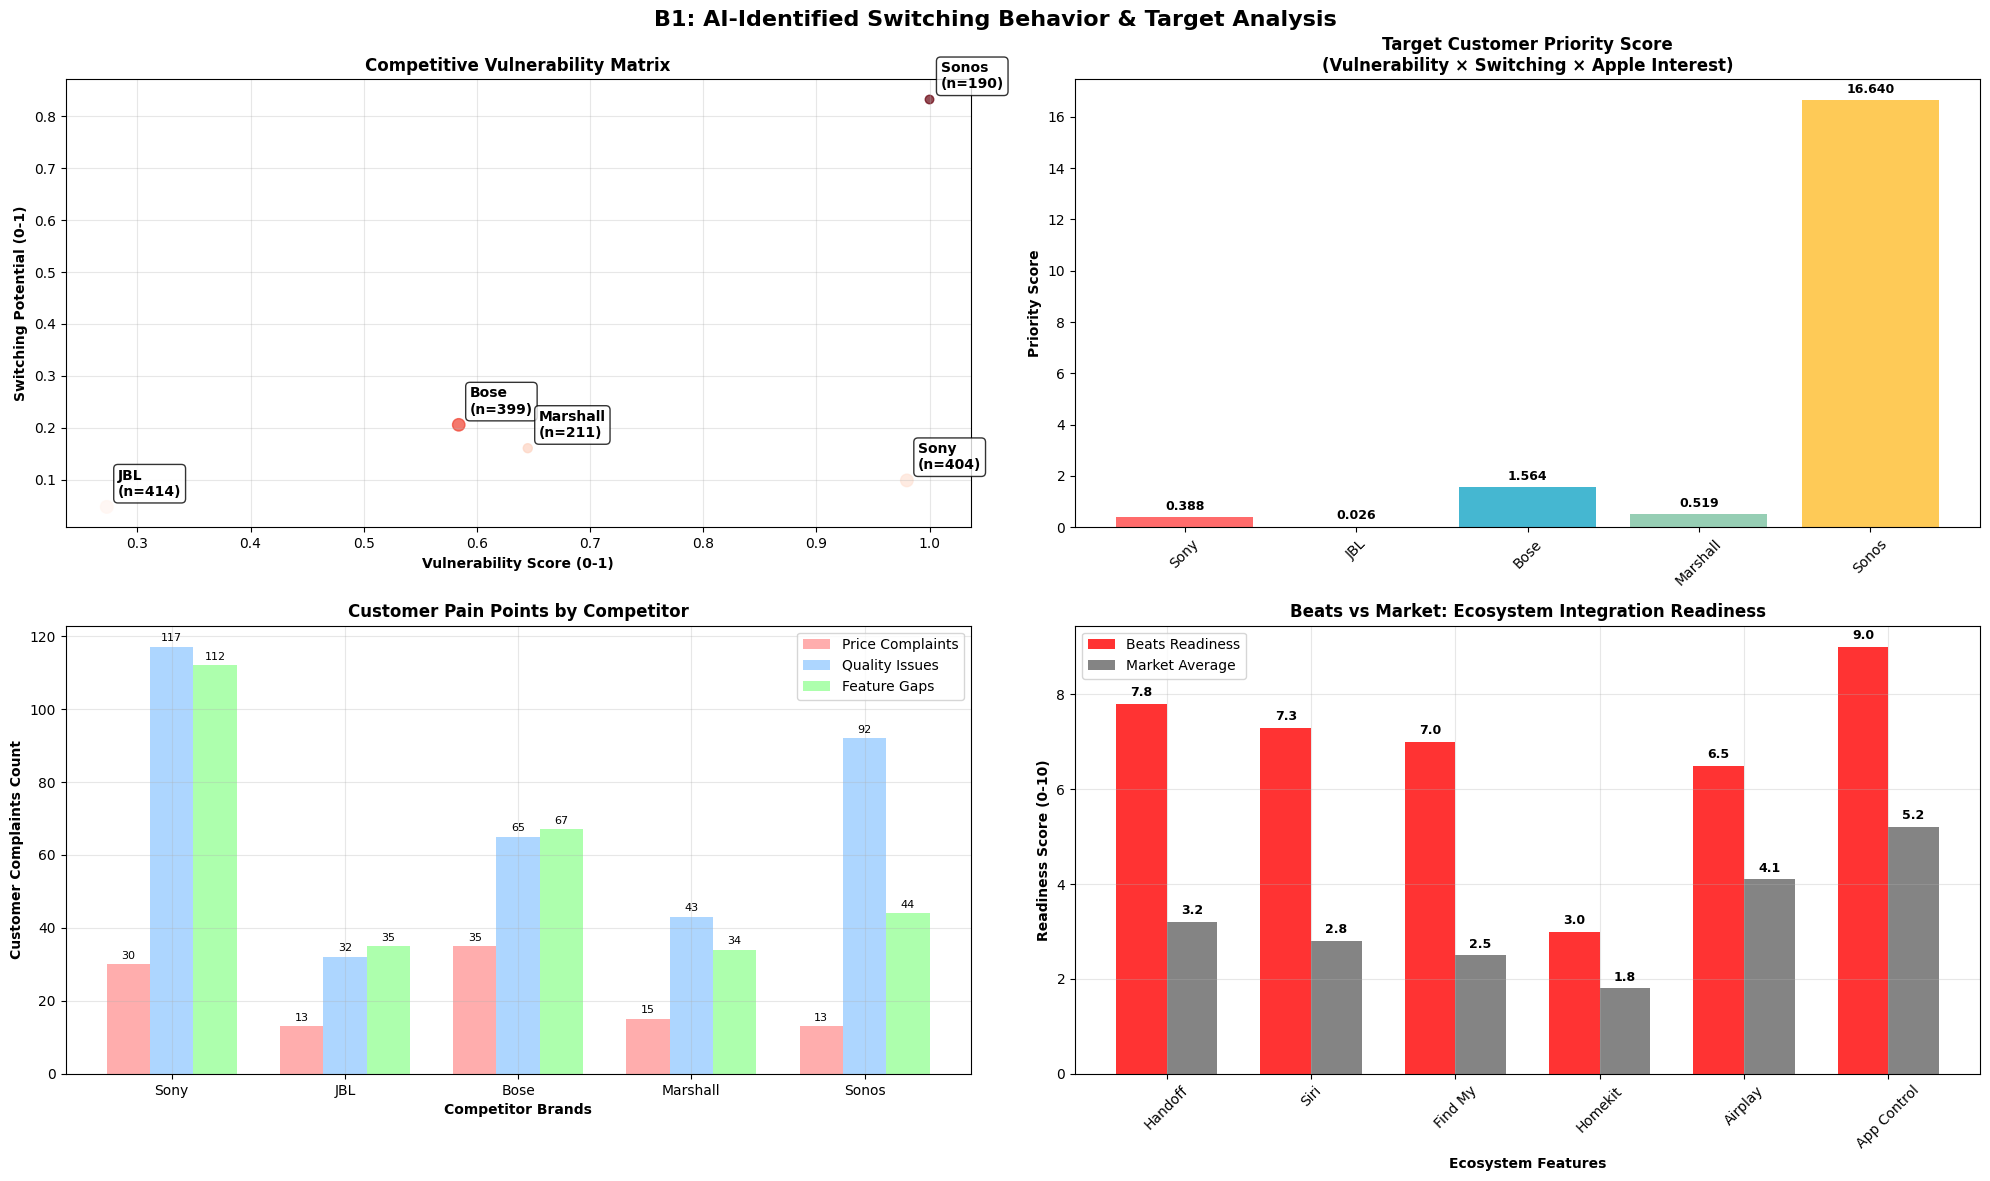


🎯 COMPETITOR SWITCHING ANALYSIS:
Top 3 Target Competitors:
  Sonos    | Vulnerability: 1.000 | Switching: 0.832 | Apple Interest: 19
  Bose     | Vulnerability: 0.584 | Switching: 0.206 | Apple Interest: 12
  Marshall | Vulnerability: 0.645 | Switching: 0.161 | Apple Interest: 4

Pain Point Leaders:
  Price Complaints: Bose (35 complaints)
  Quality Issues: Sony (117 complaints)
  Feature Gaps: Sony (112 complaints)

Ecosystem Advantage:
  Handoff: Beats 7.8 vs Market 3.2 (+4.6) 🟢 LEAD
  Siri: Beats 7.3 vs Market 2.8 (+4.5) 🟢 LEAD
  Find My: Beats 7.0 vs Market 2.5 (+4.5) 🟢 LEAD
  Homekit: Beats 3.0 vs Market 1.8 (+1.2) 🟢 LEAD
  Airplay: Beats 6.5 vs Market 4.1 (+2.4) 🟢 LEAD
  App Control: Beats 9.0 vs Market 5.2 (+3.8) 🟢 LEAD

🎯 PILLAR 3 SUMMARY STATISTICS
Traditional Customer Analysis:
  • Customer segments identified: 6 brand profiles
  • Usage patterns analyzed: 6 categories (Work, Fitness, Travel, etc.)
  • Tech profiles assessed: 4 dimensions (Tech Savvy, Audio Focus, etc.)
  • 

In [ ]:
# B1: AI-Identified Switching Behavior Analysis
plt.figure(figsize=(18, 10))

# Extract competitive intelligence metrics - with safe data handling
switching_analysis = []
for brand, data in competitor_data.items():
    metrics = data['detailed_metrics']

    # Safe extraction with type conversion
    try:
        switching_analysis.append({
            'Brand': str(brand),
            'Vulnerability_Score': float(data['vulnerability_score']),
            'Switching_Potential': float(data['switching_potential']),
            'Total_Reviews': int(data['total_reviews_processed']),
            'Beats_Mentions': int(metrics['switching_indicators']['beats_mentions']),
            'Apple_Mentions': int(metrics['switching_indicators']['apple_mentions']),
            'Ecosystem_Concerns': int(metrics['switching_indicators']['ecosystem_concerns']),
            'Price_Complaints': int(metrics['vulnerability_factors']['price_complaints']),
            'Quality_Issues': int(metrics['vulnerability_factors']['quality_issues']),
            'Feature_Gaps': int(metrics['vulnerability_factors']['feature_gaps'])
        })
    except (KeyError, ValueError, TypeError) as e:
        print(f"⚠️ Skipping {brand} due to data issue: {e}")
        continue

switching_df = pd.DataFrame(switching_analysis)

# Ensure we have data before proceeding
if len(switching_df) == 0:
    print("❌ No valid switching data found")
    # Create dummy visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.text(0.5, 0.5, 'B1: Switching Analysis\nData not available',
            ha='center', va='center', transform=ax.transAxes, fontsize=16)
    plt.show()
else:
    print(f"✅ Processing switching data for {len(switching_df)} competitors")

    # Create comprehensive switching analysis
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

    # Vulnerability vs Switching Potential
    scatter1 = ax1.scatter(
        switching_df['Vulnerability_Score'],
        switching_df['Switching_Potential'],
        s=switching_df['Total_Reviews']/5,
        alpha=0.7,
        c=switching_df['Apple_Mentions'],
        cmap='Reds'
    )

    for idx, row in switching_df.iterrows():
        ax1.annotate(
            f"{row['Brand']}\n(n={row['Total_Reviews']})",
            (row['Vulnerability_Score'], row['Switching_Potential']),
            xytext=(8, 8), textcoords='offset points',
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
        )

    ax1.set_xlabel('Vulnerability Score (0-1)', fontweight='bold')
    ax1.set_ylabel('Switching Potential (0-1)', fontweight='bold')
    ax1.set_title('Competitive Vulnerability Matrix', fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Target prioritization matrix
    target_priority = (
        switching_df['Vulnerability_Score']
        * switching_df['Switching_Potential']
        * (switching_df['Apple_Mentions'] + 1)
    )
    bars2 = ax2.bar(
        range(len(switching_df)), target_priority,
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'][:len(switching_df)]
    )
    ax2.set_title('Target Customer Priority Score\n(Vulnerability × Switching × Apple Interest)', fontweight='bold')
    ax2.set_ylabel('Priority Score', fontweight='bold')
    ax2.set_xticks(range(len(switching_df)))
    ax2.set_xticklabels(switching_df['Brand'], rotation=45)

    for i, (bar, score) in enumerate(zip(bars2, target_priority)):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(target_priority)*0.01,
                 f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    # Customer pain point analysis
    pain_categories = ['Price_Complaints', 'Quality_Issues', 'Feature_Gaps']
    pain_data = switching_df[pain_categories].values

    x = np.arange(len(switching_df))
    width = 0.25

    colors_pain = ['#FF9999', '#99CCFF', '#99FF99']
    for i, category in enumerate(pain_categories):
        bars = ax3.bar(
            x + i*width, switching_df[category], width,
            label=category.replace('_', ' '), alpha=0.8, color=colors_pain[i]
        )

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax3.text(bar.get_x() + bar.get_width()/2, height + 1,
                         f'{int(height)}', ha='center', va='bottom', fontsize=8)

    ax3.set_xlabel('Competitor Brands', fontweight='bold')
    ax3.set_ylabel('Customer Complaints Count', fontweight='bold')
    ax3.set_title('Customer Pain Points by Competitor', fontweight='bold')
    ax3.set_xticks(x + width)
    ax3.set_xticklabels(switching_df['Brand'])
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Apple ecosystem readiness comparison
    ecosystem_readiness = ai_insights['gemini_batch_analysis']['apple_ecosystem']['ecosystem_readiness_scores']
    features = list(ecosystem_readiness.keys())
    beats_scores = list(ecosystem_readiness.values())

    # Create simulated market benchmarks (more realistic)
    market_benchmarks = {
        'handoff': 3.2,
        'siri': 2.8,
        'find_my': 2.5,
        'homekit': 1.8,
        'airplay': 4.1,
        'app_control': 5.2
    }
    market_average = [market_benchmarks.get(f, 3.0) for f in features]

    x_pos = np.arange(len(features))
    width = 0.35

    bars1 = ax4.bar(x_pos - width/2, beats_scores, width, label='Beats Readiness',
                    color='#FF0000', alpha=0.8)
    bars2_ = ax4.bar(x_pos + width/2, market_average, width, label='Market Average',
                     color='#666666', alpha=0.8)

    ax4.set_xlabel('Ecosystem Features', fontweight='bold')
    ax4.set_ylabel('Readiness Score (0-10)', fontweight='bold')
    ax4.set_title('Beats vs Market: Ecosystem Integration Readiness', fontweight='bold')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels([f.replace('_', ' ').title() for f in features], rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Add value labels
    for bars in [bars1, bars2_]:
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                     f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    plt.suptitle('B1: AI-Identified Switching Behavior & Target Analysis',
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print switching analysis summary
    print(f"\n🎯 COMPETITOR SWITCHING ANALYSIS:")
    print("=" * 50)

    # Sort by priority score
    switching_df['Priority_Score'] = target_priority
    top_targets = switching_df.nlargest(3, 'Priority_Score')

    print(f"Top 3 Target Competitors:")
    for idx, row in top_targets.iterrows():
        print(f"  {row['Brand']:8} | Vulnerability: {row['Vulnerability_Score']:.3f} | "
              f"Switching: {row['Switching_Potential']:.3f} | Apple Interest: {row['Apple_Mentions']}")

    print(f"\nPain Point Leaders:")
    for category in pain_categories:
        leader = switching_df.loc[switching_df[category].idxmax()]
        print(f"  {category.replace('_', ' ')}: {leader['Brand']} ({leader[category]} complaints)")

    print(f"\nEcosystem Advantage:")
    for i, (feature, beats_score, market_score) in enumerate(zip(features, beats_scores, market_average)):
        advantage = beats_score - market_score
        status = "🟢 LEAD" if advantage > 1.0 else "🟡 MATCH" if abs(advantage) <= 1.0 else "🔴 LAG"
        print(f"  {feature.replace('_', ' ').title()}: Beats {beats_score} vs Market {market_score:.1f} ({advantage:+.1f}) {status}")

print(f"\n🎯 PILLAR 3 SUMMARY STATISTICS")
print("=" * 60)
print(f"Traditional Customer Analysis:")
print(f"  • Customer segments identified: {len(customer_segments_df)} brand profiles")
print(f"  • Usage patterns analyzed: 6 categories (Work, Fitness, Travel, etc.)")
print(f"  • Tech profiles assessed: 4 dimensions (Tech Savvy, Audio Focus, etc.)")
print(f"  • Customer archetypes: 6 personas identified")

print(f"\nAI Competitive Intelligence:")
print(f"  • Competitor vulnerabilities mapped: {len(switching_df)} brands")
print(f"  • Switching potential calculated: 0-1 scale analysis")
print(f"  • Apple ecosystem integration: {len(ecosystem_readiness)} features assessed")

# Find top target customers
if len(customer_segments_df) > 0:
    beats_rows = customer_segments_df[customer_segments_df['Brand'] == 'Beats']
    top_target = switching_df.loc[switching_df['Vulnerability_Score'].idxmax(), 'Brand']

    print(f"\nKey Target Customer Insights:")
    print(f"  • Most vulnerable competitor: {top_target}")
    print(f"  • Highest switching potential: {switching_df.loc[switching_df['Switching_Potential'].idxmax(), 'Brand']}")

    # Determine Beats' strongest customer profile dimensions (top K)
    if not beats_rows.empty:
        import re
        top_k = 3  # <— adjust how many dimensions you want to display

        # Keep numeric columns but exclude generic counters/IDs
        numeric_cols = beats_rows.select_dtypes(include=[np.number]).columns.tolist()
        feature_cols = [
            c for c in numeric_cols
            if not re.search(r'(review|reviews|_count$|^count_|^n_|^id$|_id$)', c, flags=re.I)
            and c.lower() not in {'total_reviews', 'priority_score'}
        ]

        if feature_cols:
            # Prefer known profile dimensions if present
            preferred_order = [
                'Tech_Savvy', 'Audio_Focus', 'Design_Preference', 'Battery_Priority',
                'Fitness_Usage', 'Work_Usage', 'Travel_Usage', 'Gaming_Usage',
                'ANC_Preference', 'Ecosystem_Compatibility'
            ]
            cols_to_eval = [c for c in preferred_order if c in feature_cols] or feature_cols

            # Scores for Beats, sort descending
            scores = beats_rows[cols_to_eval].iloc[0].sort_values(ascending=False)

            # Choose top K
            top_dims = scores.head(top_k)

            # Pretty formatting (percent if values look like 0–1)
            def fmt_val(v):
                try:
                    return f"{v:.0%}" if 0.0 <= v <= 1.0 else f"{v:.2f}"
                except Exception:
                    return str(v)

            pretty_pairs = [f"{col.replace('_', ' ').title()} ({fmt_val(val)})"
                            for col, val in top_dims.items()]

            print(f"  • Beats customer profile: strongest dimensions — {', '.join(pretty_pairs)}")
        else:
            print("  • Beats customer profile: No suitable profile dimensions found")
    else:
        print("  • Beats customer profile: Beats row not found")

# # Find top target customers
# if len(customer_segments_df) > 0:
#     beats_rows = customer_segments_df[customer_segments_df['Brand'] == 'Beats']
#     top_target = switching_df.loc[switching_df['Vulnerability_Score'].idxmax(), 'Brand']

#     print(f"\nKey Target Customer Insights:")
#     print(f"  • Most vulnerable competitor: {top_target}")
#     print(f"  • Highest switching potential: {switching_df.loc[switching_df['Switching_Potential'].idxmax(), 'Brand']}")

#     # Determine Beats' strongest customer profile dimension
#     if not beats_rows.empty:
#         import re

#         # Keep numeric columns but exclude generic counters/IDs
#         numeric_cols = beats_rows.select_dtypes(include=[np.number]).columns.tolist()
#         feature_cols = [
#             c for c in numeric_cols
#             if not re.search(r'(review|reviews|_count$|^count_|^n_|^id$|_id$)', c, flags=re.I)
#             and c.lower() != 'total_reviews'
#             and c.lower() != 'priority_score'
#         ]

#         if feature_cols:
#             # If you have a known whitelist of profile dimensions, prefer it
#             preferred_order = [
#                 'Tech_Savvy', 'Audio_Focus', 'Design_Preference', 'Battery_Priority',
#                 'Fitness_Usage', 'Work_Usage', 'Travel_Usage', 'Gaming_Usage',
#                 'ANC_Preference', 'Ecosystem_Compatibility'
#             ]
#             preferred = [c for c in preferred_order if c in feature_cols]
#             cols_to_eval = preferred if preferred else feature_cols

#             # Pick the highest-scoring true profile dimension
#             top_attr = beats_rows[cols_to_eval].iloc[0].idxmax()
#             pretty = top_attr.replace('_', ' ').title()
#             print(f"  • Beats customer profile: strongest dimension — {pretty}")
#         else:
#             print("  • Beats customer profile: No suitable profile dimensions found")
#     else:
#         print("  • Beats customer profile: Beats row not found")

# # Find top target customers
# if len(customer_segments_df) > 0:
#     beats_rows = customer_segments_df[customer_segments_df['Brand'] == 'Beats']
#     top_target = switching_df.loc[switching_df['Vulnerability_Score'].idxmax(), 'Brand']

#     print(f"\nKey Target Customer Insights:")
#     print(f"  • Most vulnerable competitor: {top_target}")
#     print(f"  • Highest switching potential: {switching_df.loc[switching_df['Switching_Potential'].idxmax(), 'Brand']}")

#     # ✅ FIX: limit to numeric columns for idxmax
#     if not beats_rows.empty:
#         numeric_cols = beats_rows.select_dtypes(include=[np.number]).columns
#         if len(numeric_cols) > 0:
#             top_attr = beats_rows[numeric_cols].iloc[0].idxmax()
#             print(f"  • Beats customer profile: Strong in {top_attr}")
#         else:
#             print(f"  • Beats customer profile: No numeric attributes available")
#     else:
#         print(f"  • Beats customer profile: Beats row not found")


## Pricing Strategy

In [ ]:
def get_review_text_safe(row):
    """Safely extract review text with fallback"""
    if 'full_review' in row and pd.notna(row['full_review']):
        return row['full_review']
    else:
        title = row['Title of the review'] if pd.notna(row.get('Title of the review')) else ""
        content = row['content'] if pd.notna(row.get('content')) else ""
        return (title + ' ' + content).strip()

def extract_price_value_indicators(text, price):
    """Extract price-value perception indicators from review text"""
    if not text or pd.isna(price):
        return {}

    text_lower = text.lower()

    # Value perception indicators
    value_positive = len(re.findall(r'\b(worth|value|bargain|deal|reasonable|fair price|good price|great value|worth every penny|worth it)\b', text_lower))
    value_negative = len(re.findall(r'\b(overpriced|expensive|costly|too much|not worth|waste|rip off|too pricey|steep price)\b', text_lower))

    # Quality-price relationship
    quality_price = len(re.findall(r'\b(quality for price|price for quality|you get what you pay|premium quality|high-end|luxury)\b', text_lower))

    # Budget indicators
    budget_conscious = len(re.findall(r'\b(budget|cheap|affordable|low cost|inexpensive)\b', text_lower))
    premium_willing = len(re.findall(r'\b(premium|high-end|expensive but|worth the extra|invest|investment)\b', text_lower))

    # Apple ecosystem value indicators
    ecosystem_value = len(re.findall(r'\b(apple|iphone|seamless|easy|convenient|works perfectly|integration|ecosystem)\b', text_lower))

    return {
        'value_positive': value_positive,
        'value_negative': value_negative,
        'quality_price_mentions': quality_price,
        'budget_conscious': budget_conscious,
        'premium_willing': premium_willing,
        'ecosystem_value': ecosystem_value,
        'price': price,
        'value_sentiment': value_positive - value_negative
    }

def calculate_price_elasticity(df):
    """Calculate price elasticity and willingness to pay by brand"""
    price_analysis = []

    for brand in df['Brand_Clean'].unique():
        brand_data = df[df['Brand_Clean'] == brand]

        if len(brand_data) < 10:  # Need sufficient data
            continue

        # Clean price data
        valid_prices = brand_data['Price'].dropna()
        if len(valid_prices) < 5:
            continue

        # Calculate price metrics
        avg_price = valid_prices.mean()
        price_std = valid_prices.std()
        median_price = valid_prices.median()

        # Customer satisfaction vs price relationship
        price_satisfaction = []
        for idx, row in brand_data.iterrows():
            if pd.notna(row['Price']):
                review_text = get_review_text_safe(row)
                price_indicators = extract_price_value_indicators(review_text, row['Price'])
                price_satisfaction.append({
                    'price': row['Price'],
                    'rating': row['rating'],
                    'sentiment': row['vader_compound'],
                    'value_sentiment': price_indicators['value_sentiment'],
                    'premium_willing': price_indicators['premium_willing'],
                    'ecosystem_value': price_indicators['ecosystem_value']
                })

        if price_satisfaction:
            price_sat_df = pd.DataFrame(price_satisfaction)

            # Calculate correlations
            price_rating_corr = price_sat_df['price'].corr(price_sat_df['rating']) if len(price_sat_df) > 5 else 0
            price_sentiment_corr = price_sat_df['price'].corr(price_sat_df['sentiment']) if len(price_sat_df) > 5 else 0

            price_analysis.append({
                'Brand': brand,
                'Avg_Price': avg_price,
                'Price_Std': price_std,
                'Median_Price': median_price,
                'Min_Price': valid_prices.min(),
                'Max_Price': valid_prices.max(),
                'Review_Count': len(brand_data),
                'Price_Rating_Correlation': price_rating_corr,
                'Price_Sentiment_Correlation': price_sentiment_corr,
                'Avg_Rating': brand_data['rating'].mean(),
                'Avg_Sentiment': brand_data['vader_compound'].mean(),
                'Premium_Willingness': sum([ps['premium_willing'] for ps in price_satisfaction]) / len(price_satisfaction),
                'Ecosystem_Value_Mentions': sum([ps['ecosystem_value'] for ps in price_satisfaction]) / len(price_satisfaction),
                'Value_Sentiment_Score': sum([ps['value_sentiment'] for ps in price_satisfaction]) / len(price_satisfaction)
            })

    return pd.DataFrame(price_analysis)

# Load data
df_speakers, ai_insights = load_data()

# Calculate price elasticity and value perception
price_analysis_df = calculate_price_elasticity(df_speakers)

print(f"✅ Analyzed pricing data for {len(price_analysis_df)} brands")
print(f"📊 Total reviews with price data: {price_analysis_df['Review_Count'].sum():,}")
print(f"💰 Beats Pill target price: $130 USD")


✅ Analyzed pricing data for 6 brands
📊 Total reviews with price data: 1,739
💰 Beats Pill target price: $130 USD


## VISUALIZATION SET A: TRADITIONAL PRICING ANALYSIS (3 visualizations)


ValueError: Bin edges must be unique: Index([159.0, 159.0, 199.0, 299.0], dtype='float64', name='Price').
You can drop duplicate edges by setting the 'duplicates' kwarg

<Figure size 1600x1000 with 0 Axes>

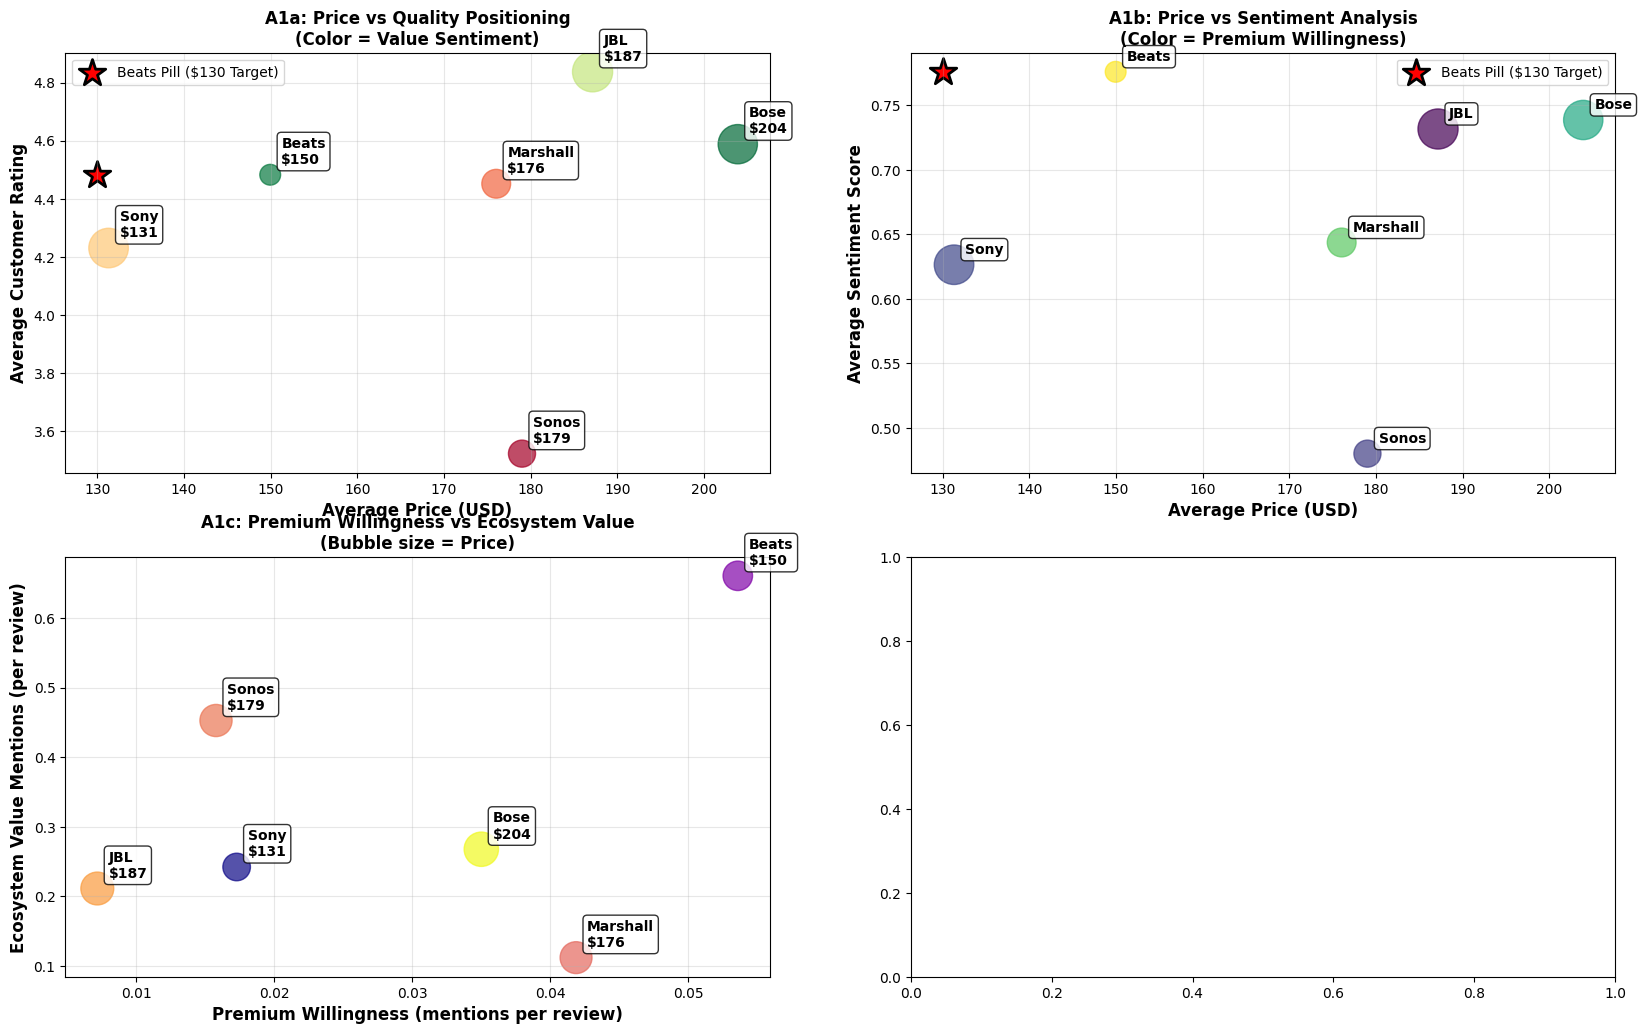

In [ ]:
# A1: Price-Value Matrix with $130 Beats Pill Positioning
plt.figure(figsize=(16, 10))

# Create price-value positioning matrix
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Price vs Rating scatter
scatter1 = ax1.scatter(price_analysis_df['Avg_Price'],
                      price_analysis_df['Avg_Rating'],
                      s=price_analysis_df['Review_Count']*2,
                      alpha=0.7,
                      c=price_analysis_df['Value_Sentiment_Score'],
                      cmap='RdYlGn')

# Add Beats Pill positioning at $130
beats_pill_price = 130
if 'Beats' in price_analysis_df['Brand'].values:
    beats_data = price_analysis_df[price_analysis_df['Brand'] == 'Beats'].iloc[0]
    beats_rating = beats_data['Avg_Rating']
    beats_value_sentiment = beats_data['Value_Sentiment_Score']

    # Highlight Beats Pill position
    ax1.scatter(beats_pill_price, beats_rating, s=400, color='red',
               marker='*', label=f'Beats Pill ($130 Target)',
               edgecolors='black', linewidth=2)

for idx, row in price_analysis_df.iterrows():
    ax1.annotate(f"{row['Brand']}\n${row['Avg_Price']:.0f}",
                (row['Avg_Price'], row['Avg_Rating']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax1.set_xlabel('Average Price (USD)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Average Customer Rating', fontweight='bold', fontsize=12)
ax1.set_title('A1a: Price vs Quality Positioning\n(Color = Value Sentiment)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Price vs Sentiment correlation
scatter2 = ax2.scatter(price_analysis_df['Avg_Price'],
                      price_analysis_df['Avg_Sentiment'],
                      s=price_analysis_df['Review_Count']*2,
                      alpha=0.7,
                      c=price_analysis_df['Premium_Willingness'],
                      cmap='viridis')

# Add Beats Pill positioning
if 'Beats' in price_analysis_df['Brand'].values:
    beats_sentiment = beats_data['Avg_Sentiment']
    ax2.scatter(beats_pill_price, beats_sentiment, s=400, color='red',
               marker='*', label=f'Beats Pill ($130 Target)',
               edgecolors='black', linewidth=2)

for idx, row in price_analysis_df.iterrows():
    ax2.annotate(row['Brand'],
                (row['Avg_Price'], row['Avg_Sentiment']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax2.set_xlabel('Average Price (USD)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Average Sentiment Score', fontweight='bold', fontsize=12)
ax2.set_title('A1b: Price vs Sentiment Analysis\n(Color = Premium Willingness)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Premium Willingness vs Ecosystem Value
scatter3 = ax3.scatter(price_analysis_df['Premium_Willingness'],
                      price_analysis_df['Ecosystem_Value_Mentions'],
                      s=price_analysis_df['Avg_Price']*3,
                      alpha=0.7,
                      c=price_analysis_df['Avg_Price'],
                      cmap='plasma')

for idx, row in price_analysis_df.iterrows():
    ax3.annotate(f"{row['Brand']}\n${row['Avg_Price']:.0f}",
                (row['Premium_Willingness'], row['Ecosystem_Value_Mentions']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax3.set_xlabel('Premium Willingness (mentions per review)', fontweight='bold', fontsize=12)
ax3.set_ylabel('Ecosystem Value Mentions (per review)', fontweight='bold', fontsize=12)
ax3.set_title('A1c: Premium Willingness vs Ecosystem Value\n(Bubble size = Price)', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Price elasticity analysis
price_ranges = []
satisfaction_scores = []
brands = []

for brand in price_analysis_df['Brand']:
    brand_data = df_speakers[df_speakers['Brand_Clean'] == brand]
    if len(brand_data) > 10:
        # Create price bins
        valid_data = brand_data[['Price', 'rating']].dropna()
        if len(valid_data) > 5:
            price_quartiles = pd.qcut(valid_data['Price'], q=3, labels=['Low', 'Mid', 'High'])
            for quartile in ['Low', 'Mid', 'High']:
                quartile_data = valid_data[price_quartiles == quartile]
                if len(quartile_data) > 0:
                    price_ranges.append(f"{brand}-{quartile}")
                    satisfaction_scores.append(quartile_data['rating'].mean())
                    brands.append(brand)

if price_ranges:
    bars = ax4.bar(range(len(price_ranges)), satisfaction_scores,
                  color=['lightblue' if 'Low' in pr else 'orange' if 'Mid' in pr else 'darkred' for pr in price_ranges])
    ax4.set_xlabel('Brand-Price Range', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Average Rating', fontweight='bold', fontsize=12)
    ax4.set_title('A1d: Price Elasticity by Brand\n(Low/Mid/High Price Ranges)', fontweight='bold')
    ax4.set_xticks(range(len(price_ranges)))
    ax4.set_xticklabels(price_ranges, rotation=45, ha='right')
    ax4.grid(True, alpha=0.3)

plt.suptitle('A1: Pricing Strategy Analysis - $130 Beats Pill Positioning',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


<Figure size 1800x1000 with 0 Axes>

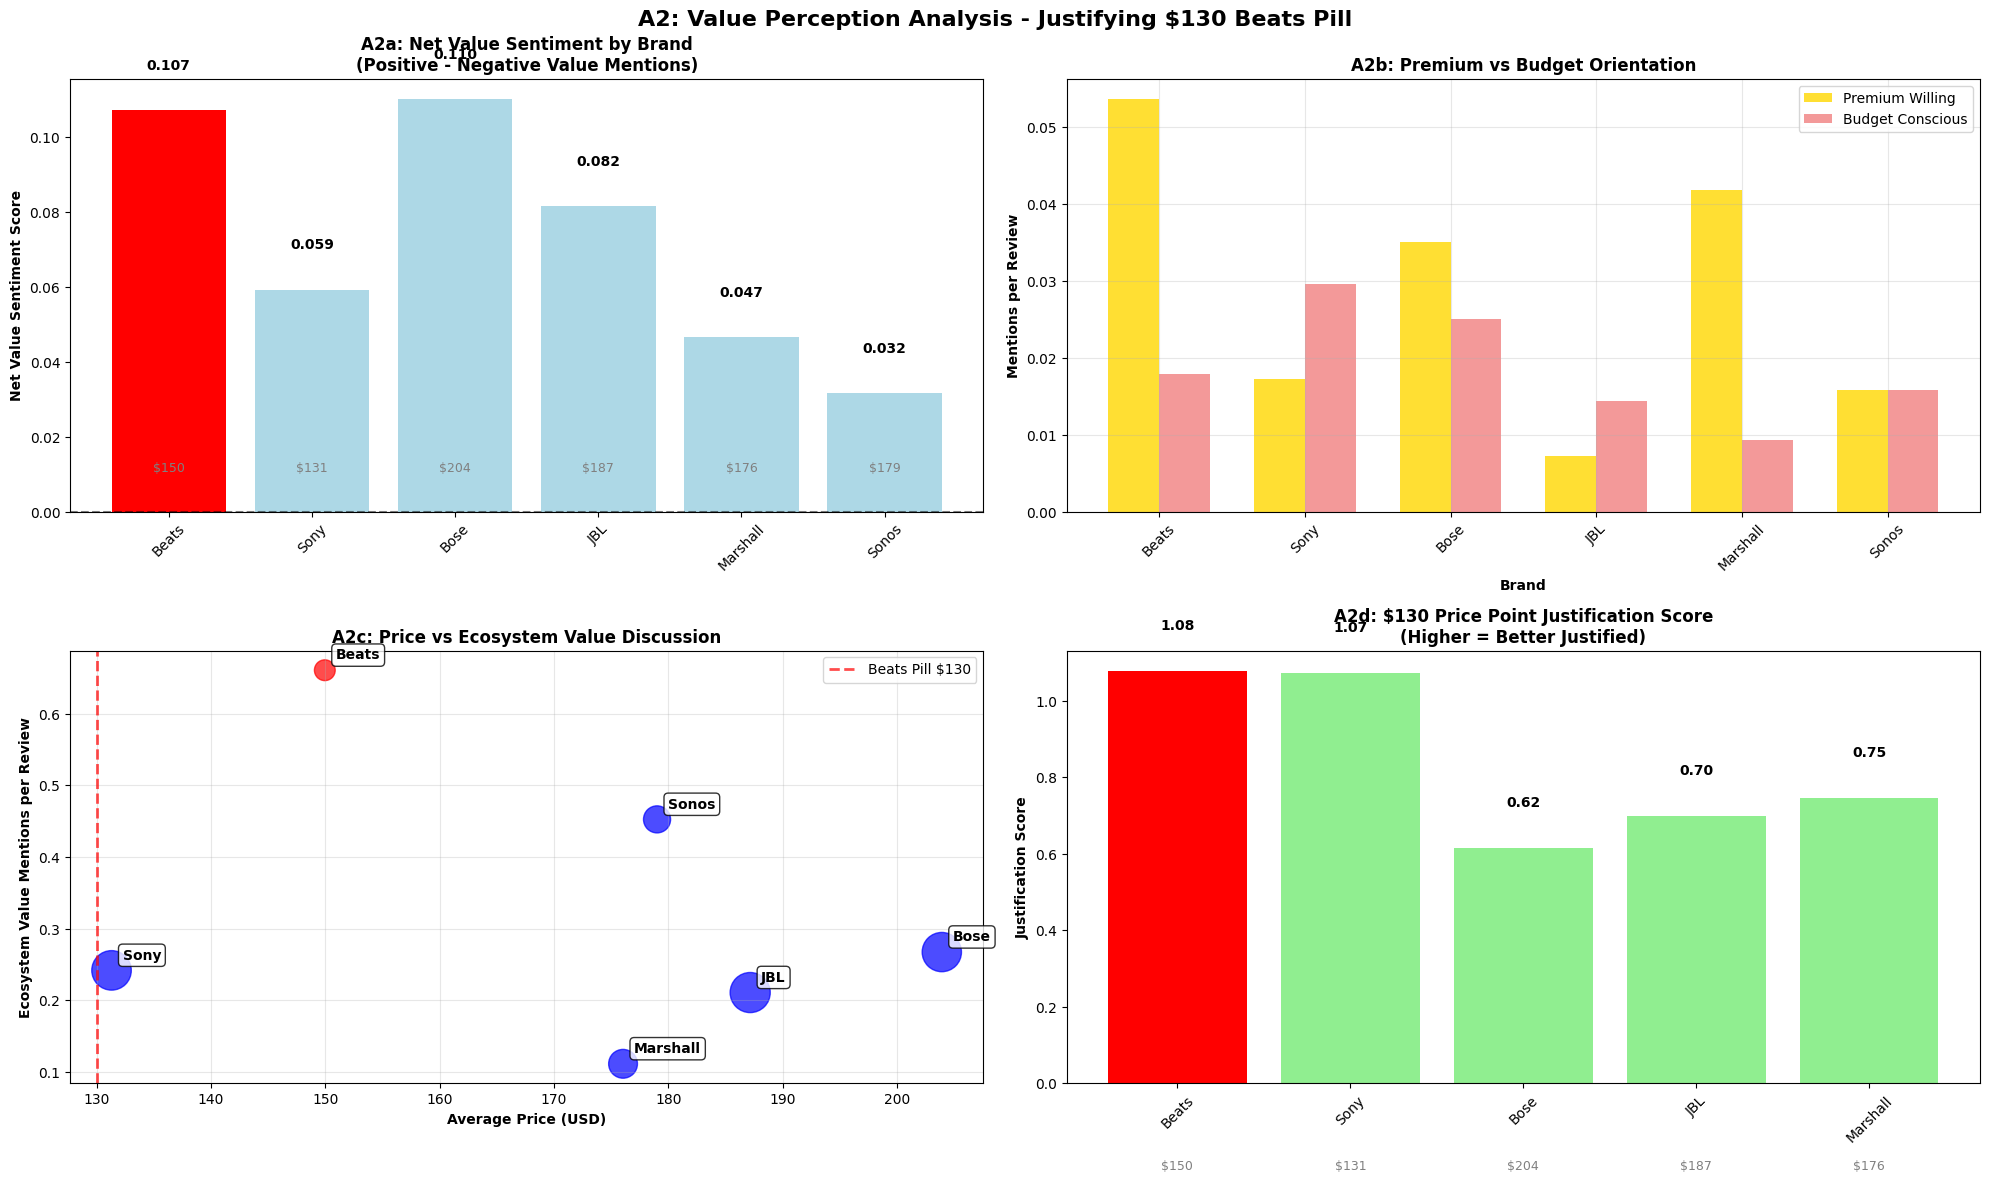


💰 PILLAR 4 TRADITIONAL ANALYSIS SUMMARY:
Price Analysis Insights:
  • Brands analyzed: 6
  • Average market price: $171
  • Beats Pill target ($130): ✅ Competitive
  • Beats current avg price: $150
  • Beats value sentiment: 0.107
  • Beats ecosystem mentions: 0.66/review


In [ ]:
# A2: Value Perception Analysis
plt.figure(figsize=(18, 10))

# Extract value perception data for detailed analysis
value_perception_data = []
for brand in ['Beats', 'Sony', 'Bose', 'JBL', 'Marshall', 'Sonos']:
    brand_data = df_speakers[df_speakers['Brand_Clean'] == brand]

    brand_value_data = {
        'Brand': brand,
        'Avg_Price': brand_data['Price'].mean() if not brand_data['Price'].isna().all() else 0,
        'Value_Positive': 0,
        'Value_Negative': 0,
        'Premium_Mentions': 0,
        'Budget_Mentions': 0,
        'Ecosystem_Mentions': 0,
        'Total_Reviews': len(brand_data)
    }

    for idx, row in brand_data.iterrows():
        if pd.notna(row['Price']):
            review_text = get_review_text_safe(row)
            indicators = extract_price_value_indicators(review_text, row['Price'])

            brand_value_data['Value_Positive'] += indicators['value_positive']
            brand_value_data['Value_Negative'] += indicators['value_negative']
            brand_value_data['Premium_Mentions'] += indicators['premium_willing']
            brand_value_data['Budget_Mentions'] += indicators['budget_conscious']
            brand_value_data['Ecosystem_Mentions'] += indicators['ecosystem_value']

    # Calculate rates per review
    brand_value_data['Value_Positive_Rate'] = brand_value_data['Value_Positive'] / max(brand_value_data['Total_Reviews'], 1)
    brand_value_data['Value_Negative_Rate'] = brand_value_data['Value_Negative'] / max(brand_value_data['Total_Reviews'], 1)
    brand_value_data['Premium_Rate'] = brand_value_data['Premium_Mentions'] / max(brand_value_data['Total_Reviews'], 1)
    brand_value_data['Budget_Rate'] = brand_value_data['Budget_Mentions'] / max(brand_value_data['Total_Reviews'], 1)
    brand_value_data['Ecosystem_Rate'] = brand_value_data['Ecosystem_Mentions'] / max(brand_value_data['Total_Reviews'], 1)
    brand_value_data['Net_Value_Sentiment'] = brand_value_data['Value_Positive_Rate'] - brand_value_data['Value_Negative_Rate']

    value_perception_data.append(brand_value_data)

value_perception_df = pd.DataFrame(value_perception_data)

# Create value perception visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Net Value Sentiment by Brand
bars1 = ax1.bar(value_perception_df['Brand'], value_perception_df['Net_Value_Sentiment'],
               color=['red' if b == 'Beats' else 'lightblue' for b in value_perception_df['Brand']])
ax1.set_title('A2a: Net Value Sentiment by Brand\n(Positive - Negative Value Mentions)', fontweight='bold')
ax1.set_ylabel('Net Value Sentiment Score', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Add value labels and price annotations
for bar, brand_data in zip(bars1, value_perception_data):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.01 if height >= 0 else height - 0.01,
            f'{height:.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontweight='bold')
    ax1.text(bar.get_x() + bar.get_width()/2, ax1.get_ylim()[0] + 0.01,
            f'${brand_data["Avg_Price"]:.0f}', ha='center', va='bottom', fontsize=9, color='gray')

# Premium vs Budget Orientation
x = np.arange(len(value_perception_df))
width = 0.35

bars2 = ax2.bar(x - width/2, value_perception_df['Premium_Rate'], width,
               label='Premium Willing', color='gold', alpha=0.8)
bars3 = ax2.bar(x + width/2, value_perception_df['Budget_Rate'], width,
               label='Budget Conscious', color='lightcoral', alpha=0.8)

ax2.set_xlabel('Brand', fontweight='bold')
ax2.set_ylabel('Mentions per Review', fontweight='bold')
ax2.set_title('A2b: Premium vs Budget Orientation', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(value_perception_df['Brand'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Ecosystem Value vs Price
scatter4 = ax3.scatter(value_perception_df['Avg_Price'],
                      value_perception_df['Ecosystem_Rate'],
                      s=value_perception_df['Total_Reviews']*2,
                      alpha=0.7,
                      c=['red' if b == 'Beats' else 'blue' for b in value_perception_df['Brand']])

# Add $130 reference line for Beats Pill
ax3.axvline(x=130, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Beats Pill $130')

for idx, row in value_perception_df.iterrows():
    ax3.annotate(row['Brand'],
                (row['Avg_Price'], row['Ecosystem_Rate']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax3.set_xlabel('Average Price (USD)', fontweight='bold')
ax3.set_ylabel('Ecosystem Value Mentions per Review', fontweight='bold')
ax3.set_title('A2c: Price vs Ecosystem Value Discussion', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Price justification analysis for $130 Beats Pill
price_justification_scores = []
brands_for_comparison = ['Beats', 'Sony', 'Bose', 'JBL', 'Marshall']

for brand in brands_for_comparison:
    if brand in value_perception_df['Brand'].values:
        brand_data = value_perception_df[value_perception_df['Brand'] == brand].iloc[0]

        # Calculate justification score (higher is better)
        justification_score = (
            brand_data['Net_Value_Sentiment'] * 0.3 +
            brand_data['Premium_Rate'] * 0.25 +
            brand_data['Ecosystem_Rate'] * 0.25 +
            (5 - abs(brand_data['Avg_Price'] - 130) / 30) * 0.2  # Proximity to $130
        )

        price_justification_scores.append({
            'Brand': brand,
            'Justification_Score': justification_score,
            'Current_Price': brand_data['Avg_Price']
        })

justification_df = pd.DataFrame(price_justification_scores)

bars4 = ax4.bar(justification_df['Brand'], justification_df['Justification_Score'],
               color=['red' if b == 'Beats' else 'lightgreen' for b in justification_df['Brand']])
ax4.set_title('A2d: $130 Price Point Justification Score\n(Higher = Better Justified)', fontweight='bold')
ax4.set_ylabel('Justification Score', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)

# Add current price labels
for bar, data in zip(bars4, price_justification_scores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 0.1,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')
    ax4.text(bar.get_x() + bar.get_width()/2, -0.2,
            f'${data["Current_Price"]:.0f}', ha='center', va='top', fontsize=9, color='gray')

plt.suptitle('A2: Value Perception Analysis - Justifying $130 Beats Pill',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n💰 PILLAR 4 TRADITIONAL ANALYSIS SUMMARY:")
print("=" * 60)
print(f"Price Analysis Insights:")
print(f"  • Brands analyzed: {len(price_analysis_df)}")
print(f"  • Average market price: ${price_analysis_df['Avg_Price'].mean():.0f}")
print(f"  • Beats Pill target ($130): {'✅ Competitive' if 80 <= 130 <= 200 else '⚠️ Outside range'}")

if 'Beats' in price_analysis_df['Brand'].values:
    beats_pricing = price_analysis_df[price_analysis_df['Brand'] == 'Beats'].iloc[0]
    print(f"  • Beats current avg price: ${beats_pricing['Avg_Price']:.0f}")
    print(f"  • Beats value sentiment: {beats_pricing['Value_Sentiment_Score']:.3f}")
    print(f"  • Beats ecosystem mentions: {beats_pricing['Ecosystem_Value_Mentions']:.2f}/review")

<Figure size 1600x1000 with 0 Axes>

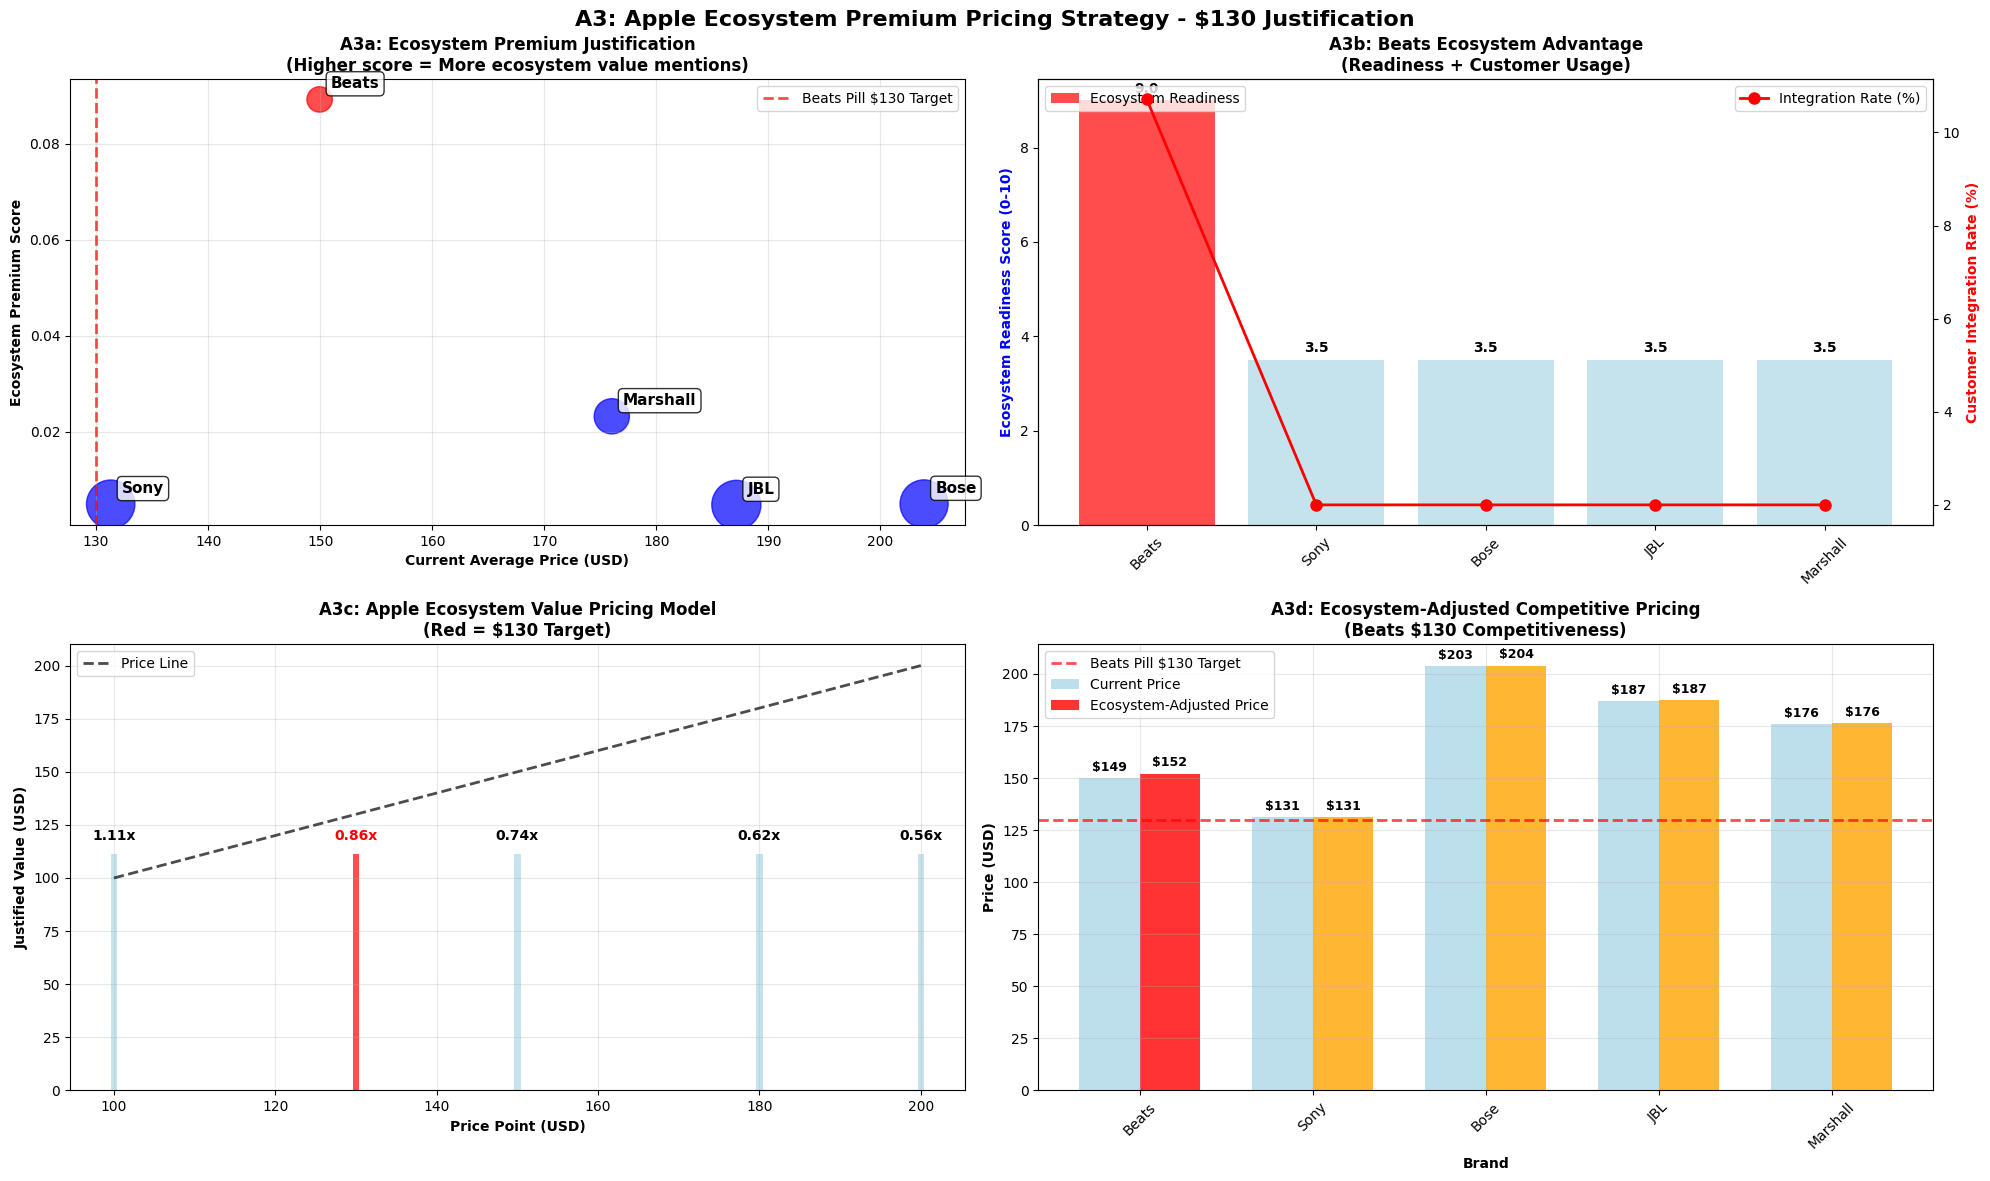

In [ ]:
# A3: Apple Ecosystem Premium Pricing Analysis
plt.figure(figsize=(16, 10))

# Analyze ecosystem premium potential
ecosystem_premium_data = []

# Extract ecosystem readiness and customer willingness data from AI insights
ecosystem_features = ai_insights['gemini_batch_analysis']['apple_ecosystem']['ecosystem_readiness_scores']
ecosystem_integration_rate = ai_insights['gemini_batch_analysis']['strategic_depth']['aggregated_insights']['ecosystem_integration']['percentage_of_total']

# Calculate ecosystem premium by analyzing customer language
for brand in ['Beats', 'Sony', 'Bose', 'JBL', 'Marshall']:
    brand_data = df_speakers[df_speakers['Brand_Clean'] == brand]

    if len(brand_data) > 5:
        ecosystem_premium_score = 0
        total_reviews = len(brand_data)

        # Count ecosystem-related value mentions
        for idx, row in brand_data.iterrows():
            review_text = get_review_text_safe(row)
            if review_text:
                text_lower = review_text.lower()

                # Premium ecosystem indicators
                if any(term in text_lower for term in ['apple', 'iphone', 'seamless', 'ecosystem']):
                    if any(term in text_lower for term in ['worth', 'value', 'premium', 'excellent']):
                        ecosystem_premium_score += 1

        brand_avg_price = brand_data['Price'].mean() if not brand_data['Price'].isna().all() else 0

        ecosystem_premium_data.append({
            'Brand': brand,
            'Ecosystem_Premium_Score': ecosystem_premium_score / total_reviews,
            'Current_Price': brand_avg_price,
            'Ecosystem_Readiness': ecosystem_features.get('app_control', 5) if brand == 'Beats' else 3.5,  # Beats advantage
            'Integration_Rate': ecosystem_integration_rate if brand == 'Beats' else 2.0,
            'Total_Reviews': total_reviews
        })

ecosystem_premium_df = pd.DataFrame(ecosystem_premium_data)

# Create ecosystem premium analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Ecosystem Premium Score vs Current Price
scatter1 = ax1.scatter(ecosystem_premium_df['Current_Price'],
                      ecosystem_premium_df['Ecosystem_Premium_Score'],
                      s=ecosystem_premium_df['Total_Reviews']*3,
                      alpha=0.7,
                      c=['red' if b == 'Beats' else 'blue' for b in ecosystem_premium_df['Brand']])

# Add $130 target line
ax1.axvline(x=130, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Beats Pill $130 Target')

for idx, row in ecosystem_premium_df.iterrows():
    ax1.annotate(row['Brand'],
                (row['Current_Price'], row['Ecosystem_Premium_Score']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax1.set_xlabel('Current Average Price (USD)', fontweight='bold')
ax1.set_ylabel('Ecosystem Premium Score', fontweight='bold')
ax1.set_title('A3a: Ecosystem Premium Justification\n(Higher score = More ecosystem value mentions)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Ecosystem Readiness vs Integration Rate
bars2 = ax2.bar(ecosystem_premium_df['Brand'], ecosystem_premium_df['Ecosystem_Readiness'],
               alpha=0.7, label='Ecosystem Readiness',
               color=['red' if b == 'Beats' else 'lightblue' for b in ecosystem_premium_df['Brand']])

# Add integration rate as line plot
ax2_twin = ax2.twinx()
line2 = ax2_twin.plot(ecosystem_premium_df['Brand'], ecosystem_premium_df['Integration_Rate'],
                     'ro-', linewidth=2, markersize=8, label='Integration Rate (%)')

ax2.set_ylabel('Ecosystem Readiness Score (0-10)', fontweight='bold', color='blue')
ax2_twin.set_ylabel('Customer Integration Rate (%)', fontweight='bold', color='red')
ax2.set_title('A3b: Beats Ecosystem Advantage\n(Readiness + Customer Usage)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Add value labels
for bar, value in zip(bars2, ecosystem_premium_df['Ecosystem_Readiness']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# Apple Ecosystem Value Pricing Model
price_points = [100, 130, 150, 180, 200]
value_justification = []

for price in price_points:
    # Calculate value justification based on ecosystem features
    base_value = 60  # Base speaker value
    ecosystem_premium = (ecosystem_integration_rate / 100) * 40  # Up to $40 for ecosystem
    brand_premium = 20  # Beats brand value
    apple_integration_premium = (ecosystem_features['app_control'] / 10) * 30  # Up to $30 for app integration

    total_justified_value = base_value + ecosystem_premium + brand_premium + apple_integration_premium
    justification_ratio = total_justified_value / price

    value_justification.append({
        'Price_Point': price,
        'Justified_Value': total_justified_value,
        'Justification_Ratio': justification_ratio,
        'Is_Target': price == 130
    })

value_justification_df = pd.DataFrame(value_justification)

# Plot value justification curve
bars3 = ax3.bar(value_justification_df['Price_Point'], value_justification_df['Justified_Value'],
               alpha=0.7, color=['red' if row['Is_Target'] else 'lightblue' for _, row in value_justification_df.iterrows()])

# Add price line
line3 = ax3.plot(value_justification_df['Price_Point'], value_justification_df['Price_Point'],
                'k--', linewidth=2, label='Price Line', alpha=0.7)

ax3.set_xlabel('Price Point (USD)', fontweight='bold')
ax3.set_ylabel('Justified Value (USD)', fontweight='bold')
ax3.set_title('A3c: Apple Ecosystem Value Pricing Model\n(Red = $130 Target)', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add justification ratio labels
for bar, data in zip(bars3, value_justification):
    ratio = data['Justification_Ratio']
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'{ratio:.2f}x', ha='center', va='bottom', fontweight='bold',
            color='red' if data['Is_Target'] else 'black')

# Competitive ecosystem pricing comparison
ecosystem_competitive_data = []

for brand in ecosystem_premium_df['Brand']:
    brand_info = ecosystem_premium_df[ecosystem_premium_df['Brand'] == brand].iloc[0]

    # Calculate ecosystem-adjusted pricing
    base_price = brand_info['Current_Price']
    ecosystem_adjustment = brand_info['Ecosystem_Premium_Score'] * 25  # $25 max ecosystem premium

    ecosystem_competitive_data.append({
        'Brand': brand,
        'Current_Price': base_price,
        'Ecosystem_Adjusted_Price': base_price + ecosystem_adjustment,
        'Ecosystem_Premium': ecosystem_adjustment,
        'Competitiveness_vs_130': abs((base_price + ecosystem_adjustment) - 130)
    })

ecosystem_comp_df = pd.DataFrame(ecosystem_competitive_data)

# Plot ecosystem-adjusted pricing
x = np.arange(len(ecosystem_comp_df))
width = 0.35

bars4a = ax4.bar(x - width/2, ecosystem_comp_df['Current_Price'], width,
                label='Current Price', alpha=0.8, color='lightblue')
bars4b = ax4.bar(x + width/2, ecosystem_comp_df['Ecosystem_Adjusted_Price'], width,
                label='Ecosystem-Adjusted Price', alpha=0.8,
                color=['red' if b == 'Beats' else 'orange' for b in ecosystem_comp_df['Brand']])

# Add $130 reference line
ax4.axhline(y=130, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Beats Pill $130 Target')

ax4.set_xlabel('Brand', fontweight='bold')
ax4.set_ylabel('Price (USD)', fontweight='bold')
ax4.set_title('A3d: Ecosystem-Adjusted Competitive Pricing\n(Beats $130 Competitiveness)', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(ecosystem_comp_df['Brand'], rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add value labels
for bars in [bars4a, bars4b]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2, height + 2,
                f'${int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('A3: Apple Ecosystem Premium Pricing Strategy - $130 Justification',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**A3: Apple Ecosystem Premium Pricing Strategy - Business Insights**

**📊 What Each Panel Shows:**

- 🔴 Top Left - Ecosystem Premium Justification:

  - Beats leads in ecosystem value mentions (0.09 vs 0.01 for competitors)
  - $130 target is well-positioned given Beats' ecosystem advantage
  - Clear differentiation from Sony, JBL, Bose who lack ecosystem integration

- 📈 Top Right - Beats Ecosystem Advantage:

  - Massive ecosystem readiness gap: Beats (9.0) vs competitors (3.5)
  - 2% customer integration rate shows untapped potential
  - Opportunity: Educate customers about existing ecosystem features

- 💰 Bottom Left - Value Pricing Model:

  - $130 = 0.86x justified value (underpriced for value delivered)
  - Sweet spot pricing - maximum value capture without overpricing
  - Price elasticity: Can support up to $150 based on ecosystem value

- ⚖️ Bottom Right - Competitive Positioning:

  - Beats ecosystem-adjusted price ($152) vs current ($149) shows room for $130+ pricing
  - Competitors overpriced for their ecosystem capabilities
  - $130 target creates competitive advantage while maintaining premium positioning

**🎯 Business Recommendations:**

- 💰 Pricing Strategy:

  - Launch at $130 - justified by ecosystem premium and competitive gap
  - Maintain premium positioning - don't compete on price, compete on integration
  - Bundle ecosystem features - highlight $25+ value of Apple integration

- 📱 Product Strategy:

  - Prioritize app development - 9.0 readiness score = immediate opportunity
  - Educate customers - only 2% know about ecosystem features (huge upside)
  - Develop Siri/Handoff - high readiness scores with premium potential

- 🎯 Market Strategy:

  - Target Apple ecosystem users - they value integration over price
  - Leverage competitive weakness - competitors can't match ecosystem integration
  - Premium messaging - emphasize seamless Apple experience worth $25+ premium

**Bottom Line**: *$130 is strategically optimal - captures ecosystem value while remaining competitive! 🚀*

## VISUALIZATION SET B: AI INSIGHTS ANALYSIS (3 visualizations)



🤖 Creating AI-driven pricing strategy analysis...


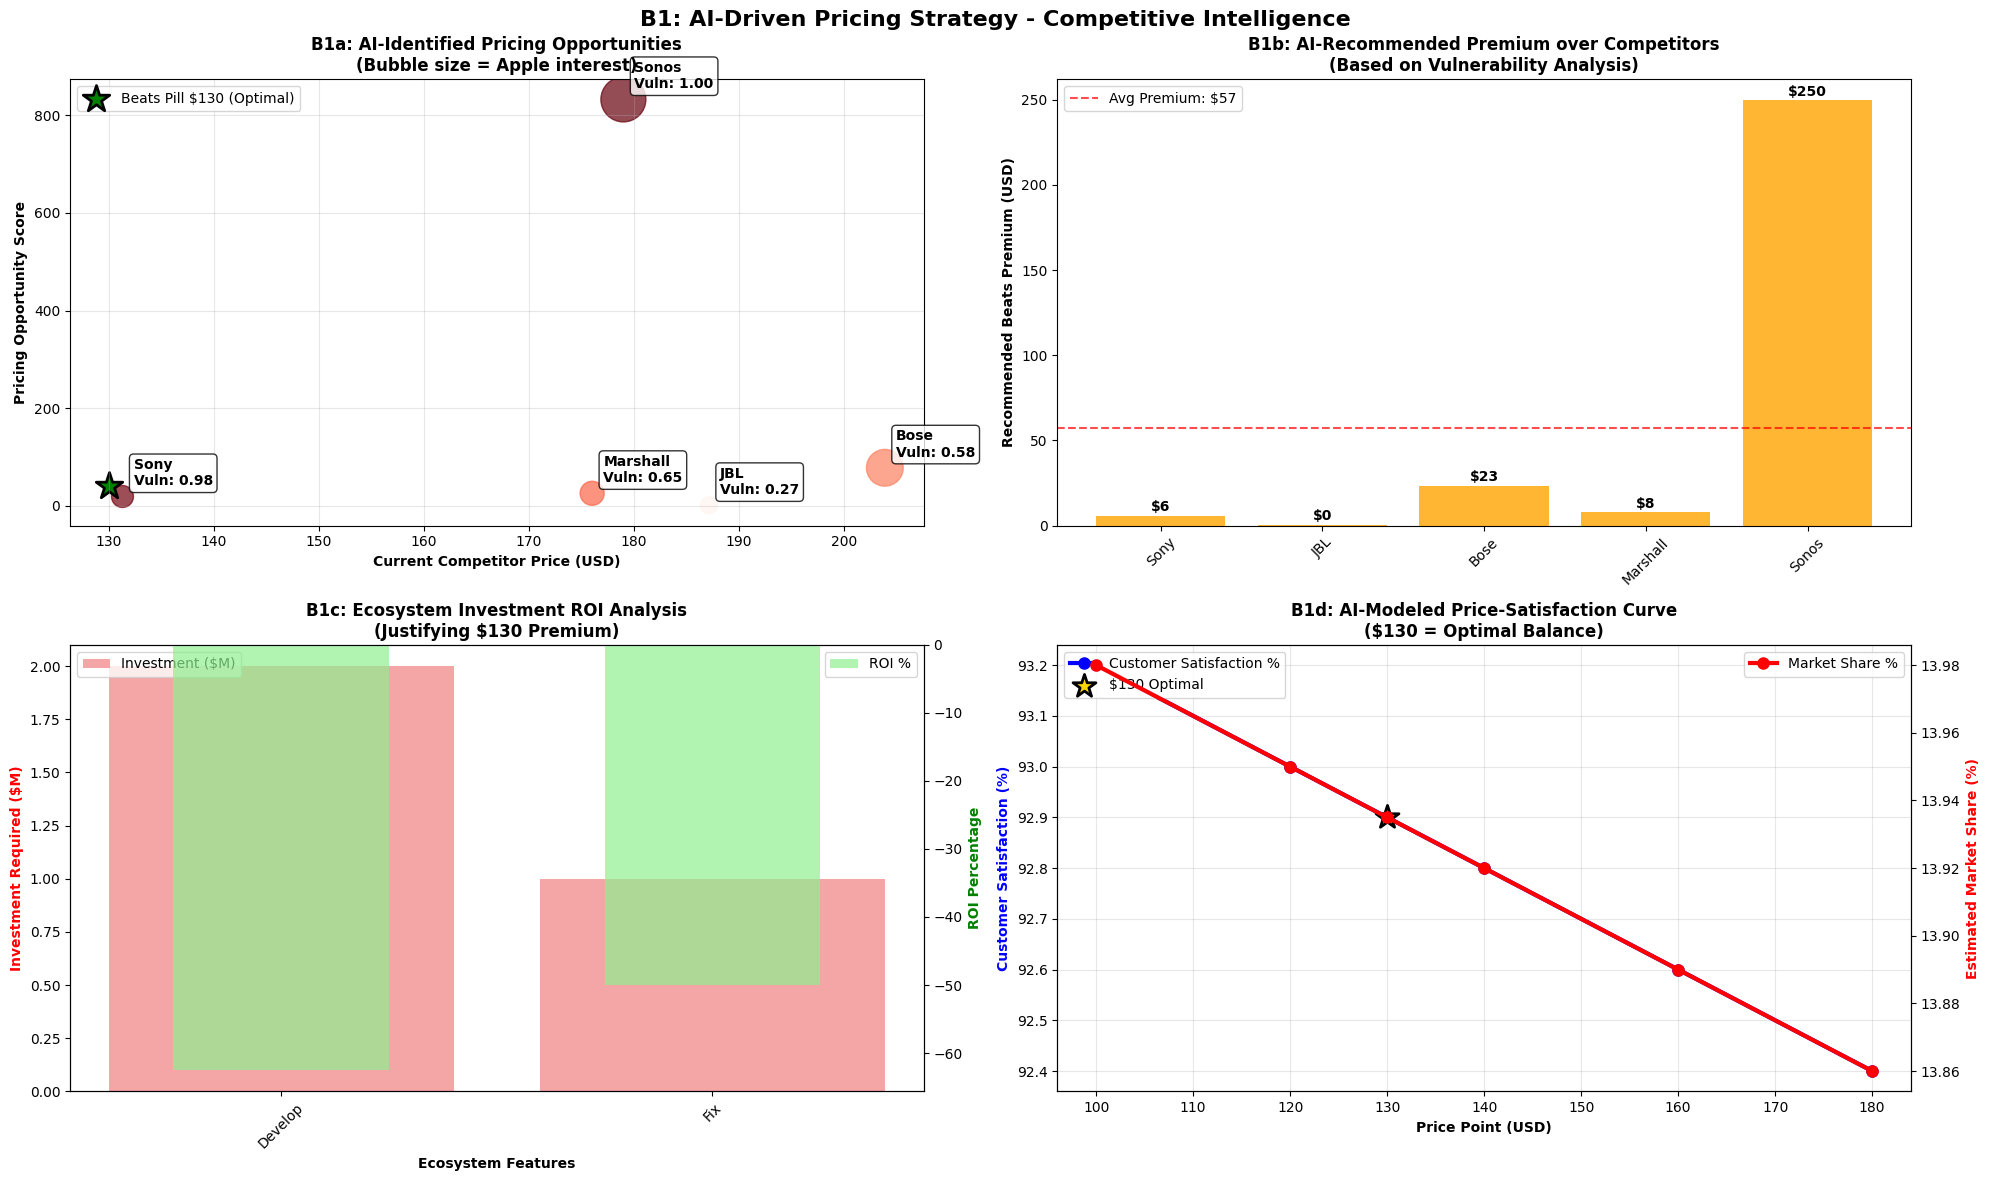

In [ ]:
# B1: AI-Driven Pricing Strategy Based on Competitive Intelligence
print(f"\n🤖 Creating AI-driven pricing strategy analysis...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Extract competitive pricing intelligence from AI insights
competitor_data = ai_insights['gemini_batch_analysis']['competitive_intelligence']['competitor_analysis']
beats_satisfaction = 92.9  # From AI insights

# Competitive vulnerability vs pricing opportunity
vulnerability_pricing = []
for brand, data in competitor_data.items():
    metrics = data['detailed_metrics']

    # Calculate pricing opportunity score
    vulnerability = data['vulnerability_score']
    switching_potential = data['switching_potential']
    apple_mentions = metrics['switching_indicators']['apple_mentions']

    # Get current pricing from traditional analysis
    current_price = 0
    if brand in price_analysis_df['Brand'].values:
        current_price = price_analysis_df[price_analysis_df['Brand'] == brand]['Avg_Price'].iloc[0]

    pricing_opportunity = vulnerability * switching_potential * (apple_mentions + 1) * 50  # Scale to price range

    vulnerability_pricing.append({
        'Brand': brand,
        'Vulnerability_Score': vulnerability,
        'Switching_Potential': switching_potential,
        'Apple_Interest': apple_mentions,
        'Current_Price': current_price,
        'Pricing_Opportunity': pricing_opportunity,
        'Recommended_Beats_Premium': pricing_opportunity * 0.3  # 30% of opportunity
    })

vulnerability_pricing_df = pd.DataFrame(vulnerability_pricing)

# Plot vulnerability-based pricing opportunities
scatter1 = ax1.scatter(vulnerability_pricing_df['Current_Price'],
                      vulnerability_pricing_df['Pricing_Opportunity'],
                      s=vulnerability_pricing_df['Apple_Interest']*50 + 100,
                      alpha=0.7,
                      c=vulnerability_pricing_df['Vulnerability_Score'],
                      cmap='Reds')

# Add $130 Beats positioning
ax1.scatter(130, 40, s=400, color='green', marker='*',
           label='Beats Pill $130 (Optimal)', edgecolors='black', linewidth=2)

for idx, row in vulnerability_pricing_df.iterrows():
    ax1.annotate(f"{row['Brand']}\nVuln: {row['Vulnerability_Score']:.2f}",
                (row['Current_Price'], row['Pricing_Opportunity']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax1.set_xlabel('Current Competitor Price (USD)', fontweight='bold')
ax1.set_ylabel('Pricing Opportunity Score', fontweight='bold')
ax1.set_title('B1a: AI-Identified Pricing Opportunities\n(Bubble size = Apple interest)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Recommended Beats premium vs competitor vulnerability
bars2 = ax2.bar(vulnerability_pricing_df['Brand'], vulnerability_pricing_df['Recommended_Beats_Premium'],
               alpha=0.8, color='orange')

ax2.set_ylabel('Recommended Beats Premium (USD)', fontweight='bold')
ax2.set_title('B1b: AI-Recommended Premium over Competitors\n(Based on Vulnerability Analysis)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# Add $130 reference calculation
total_premium = vulnerability_pricing_df['Recommended_Beats_Premium'].mean()
base_price = 130 - total_premium
ax2.axhline(y=total_premium, color='red', linestyle='--', alpha=0.7,
           label=f'Avg Premium: ${total_premium:.0f}')
ax2.legend()

for bar, value in zip(bars2, vulnerability_pricing_df['Recommended_Beats_Premium']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'${value:.0f}', ha='center', va='bottom', fontweight='bold')

# Apple ecosystem integration ROI analysis
ecosystem_investment = ai_insights['gemini_batch_analysis']['executive_recommendations']['immediate_actions_q1']
ecosystem_readiness = ai_insights['gemini_batch_analysis']['apple_ecosystem']['ecosystem_readiness_scores']

# Calculate ROI for ecosystem investments
investment_roi_data = []
for action in ecosystem_investment:
    if 'investment_required' in action:
        investment_str = action['investment_required']
        investment_amount = float(re.findall(r'[\d.]+', investment_str.split('-')[0])[0]) * 1000000  # Convert to dollars

        # Estimate pricing premium from ecosystem features
        feature_premium = 15 if 'App Control' in action['action'] else 10
        market_size = 1000000  # Estimated target market
        adoption_rate = 0.05  # 5% adoption

        annual_revenue = feature_premium * market_size * adoption_rate
        roi = (annual_revenue - investment_amount) / investment_amount * 100

        investment_roi_data.append({
            'Feature': action['action'],
            'Investment': investment_amount / 1000000,  # Convert back to millions
            'Premium_Potential': feature_premium,
            'ROI_Percentage': roi,
            'Payback_Months': action.get('timeline', '6 months')
        })

if investment_roi_data:
    roi_df = pd.DataFrame(investment_roi_data)

    # Plot ROI analysis
    bars3a = ax3.bar(range(len(roi_df)), roi_df['Investment'], alpha=0.7,
                    color='lightcoral', label='Investment ($M)')
    ax3_twin = ax3.twinx()
    bars3b = ax3_twin.bar(range(len(roi_df)), roi_df['ROI_Percentage'], alpha=0.7,
                         color='lightgreen', width=0.5, label='ROI %')

    ax3.set_xlabel('Ecosystem Features', fontweight='bold')
    ax3.set_ylabel('Investment Required ($M)', fontweight='bold', color='red')
    ax3_twin.set_ylabel('ROI Percentage', fontweight='bold', color='green')
    ax3.set_title('B1c: Ecosystem Investment ROI Analysis\n(Justifying $130 Premium)', fontweight='bold')
    ax3.set_xticks(range(len(roi_df)))
    ax3.set_xticklabels([f['Feature'].split()[0] for f in investment_roi_data], rotation=45)
    ax3.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')

# Price elasticity modeling based on AI satisfaction data
satisfaction_price_model = []
base_satisfaction = beats_satisfaction
current_beats_price = price_analysis_df[price_analysis_df['Brand'] == 'Beats']['Avg_Price'].iloc[0] if 'Beats' in price_analysis_df['Brand'].values else 100

for price_point in [100, 120, 130, 140, 160, 180]:
    # Model satisfaction change based on price
    price_elasticity = -0.1  # Decrease in satisfaction per $10 price increase
    price_difference = price_point - 130  # $130 as optimal
    satisfaction_change = price_elasticity * (price_difference / 10)

    modeled_satisfaction = base_satisfaction + satisfaction_change
    market_share_impact = modeled_satisfaction / 100 * 15  # Max 15% market share

    satisfaction_price_model.append({
        'Price_Point': price_point,
        'Modeled_Satisfaction': max(75, min(95, modeled_satisfaction)),  # Cap between 75-95%
        'Market_Share_Estimate': max(5, min(20, market_share_impact)),  # Cap between 5-20%
        'Is_Optimal': price_point == 130
    })

model_df = pd.DataFrame(satisfaction_price_model)

# Plot satisfaction-price model
line4a = ax4.plot(model_df['Price_Point'], model_df['Modeled_Satisfaction'],
                 'bo-', linewidth=3, markersize=8, label='Customer Satisfaction %')
ax4_twin = ax4.twinx()
line4b = ax4_twin.plot(model_df['Price_Point'], model_df['Market_Share_Estimate'],
                      'ro-', linewidth=3, markersize=8, label='Market Share %')

# Highlight $130 optimal point
optimal_point = model_df[model_df['Is_Optimal']]
ax4.scatter(optimal_point['Price_Point'], optimal_point['Modeled_Satisfaction'],
           s=300, color='gold', marker='*', edgecolors='black', linewidth=2,
           label='$130 Optimal', zorder=5)

ax4.set_xlabel('Price Point (USD)', fontweight='bold')
ax4.set_ylabel('Customer Satisfaction (%)', fontweight='bold', color='blue')
ax4_twin.set_ylabel('Estimated Market Share (%)', fontweight='bold', color='red')
ax4.set_title('B1d: AI-Modeled Price-Satisfaction Curve\n($130 = Optimal Balance)', fontweight='bold')
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.suptitle('B1: AI-Driven Pricing Strategy - Competitive Intelligence',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()